In [50]:
import pandas as pd
import numpy as np
import requests
import json

In [51]:
import configparser
config = configparser.ConfigParser()
config.read('config.ini')
# import params
params = dict(config.items('params'))

In [52]:
def get_access_token(url, params):
    url = "https://entreprise.pole-emploi.fr/connexion/oauth2/access_token?realm=/%2Fpartenaire"
    headers = {
        'Content-Type': 'application/x-www-form-urlencoded'
    }



    response_token = requests.post(url,
                            headers=headers,
                            params=params,
                            timeout=25
                            )
    response_token.close()

    bytes_response_token = response_token.content.decode('utf8').replace("'", '"')
    json_response_token = json.loads(bytes_response_token)
    return(json_response_token.get("access_token"))


access_token = get_access_token(url = "https://entreprise.pole-emploi.fr/connexion/oauth2/access_token?realm=/%2Fpartenaire", 
                params=params)

# Liste des BDD

In [53]:
def get_list_of_bdd(url, access_token):

    headers = {
        'Authorization': f'Bearer {access_token}'
    }
    response_liste_BDD = requests.get(url,headers=headers, timeout=25)

    bytes_response_liste_BDD = response_liste_BDD.content.decode('utf8').replace("'", '"')
    json_response_liste_BDD = json.loads(bytes_response_liste_BDD)

    list_dataset_dic = [dic for dic in json_response_liste_BDD.get("result").get("packages") if dic.get("type")=="dataset"]
    # [print(f"\n\n{print_dict_like_json_prettify(e,4)}") for e in list_dataset_dic if list(e) in ["id", "title", "notes"]]
    # [print(f"\n\n{list(e)}") for e in list_dataset_dic]

    list_dataset_dic_ft=list()
    for e in range(len(list_dataset_dic)):
        list_dataset_dic_ft.append({your_key: list_dataset_dic[e][your_key] for your_key in ["id", "title", "notes"] })
    #     print("\n")
    [print(f"{e}\n") for e in list_dataset_dic_ft]
    return(list_dataset_dic_ft)
    
get_list_of_bdd(url="https://api.emploi-store.fr/partenaire/infotravail/v1/organization_show?id=digidata",
                access_token=access_token)

{'id': '80341a24-a451-49ec-b6b0-1b8756fe977d', 'title': 'Offres d’emploi anonymisées', 'notes': 'Ce jeu de données référence les données anonymisées des offres Pôle emploi. '}

{'id': '445b746a-bbe0-456a-8bee-ea24498242d3', 'title': 'Référentiel des agences Pôle emploi', 'notes': 'Ce jeu de données référence l’ensemble des informations concernant les agences de Pôle emploi : localisation, coordonnées (adresse, téléphone, mail), type d’agence (généraliste, cadre, spectacle), horaires d’ouverture. '}

{'id': 'a4f9e4dd-365e-4542-839c-a93a2448e388', 'title': 'Informations sur le marché du travail', 'notes': 'Ce jeu de données référence les informations relatives au marché du travail : données sur les recrutements, statistiques sur les offres et la demande d’emploi.'}

{'id': '47dbbaba-c983-47df-bd9c-eaeec14bd834', 'title': 'Statistiques sur le marché du travail', 'notes': 'Ce jeu de données référence les informations statistiques sur le marché du travail : données statistiques sur la deman

[{'id': '80341a24-a451-49ec-b6b0-1b8756fe977d',
  'title': 'Offres d’emploi anonymisées',
  'notes': 'Ce jeu de données référence les données anonymisées des offres Pôle emploi. '},
 {'id': '445b746a-bbe0-456a-8bee-ea24498242d3',
  'title': 'Référentiel des agences Pôle emploi',
  'notes': 'Ce jeu de données référence l’ensemble des informations concernant les agences de Pôle emploi : localisation, coordonnées (adresse, téléphone, mail), type d’agence (généraliste, cadre, spectacle), horaires d’ouverture. '},
 {'id': 'a4f9e4dd-365e-4542-839c-a93a2448e388',
  'title': 'Informations sur le marché du travail',
  'notes': 'Ce jeu de données référence les informations relatives au marché du travail : données sur les recrutements, statistiques sur les offres et la demande d’emploi.'},
 {'id': '47dbbaba-c983-47df-bd9c-eaeec14bd834',
  'title': 'Statistiques sur le marché du travail',
  'notes': 'Ce jeu de données référence les informations statistiques sur le marché du travail : données stati

# Liste des ressources d'une BDD

In [54]:
def read_bdd(url, access_token):
    headers = {
        'Authorization': f'Bearer {access_token}'
    }
    response_first_BDD = requests.get(url,headers=headers, timeout=25)

    bytes_response_first_BDD = response_first_BDD.content

    json_response_first_BDD = json.loads(bytes_response_first_BDD)
#     print_dict_like_json_prettify(json_response_first_BDD, 4)
    list_ressources = json_response_first_BDD.get("result").get("resources")
    # print(list_ressources)
    list_ressources_filter=list()
    for e in range(len(list_ressources)):
        list_ressources_filter.append({your_key: list_ressources[e][your_key] for your_key in ["id", "name", "description", 
                                                                                               "pe_source", "pe_version", 
                                                                                               "size"]}) , #"pe_status"
    [print(f"{e}\n") for e in list_ressources_filter]


    pd.set_option('display.max_columns', 500)
    for e, i in zip(list_ressources, range(len(list_ressources))):
        identifiant_r = e.get("id") 
        nb_elem = "200"
        offset = "1"
        # GET https://api.emploi-store.fr/partenaire/infotravail/v1/datastore_search_sql?sql=SELECT * FROM {identifiant_r} LIMIT 5 
        url = f'https://api.emploi-store.fr/partenaire/infotravail/v1/datastore_search_sql?sql=SELECT * FROM \"{identifiant_r}\" LIMIT {nb_elem}'
        #f'https://api.emploi-store.fr/partenaire/infotravail/v1/datastore_search_sql?sql=SELECT * FROM {identifiant_r} LIMIT 15'
        print(url)
        # f"https://api.emploi-store.fr/partenaire/infotravail/v1/datastore_search?resource_id={identifiant_r}"
        # f'https://api.emploi-store.fr/partenaire/infotravail/v1/datastore_search_sql?sql=SELECT * FROM \"{identifiant_r}\" WHERE \"CITY_NAME\" = \"NANTES\" LIMIT 10'# &amp;amp;amp;amp;amp;limit={nb_elem}&amp;amp;amp;amp;amp;offset={offset}"

        headers = {
            'Authorization': f'Bearer {access_token}'
        }
        response_first_BDD = requests.get(url,headers=headers, timeout=60*5)

    #     print(dir(response_first_BDD))
        # print(response_first_BDD.content)
        bytes_response_first_BDD = response_first_BDD.content
        # print(bytes_response_first_BDD)
        json_response_first_BDD = json.loads(bytes_response_first_BDD)
        print("\n")
        # print_dict_like_json_prettify(json_response_first_BDD, 4)

        json_response_first_BDD.get("result").get("fields")


        type_dict=dict()
        for elem in json_response_first_BDD.get("result").get("fields"):
            if elem.get("type")=="int4":
                type_dict[elem.get("id")]="int"
            if elem.get("type")=="text":
                type_dict[elem.get("id")]="object"
    #     print(type_dict)

        exec(f'df_{i} = pd.DataFrame.from_dict(json_response_first_BDD.get("result").get("records")).astype(type_dict)')
        exec(f'df_{i} = df_{i}.drop(["_full_text"], axis=1, errors="ignore").set_index("_id")')
        print(f'df_{i} | name : {e.get("name")} | description : {e.get("description")} | id : {e.get("id")}')
        exec(f'print(df_{i}.shape)')
        exec(f'display(df_{i}.head(5))')
    return(list_ressources_filter)
    

identifiant = "80341a24-a451-49ec-b6b0-1b8756fe977d" 
url = f"https://api.emploi-store.fr/partenaire/infotravail/v1/package_show?id={identifiant}"
list_dict_ressources = read_bdd(url, access_token)

{'id': '362eb4aa-77a5-4e9f-a720-877dbbc024c7', 'name': "Référentiel des états d'une offre", 'description': "Référentiel des états d'une offre", 'pe_source': 'ROE_ETAT_OFFRE', 'pe_version': '1', 'size': '230'}

{'id': '386075a7-ad0b-42e2-8e59-8aeddb4b872a', 'name': 'Référentiel des expériences professionnelles', 'description': 'Référentiel des expériences professionnelles', 'pe_source': 'ROE_EXPERIENCE_PRO', 'pe_version': '1', 'size': '90'}

{'id': '47e0bd60-0361-451b-87c7-24203b6fe6e2', 'name': 'Référentiel des durées de contrat', 'description': 'Référentiel des durées de contrat', 'pe_source': 'ROE_DUREE', 'pe_version': '1', 'size': '50'}

{'id': '167d1031-ce27-4c35-9d01-d0ee96d85ead', 'name': 'Référentiel des natures de contrat', 'description': 'Référentiel des natures de contrat', 'pe_source': 'ROE_NATURE_CONTRAT', 'pe_version': '1', 'size': '791'}

{'id': '0e8e3591-0a8e-471f-ae80-86bbb3f1b23d', 'name': 'Référentiel des types de contrat', 'description': 'Référentiel des types de con

CODE                        NAME
_id                                 
1     AA       En attente de Clôture
2     AC    En attente de validation
3     AN                    Clôturée
4     AR  En attente de revalidation
5     BR                   Brouillon

https://api.emploi-store.fr/partenaire/infotravail/v1/datastore_search_sql?sql=SELECT * FROM "386075a7-ad0b-42e2-8e59-8aeddb4b872a" LIMIT 200


df_1 | name : Référentiel des expériences professionnelles | description : Référentiel des expériences professionnelles | id : 386075a7-ad0b-42e2-8e59-8aeddb4b872a
(3, 2)


CODE                  NAME
_id                           
1      D      Débutant accepté
2      E     Expérience exigée
3      S  Expérience souhaitée

https://api.emploi-store.fr/partenaire/infotravail/v1/datastore_search_sql?sql=SELECT * FROM "47e0bd60-0361-451b-87c7-24203b6fe6e2" LIMIT 200


df_2 | name : Référentiel des durées de contrat | description : Référentiel des durées de contrat | id : 47e0bd60-0361-451b-87c7-24203b6fe6e2
(3, 2)


CODE     NAME
_id              
1     JO  Jour(s)
2     MO     Mois
3     AN    An(s)

https://api.emploi-store.fr/partenaire/infotravail/v1/datastore_search_sql?sql=SELECT * FROM "167d1031-ce27-4c35-9d01-d0ee96d85ead" LIMIT 200


df_3 | name : Référentiel des natures de contrat | description : Référentiel des natures de contrat | id : 167d1031-ce27-4c35-9d01-d0ee96d85ead
(35, 2)


CODE                            NAME
_id                                     
1     CC  CDI de chantier ou d'opération
2     CI            Contrat intermittent
3     CU                 Contrat d'usage
4     E0                                
5     E1             Contrat tout public

https://api.emploi-store.fr/partenaire/infotravail/v1/datastore_search_sql?sql=SELECT * FROM "0e8e3591-0a8e-471f-ae80-86bbb3f1b23d" LIMIT 200


df_4 | name : Référentiel des types de contrat | description : Référentiel des types de contrat | id : 0e8e3591-0a8e-471f-ae80-86bbb3f1b23d
(12, 2)


CODE                                NAME
_id                                         
1    CCE              Profession commerciale
2    CDD                                 CDD
3    CDI                                 CDI
4    CNE           Contrat nouvelle embauche
5    DDI  Contrat durée déterminée insertion

https://api.emploi-store.fr/partenaire/infotravail/v1/datastore_search_sql?sql=SELECT * FROM "b8171079-c6eb-4928-9993-8363b960f894" LIMIT 200


df_5 | name : Référentiel des types de salaire | description : Référentiel des types de salaire | id : b8171079-c6eb-4928-9993-8363b960f894
(5, 2)


CODE     NAME
_id              
1      A   Annuel
2      C   Cachet
3      H  Horaire
4      M  Mensuel
5      X    Autre

https://api.emploi-store.fr/partenaire/infotravail/v1/datastore_search_sql?sql=SELECT * FROM "78234f42-d345-4bdb-b54c-3379424c6481" LIMIT 200


df_6 | name : Référentiel des unités monétaires | description : Référentiel des unités monétaires | id : 78234f42-d345-4bdb-b54c-3379424c6481
(1, 2)


CODE   NAME
_id            
1     EU  Euros

https://api.emploi-store.fr/partenaire/infotravail/v1/datastore_search_sql?sql=SELECT * FROM "55d1e9c6-8147-4508-9486-3829d9e6c862" LIMIT 200


df_7 | name : Référentiel des sous-classes NAF | description : Référentiel des sous-classes NAF | id : 55d1e9c6-8147-4508-9486-3829d9e6c862
(200, 2)


CODE                                               NAME
_id                                                          
1    0000Z                                   Activité inconue
2    0111Z  Culture de céréales (à l'exception du riz), de...
3    0112Z                                     Culture du riz
4    0113Z  Culture de légumes, de melons, de racines et d...
5    0114Z                        Culture de la canne à sucre

https://api.emploi-store.fr/partenaire/infotravail/v1/datastore_search_sql?sql=SELECT * FROM "2cbf766c-f9a1-49f4-a17f-aeeb06ceb834" LIMIT 200


df_8 | name : Référentiel des qualifications | description : Référentiel des qualifications | id : 2cbf766c-f9a1-49f4-a17f-aeeb06ceb834
(9, 2)


CODE                          NAME
_id                                   
1      1                     Manoeuvre
2      2            Ouvrier spécialisé
3      3      Ouvrier qualifié (P1,P2)
4      4  Ouvrier qualifié (P3,P4,OHQ)
5      5          Employé non qualifié

https://api.emploi-store.fr/partenaire/infotravail/v1/datastore_search_sql?sql=SELECT * FROM "62baa80b-741a-4496-a4fb-9e9185ecbb93" LIMIT 200


df_9 | name : Référentiel des conditions d'exercice | description : Référentiel des conditions d'exercice | id : 62baa80b-741a-4496-a4fb-9e9185ecbb93
(6, 2)


CODE                                       NAME
_id                                                
1    AUT                                      Autre
2    DOM  Travail à son domicile (dont télétravail)
3    EQU                          Travail en équipe
4    INT       Travail intermittent (dont artistes)
5    ITI                          Travail itinérant

https://api.emploi-store.fr/partenaire/infotravail/v1/datastore_search_sql?sql=SELECT * FROM "1a6b6cdd-9e72-4168-b565-80b30821954a" LIMIT 200


df_10 | name : Référentiel des types horaires | description : Référentiel des types horaires | id : 1a6b6cdd-9e72-4168-b565-80b30821954a
(10, 2)


CODE                   NAME
_id                            
1    HAN       Horaires annuels
2    IRR  Horaires irrĂŠguliers
3    NOR       Horaires normaux
4    T28         Travail en 2X8
5    T38         Travail en 3X8

https://api.emploi-store.fr/partenaire/infotravail/v1/datastore_search_sql?sql=SELECT * FROM "b065018a-c7b3-4652-989f-80b6eb2f6601" LIMIT 200


df_11 | name : Référentiel des types de formation | description : Référentiel des types de formation | id : b065018a-c7b3-4652-989f-80b6eb2f6601
(10, 2)


CODE                       NAME
_id                                
1    AFS  Aucune formation scolaire
2    C12        2nd ou 1ère achevée
3    C3A       BEPC ou 3ème achevée
4    CFG               4ème achevée
5    CP4            Primaire à 4ème

https://api.emploi-store.fr/partenaire/infotravail/v1/datastore_search_sql?sql=SELECT * FROM "f4717749-70cd-421c-a7cd-0980cb40f176" LIMIT 200


df_12 | name : Référentiel des domaines de formation | description : Référentiel des domaines de formation | id : f4717749-70cd-421c-a7cd-0980cb40f176
(200, 2)


CODE                     NAME
_id                                
1    31837  Logistique distribution
2    31839      Transit marchandise
3    31840    Transport ferroviaire
4    31842      Transport filoguidé
5    31844              Transitique

https://api.emploi-store.fr/partenaire/infotravail/v1/datastore_search_sql?sql=SELECT * FROM "1d3a9970-eee8-49c3-af28-aca85c1b9913" LIMIT 200


df_13 | name : Référentiel des niveaux de langue | description : Référentiel des niveaux de langue | id : 1d3a9970-eee8-49c3-af28-aca85c1b9913
(5, 2)


CODE      NAME
_id               
1      1   Courant
2      2  Très bon
3      3       Bon
4      4   Correct
5      5   Notions

https://api.emploi-store.fr/partenaire/infotravail/v1/datastore_search_sql?sql=SELECT * FROM "e8e269f8-d146-464e-a5c4-3d72cc5c6cdf" LIMIT 200


df_14 | name : Référentiel des exigibilités | description : Référentiel des exigibilités | id : e8e269f8-d146-464e-a5c4-3d72cc5c6cdf
(2, 2)


CODE      NAME
_id               
1      E     exigé
2      S  souhaité

https://api.emploi-store.fr/partenaire/infotravail/v1/datastore_search_sql?sql=SELECT * FROM "a9d180ff-2b80-428a-a80d-12831d0ae105" LIMIT 200


df_15 | name : Référentiel des langues | description : Référentiel des langues | id : a9d180ff-2b80-428a-a80d-12831d0ae105
(70, 2)


CODE        NAME
_id                 
1     AA  Autre Asia
2     AB    Albanais
3     AF   Afrikaans
4     AL    Allemand
5     AM    Arménien

https://api.emploi-store.fr/partenaire/infotravail/v1/datastore_search_sql?sql=SELECT * FROM "5ec148dc-192d-4216-8b3f-2386e7cba250" LIMIT 200


df_16 | name : Référentiel des permis de conduire | description : Référentiel des permis de conduire | id : 5ec148dc-192d-4216-8b3f-2386e7cba250
(20, 2)


CODE                         NAME
_id                                  
1     AM   AM - Cyclomoteur <= 50 cm3
2     A1  A1 - Motocyclette <=125 cm3
3     A2         A2 - Moto <= 600 cm3
4      A                     A - Moto
5     B1             B1 - Quadricycle

https://api.emploi-store.fr/partenaire/infotravail/v1/datastore_search_sql?sql=SELECT * FROM "0c52bb99-0709-45fa-bad5-79227d243652" LIMIT 200


df_17 | name : Référentiel des outils bureautiques | description : Référentiel des outils bureautiques | id : 0c52bb99-0709-45fa-bad5-79227d243652
(2, 2)


CODE                 NAME
_id                          
1     TA              Tableur
2     TT  Traitement de texte

https://api.emploi-store.fr/partenaire/infotravail/v1/datastore_search_sql?sql=SELECT * FROM "198f977e-94fe-4207-8d8b-80fe3ff17a54" LIMIT 200


df_18 | name : Référentiel des niveaux de pratique bureautique | description : Référentiel des niveaux de pratique bureautique | id : 198f977e-94fe-4207-8d8b-80fe3ff17a54
(3, 2)


CODE                 NAME
_id                          
1      1  Utilisation experte
2      2  Utilisation normale
3      3              Notions

https://api.emploi-store.fr/partenaire/infotravail/v1/datastore_search_sql?sql=SELECT * FROM "1ea1885d-023d-413f-a933-a352d89666f5" LIMIT 200


df_19 | name : Référentiel des compléments de salaire | description : Référentiel des compléments de salaire | id : 1ea1885d-023d-413f-a933-a352d89666f5
(11, 2)


CODE                  NAME
_id                           
1      0                 Autre
2      1                Primes
3     10  Participation/action
4      2              Véhicule
5      3                Mobile

https://api.emploi-store.fr/partenaire/infotravail/v1/datastore_search_sql?sql=SELECT * FROM "ba6027d6-eb57-4186-a8d1-88eeca96ac05" LIMIT 200


df_20 | name : Référentiel des mailles géographiques | description : Référentiel des mailles géographiques | id : ba6027d6-eb57-4186-a8d1-88eeca96ac05
(5, 2)


CODE               NAME
_id                        
1     CO        Une commune
2     DT     Un département
3     FR  La France entière
4     PA            Un pays
5     RG         Une région

https://api.emploi-store.fr/partenaire/infotravail/v1/datastore_search_sql?sql=SELECT * FROM "5eafaeaf-fa8d-433f-8489-42ddce9df2ef" LIMIT 200


df_21 | name : Référentiel des sous-continents | description : Référentiel des sous-continents | id : 5eafaeaf-fa8d-433f-8489-42ddce9df2ef
(28, 2)


CODE      NAME
_id               
1     AF   AFRIQUE
2     AM  AMERIQUE
3     AS      ASIE
4     9C    EUROPE
5     XX     MONDE

https://api.emploi-store.fr/partenaire/infotravail/v1/datastore_search_sql?sql=SELECT * FROM "71ef763a-bd5b-4b18-ae89-6ea8ff9af23d" LIMIT 200


df_22 | name : Référentiel des continents | description : Référentiel des continents | id : 71ef763a-bd5b-4b18-ae89-6ea8ff9af23d
(8, 2)


CODE      NAME
_id               
1     AF   AFRIQUE
2     AM  AMERIQUE
3     AS      ASIE
4     9C    EUROPE
5     9F   OCEANIE

https://api.emploi-store.fr/partenaire/infotravail/v1/datastore_search_sql?sql=SELECT * FROM "7cf951c0-9965-4a4a-b88c-dd9e12f44449" LIMIT 200


df_23 | name : Référentiel des fréquences de déplacement | description : Référentiel des fréquences de déplacement | id : 7cf951c0-9965-4a4a-b88c-dd9e12f44449
(5, 2)


CODE        NAME
_id                 
1      0       Autre
2      1      Jamais
3      2   Ponctuels
4      3   Fréquents
5      4  Quotidiens

https://api.emploi-store.fr/partenaire/infotravail/v1/datastore_search_sql?sql=SELECT * FROM "27c906a0-4680-4622-9526-73c5754a8001" LIMIT 200


df_24 | name : Référentiel des types de déplacement | description : Référentiel des types de déplacement | id : 27c906a0-4680-4622-9526-73c5754a8001
(5, 2)


CODE           NAME
_id                    
1      0          Autre
2      1  Départemental
3      2       Régional
4      3       National
5      4  International

https://api.emploi-store.fr/partenaire/infotravail/v1/datastore_search_sql?sql=SELECT * FROM "100b864f-4124-4d19-b43a-1b65e3c40071" LIMIT 200


df_25 | name : Référentiel des modes de présentation employeur | description : Référentiel des modes de présentation employeur | id : 100b864f-4124-4d19-b43a-1b65e3c40071
(4, 2)


CODE                       NAME
_id                                
1    ECV           Envoyer votre CV
2    MEL  Envoyer votre CV par mail
3    PDE               Se présenter
4    TEL                 Téléphoner

https://api.emploi-store.fr/partenaire/infotravail/v1/datastore_search_sql?sql=SELECT * FROM "a94e94dd-33ab-4b81-873b-675bf306550e" LIMIT 200


df_26 | name : Offres d'emploi | description : Liste des offres d'emploi actives de Pôle Emploi | id : a94e94dd-33ab-4b81-873b-675bf306550e
(200, 128)


DISABLED_ACCESSIBILITY  \
_id                           
8885                      N   
8886                      N   
8887                      N   
8888                      N   
8889                      N   

                              ROME_PROFESSION_CARD_NAME TRAVEL_TYPE_COMMENT  \
_id                                                                           
8885      Réalisation de menuiserie bois et tonnellerie                       
8886                      Soins infirmiers généralistes                       
8887         Entretien et surveillance du tracé routier                       
8888                                           Coiffure                       
8889  Préparation du gros oeuvre et des travaux publics                       

     TRAVEL_FREQUENCY_NAME       CITY_NAME LANG_NAME_1 LANG_NAME_2  \
_id                                                                  
8885                             MONTUSSAN                           
8886                        TOCANE ST APRE                           
8887                          LA BOURBOULE                           
8888                             AMNEVILLE                           
8889            Quotidiens        CARNETIN                           

     DEGREE_TYPE_NAME_2 ROME_PROFESSION_CODE DESKTOP_TOOLS_NAME_1  \
_id                                                                 
8885                                   16611                        
8886                                   15545                        
8887                                   10704                        
8888                                   12694                        
8889                                   16351                        

     TRAVEL_FREQUENCY_COMMENT SUB_CONTINENT_CODE LANG_CODE_2 COUNTRY_CODE  \
_id                                                                         
8885                                                                   01   
8886                                                                   01   
8887                                                                   01   
8888                                                                   01   
8889                                                                   01   

     LANG_CODE_1 EM_INTERVIEW_MODALITY_NAME EXP_DURATION_TYPE_NAME  \
_id                                                                  
8885              Envoyer votre CV par mail                          
8886              Envoyer votre CV par mail                  An(s)   
8887              Envoyer votre CV par mail                   Mois   
8888              Envoyer votre CV par mail                          
8889              Envoyer votre CV par mail                          

     NB_MONTH_SALARY CONTRACT_NATURE_CODE STATUS_CODE  \
_id                                                     
8885                                   E1          EC   
8886              12                   E1          EC   
8887                                   E1          EC   
8888                                   E1          EC   
8889              12                   E1          EC   

                  SALARY_COMMENT CREATION_DATE SALARY_TYPE_NAME  \
_id                                                               
8885  Selon profil et expérience      02/09/21            Autre   
8886                                  26/10/21          Mensuel   
8887            Selon grille FPT      21/10/21            Autre   
8888   selon expérience + primes      08/11/21            Autre   
8889                                  08/11/21          Horaire   

     CONTRACT_TYPE_NAME DESKTOP_TOOLS_CODE_1 DESKTOP_TOOLS_CODE_2  \
_id                                                                 
8885                CDI                                             
8886                CDI                                             
8887                CDD                                             
8888        

https://api.emploi-store.fr/partenaire/infotravail/v1/datastore_search_sql?sql=SELECT * FROM "421692f5-f342-4223-9c51-72a27dcaf51e" LIMIT 200


df_27 | name : Offres d'emploi | description : Liste des offres d'emploi actives de Pôle Emploi | id : 421692f5-f342-4223-9c51-72a27dcaf51e
(200, 128)


DISABLED_ACCESSIBILITY  \
_id                           
5999                      N   
6000                      N   
6001                      N   
6002                      N   
6003                      N   

                              ROME_PROFESSION_CARD_NAME TRAVEL_TYPE_COMMENT  \
_id                                                                           
5999  Direction de grande entreprise ou d'établissem...                       
6000                            Service en restauration                       
6001          Conduite de transport en commun sur route                       
6002   Conduite d'engins de terrassement et de carrière                       
6003          Conduite de machines de façonnage routage                       

     TRAVEL_FREQUENCY_NAME                CITY_NAME LANG_NAME_1 LANG_NAME_2  \
_id                                                                           
5999                                     COURBEVOIE                           
6000                              TOURNON SUR RHONE     Anglais               
6001                                        GETIGNE                           
6002                        LES ESSARTS LES SEZANNE                           
6003                Jamais          VILLIERS LE BEL                           

     DEGREE_TYPE_NAME_2 ROME_PROFESSION_CODE DESKTOP_TOOLS_NAME_1  \
_id                                                                 
5999                                   14490                        
6000                                   12274                        
6001                                   12903                        
6002                                   12886                        
6003                                   10822                        

     TRAVEL_FREQUENCY_COMMENT SUB_CONTINENT_CODE LANG_CODE_2 COUNTRY_CODE  \
_id                                                                         
5999                                                                   01   
6000                                                                   01   
6001                                                                   01   
6002                                                                   01   
6003                                                                   01   

     LANG_CODE_1 EM_INTERVIEW_MODALITY_NAME EXP_DURATION_TYPE_NAME  \
_id                                                                  
5999              Envoyer votre CV par mail                  An(s)   
6000          AN  Envoyer votre CV par mail                          
6001              Envoyer votre CV par mail                          
6002              Envoyer votre CV par mail                  An(s)   
6003                       Envoyer votre CV                          

     NB_MONTH_SALARY CONTRACT_NATURE_CODE STATUS_CODE  \
_id                                                     
5999              12                   E1          EC   
6000              12                   E1          EC   
6001                                   E1          EC   
6002              12                   E1          EC   
6003                                   E1          EC   

                    SALARY_COMMENT CREATION_DATE SALARY_TYPE_NAME  \
_id                                                                 
5999                                    04/11/21          Mensuel   
6000                                    18/09/21          Mensuel   
6001  à partir de 10,92€ par heure      16/11/21            Autre   
6002                                    24/09/21          Horaire   
6003           Salaire à confirmer      10/11/21            Autre   

     CONTRACT_TYPE_NAME DESKTOP_TOOLS_CODE_1 DESKTOP_TOOLS_CODE_2  \
_id                                                                 
5999                CDI                                             
6000                CDI                                             
6001

https://api.emploi-store.fr/partenaire/infotravail/v1/datastore_search_sql?sql=SELECT * FROM "e49af0f2-8d00-4a54-9124-2f4107efa810" LIMIT 200


df_28 | name : Offres d'emploi | description : Liste des offres d'emploi actives de Pôle Emploi | id : e49af0f2-8d00-4a54-9124-2f4107efa810
(200, 128)


DISABLED_ACCESSIBILITY  \
_id                             
238250                          
240001                          
240002                          
240003                          
240004                          

                                ROME_PROFESSION_CARD_NAME TRAVEL_TYPE_COMMENT  \
_id                                                                             
238250       Contrôle et diagnostic technique du bâtiment                 APP   
240001  Préparation du gros oeuvre et des travaux publics                 APP   
240002                              Montage d'agencements                 APP   
240003                        Assistance auprès d'adultes                 APP   
240004                       Montage-assemblage mécanique                 APP   

       TRAVEL_FREQUENCY_NAME CITY_NAME LANG_NAME_1 LANG_NAME_2  \
_id                                                              
238250                                                           
240001                                                           
240002                                                           
240003                                                           
240004                                                           

       DEGREE_TYPE_NAME_2 ROME_PROFESSION_CODE DESKTOP_TOOLS_NAME_1  \
_id                                                                   
238250                                   11752                        
240001                                   16351                        
240002                                   17821                        
240003                                   11453                        
240004                                   10535                        

       TRAVEL_FREQUENCY_COMMENT SUB_CONTINENT_CODE LANG_CODE_2 COUNTRY_CODE  \
_id                                                                           
238250                                                                   01   
240001                                                                   01   
240002                                                                   01   
240003                                                                   01   
240004                                                                   01   

       LANG_CODE_1 EM_INTERVIEW_MODALITY_NAME EXP_DURATION_TYPE_NAME  \
_id                                                                    
238250                                      0                  An(s)   
240001                                      0                          
240002                                      0                  An(s)   
240003                                      0                          
240004                                      0                  An(s)   

       NB_MONTH_SALARY CONTRACT_NATURE_CODE STATUS_CODE  \
_id                                                       
238250              12                   E1          EC   
240001                                   E1          EC   
240002                                   E1          EC   
240003              12                   E1          EC   
240004              12                   E1          EC   

                       SALARY_COMMENT CREATION_DATE SALARY_TYPE_NAME  \
_id                                                                    
238250                                     05/11/21           Annuel   
240001  à déterminer selon expérience      01/10/21          Horaire   
240002     Salaire suivant expérience      19/10/21            Autre   
240003                                     10/11/21          Mensuel   
240004                                     16/11/21          Horaire   

       CONTRACT_TYPE_NAME DESKTOP_TOOLS_CODE_1 DESKTOP_TOOLS_CODE_2  \
_id                                                                   
238250                CDI                                             
240001                CDD                              

In [55]:
list_dfs = [key for key,val in  locals().items() if "df_" in key]
print(f"Voici le noms des {len(list_dfs)} variables correspondants aux dfs créées : {list_dfs}")

Voici le noms des 0 variables correspondants aux dfs créées : []


# Import ressource

In [56]:

def import_ressources(url, access_token):
    pd.set_option('display.max_columns', 500)
    # GET https://api.emploi-store.fr/partenaire/infotravail/v1/datastore_search_sql?sql=SELECT * FROM {identifiant_r} LIMIT 5 
    # WHERE \"CITY_NAME\" = \"NANTES\" 
    # WHERE \"DEPARTEMENT_NAME\" = \"LOIRE-ATLANTIQUE\" 
    # AND \"MAXIMUM_SALARY\" > 16000
    # cast(\"MAXIMUM_SALARY\" as float)
    headers = {
        'Authorization': f'Bearer {access_token}'
    }

    response_first_BDD = requests.get(url,headers=headers)

    bytes_response_first_BDD = response_first_BDD.content

    json_response_first_BDD = json.loads(bytes_response_first_BDD)

    type_dict=dict()
    for elem in json_response_first_BDD.get("result").get("fields"):
        if elem.get("type")=="int4":
            type_dict[elem.get("id")]="int"
        if elem.get("type")=="text":
            type_dict[elem.get("id")]="object"
            
    df = pd.DataFrame.from_dict(json_response_first_BDD.get("result").get("records")).astype(type_dict)
    df = df.drop(["_full_text"], axis=1, errors="ignore").set_index("_id")
    return(df)

# Focus sur une ressource

In [57]:
identifiant_r = "e49af0f2-8d00-4a54-9124-2f4107efa810" 
nb_elem_ressources = "500"
offset = "1"
url_ressources = f'https://api.emploi-store.fr/partenaire/infotravail/v1/datastore_search_sql?sql=SELECT * FROM \"{identifiant_r}\" WHERE \"DEPARTEMENT_NAME\" = \'LOIRE-ATLANTIQUE\' AND \"MAXIMUM_SALARY\" <> \'\' LIMIT {nb_elem_ressources}'

df = import_ressources(url_ressources, access_token)
print(df.shape)
display(df.head(5))

(500, 128)


DISABLED_ACCESSIBILITY         ROME_PROFESSION_CARD_NAME  \
_id                                                               
238399                      1                          Coiffure   
238412                      1              Personnel de cuisine   
238413                              Assistance auprès d'adultes   
238419                         Sécurité et surveillance privées   
238422                              Intervention socioéducative   

       TRAVEL_TYPE_COMMENT TRAVEL_FREQUENCY_NAME CITY_NAME LANG_NAME_1  \
_id                                                                      
238399                 APP                                               
238412                 APP                                               
238413                 APP                                               
238419                 APP                                               
238422                 APP                                               

       LANG_NAME_2 DEGREE_TYPE_NAME_2 ROME_PROFESSION_CODE  \
_id                                                          
238399                                               12688   
238412                                               12765   
238413                                               11453   
238419                                               38455   
238422                                               14597   

       DESKTOP_TOOLS_NAME_1 TRAVEL_FREQUENCY_COMMENT SUB_CONTINENT_CODE  \
_id                                                                       
238399                                                                    
238412                                                                    
238413                                                                    
238419                                                                    
238422                                                                    

       LANG_CODE_2 COUNTRY_CODE LANG_CODE_1 EM_INTERVIEW_MODALITY_NAME  \
_id                                                                      
238399                       01                                      0   
238412                       01                                      0   
238413                       01                                      0   
238419                       01                                      0   
238422                       01                                      0   

       EXP_DURATION_TYPE_NAME NB_MONTH_SALARY CONTRACT_NATURE_CODE  \
_id                                                                  
238399                  An(s)              12                   E1   
238412                                     12                   E1   
238413                                     12                   E1   
238419                  An(s)              12                   E1   
238422                                     12                   E1   

       STATUS_CODE SALARY_COMMENT CREATION_DATE SALARY_TYPE_NAME  \
_id                                                                
238399          EC                     16/11/21          Mensuel   
238412          EC                     19/10/21          Mensuel   
238413          EC                     18/10/21          Horaire   
238419          EC                     04/11/21          Horaire   
238422          EC                     12/11/21          Horaire   

       CONTRACT_TYPE_NAME DESKTOP_TOOLS_CODE_1 DESKTOP_TOOLS_CODE_2  \
_id                                                                   
238399                CDI                                             
238412                CDI                                             
238413                CDI                                             
238419                CDD                                             
238422                CDD                                             

       WORKING_LOCATION_TYPE_NAME ACTIVITY_CODE WEEKLY_WORKING_MINUTES  

In [35]:
# df.to_csv("test_diff_null.csv")
# df = pd.read_csv('test_diff_null.csv', decimal='.') 
# df = df.set_index("_id")
# df_{i} | name : {e.get("name")} | description : {e.get("description")} | id : {e.get("id")}')
# print(df.shape)
# display(df.head(5))


# Pipe Formatage

In [58]:
from matplotlib import pyplot as plt

def describe_df(df, verbose=False, graph=False): 
    print(f"Dimensions du df : {df.shape}")
    if verbose ==True:
        [print(f"Colonnes {col:-<25} : {typ}") for col, typ in zip(df.columns, df.dtypes.tolist())]
    print(f"Répartition des types de colonnes : \n{df.dtypes.value_counts()}\n")
    if graph == True:
        print(f"Répartion des types : \n : {df.dtypes.value_counts().plot.pie(autopct='%1.0f%%')}")
        plt.show()


def convert_columns_to_int(df):
    list_col_convert_to_int = []
    for col in df.columns:
        if (sum(df[col].astype(str).str.isnumeric())> 1 and "code" not in col.lower() and "name" not in col.lower()
        and len(df[~(df[col]=="")][col])>1 and len(df[~(df[col].astype(str)=="None")][col])>1):
            df[col] = df[col].replace("", np.nan).astype(float)
            list_col_convert_to_int.append(col)
    print(f"Colonnes converties en int : \n {list_col_convert_to_int}\n")
    return(df)

def convert_col_to_object(df):
    list_col_convert_to_obj = []
    for col in df.columns:
        if  "_code" in col.lower() or "flag" in col.lower() :
            df[col] = df[col].astype(object)
            list_col_convert_to_obj.append(col)
    print(f"Colonnes converties en object : \n {list_col_convert_to_obj}\n")
    return(df)


def drop_col_with_less_threshold_variance(df, threshold, liste_exclude_col=[], verbose=False):
    liste_col_low_variance = []
    for col in df.select_dtypes(include=[np.number]):
        if verbose==True:
            print(f"Variance {col:-<25} : {round(df[col].dropna().var(),2)}")
        if df[col].var()<= threshold and col not in liste_exclude_col :
            liste_col_low_variance.append(col)
    df.drop(liste_col_low_variance, axis=1, inplace=True)
    print(f"Colonnes avec moins de {threshold} de variance suprimées en excluant {liste_exclude_col}: \
    \n {liste_col_low_variance} \n")
    return(df)

def drop_col_with_more_threshold_nan(df, pct_threshold, liste_exclude_col=[], verbose=False):
    missing_rate = (df.isna().sum()/df.shape[0]).sort_values(ascending=False)
    series_ft = missing_rate[missing_rate>pct_threshold]
    if verbose==True:
        print(series_ft)
    liste_col_more_nan = [col for col in series_ft.index.tolist() if col not in liste_exclude_col]
    df.drop(liste_col_more_nan, axis=1, inplace=True)
    print(f"\nColonnes avec plus de {pct_threshold*100} % de nan supprimées: \n {liste_col_more_nan} \n")
    return(df)


from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer

describe_df(df)
clean_format_pipeline = make_pipeline(
    FunctionTransformer(func = drop_col_with_more_threshold_nan, kw_args={'pct_threshold':0.95, "verbose":False}),
    FunctionTransformer(func = convert_columns_to_int),
    FunctionTransformer(func = convert_col_to_object),
    FunctionTransformer(func = drop_col_with_less_threshold_variance, kw_args={'threshold':1, "verbose":True}),
)


df = clean_format_pipeline.fit_transform(df)
describe_df(df)
# preprocess_pipe

df.head(5)

Dimensions du df : (500, 128)
Répartition des types de colonnes : 
object    128
dtype: int64


Colonnes avec plus de 95.0 % de nan supprimées: 
 ['WORKFORCE', 'NB_VACANCIES_LEFT', 'EMPLOYER_CONSENT', 'LATITUDE', 'LONGITUDE', 'NUMBER_OF_APPLICATION'] 

Colonnes converties en int : 
 ['DISABLED_ACCESSIBILITY', 'NB_MONTH_SALARY', 'WEEKLY_WORKING_MINUTES', 'NB_VACANCIES_CREATION', 'MINIMUM_SALARY', 'WEEKLY_WORKING_HOURS', 'CONTRACT_DURATION', 'FLAG_RELATION', 'EXPERIENCE_MIN_DURATION', 'MAXIMUM_SALARY']

Colonnes converties en object : 
 ['ROME_PROFESSION_CODE', 'SUB_CONTINENT_CODE', 'LANG_CODE_2', 'COUNTRY_CODE', 'LANG_CODE_1', 'CONTRACT_NATURE_CODE', 'STATUS_CODE', 'DESKTOP_TOOLS_CODE_1', 'DESKTOP_TOOLS_CODE_2', 'ACTIVITY_CODE', 'SERVICE_TYPE_CODE', 'ROME_PROFESSION_CARD_CODE', 'EXPERIENCE_CODE', 'DEGREE_REQUIRED_CODE_2', 'DEGREE_REQUIRED_CODE_1', 'DEPARTEMENT_CODE', 'DRIVING_LIC_REQ_CODE_2', 'DRIVING_LIC_CODE_2', 'DRIVING_LIC_CODE_1', 'MONITORING_AGENCY_CODE', 'CITY_CODE', 'TRAVEL_TYPE

DISABLED_ACCESSIBILITY         ROME_PROFESSION_CARD_NAME  \
_id                                                                
238399                     1.0                          Coiffure   
238412                     1.0              Personnel de cuisine   
238413                     NaN       Assistance auprès d'adultes   
238419                     NaN  Sécurité et surveillance privées   
238422                     NaN       Intervention socioéducative   

       TRAVEL_TYPE_COMMENT TRAVEL_FREQUENCY_NAME CITY_NAME LANG_NAME_1  \
_id                                                                      
238399                 APP                                               
238412                 APP                                               
238413                 APP                                               
238419                 APP                                               
238422                 APP                                               

       LANG_NAME_2 DEGREE_TYPE_NAME_2 ROME_PROFESSION_CODE  \
_id                                                          
238399                                               12688   
238412                                               12765   
238413                                               11453   
238419                                               38455   
238422                                               14597   

       DESKTOP_TOOLS_NAME_1 TRAVEL_FREQUENCY_COMMENT SUB_CONTINENT_CODE  \
_id                                                                       
238399                                                                    
238412                                                                    
238413                                                                    
238419                                                                    
238422                                                                    

       LANG_CODE_2 COUNTRY_CODE LANG_CODE_1 EM_INTERVIEW_MODALITY_NAME  \
_id                                                                      
238399                       01                                      0   
238412                       01                                      0   
238413                       01                                      0   
238419                       01                                      0   
238422                       01                                      0   

       EXP_DURATION_TYPE_NAME CONTRACT_NATURE_CODE STATUS_CODE SALARY_COMMENT  \
_id                                                                             
238399                  An(s)                   E1          EC                  
238412                                          E1          EC                  
238413                                          E1          EC                  
238419                  An(s)                   E1          EC                  
238422                                          E1          EC                  

       CREATION_DATE SALARY_TYPE_NAME CONTRACT_TYPE_NAME DESKTOP_TOOLS_CODE_1  \
_id                                                                             
238399      16/11/21          Mensuel                CDI                        
238412      19/10/21          Mensuel                CDI                        
238413      18/10/21          Horaire                CDI                        
238419      04/11/21          Horaire                CDD                        
238422      12/11/21          Horaire                CDD                        

       DESKTOP_TOOLS_CODE_2 WORKING_LOCATION_TYPE_NAME ACTIVITY_CODE  \
_id                                                                    
238399                                     Une commune         9602A   
238412                                     Une commune         5610A   
238413                                     Une commune         8810A   
238419                              

# EDA

<AxesSubplot:ylabel='_id'>

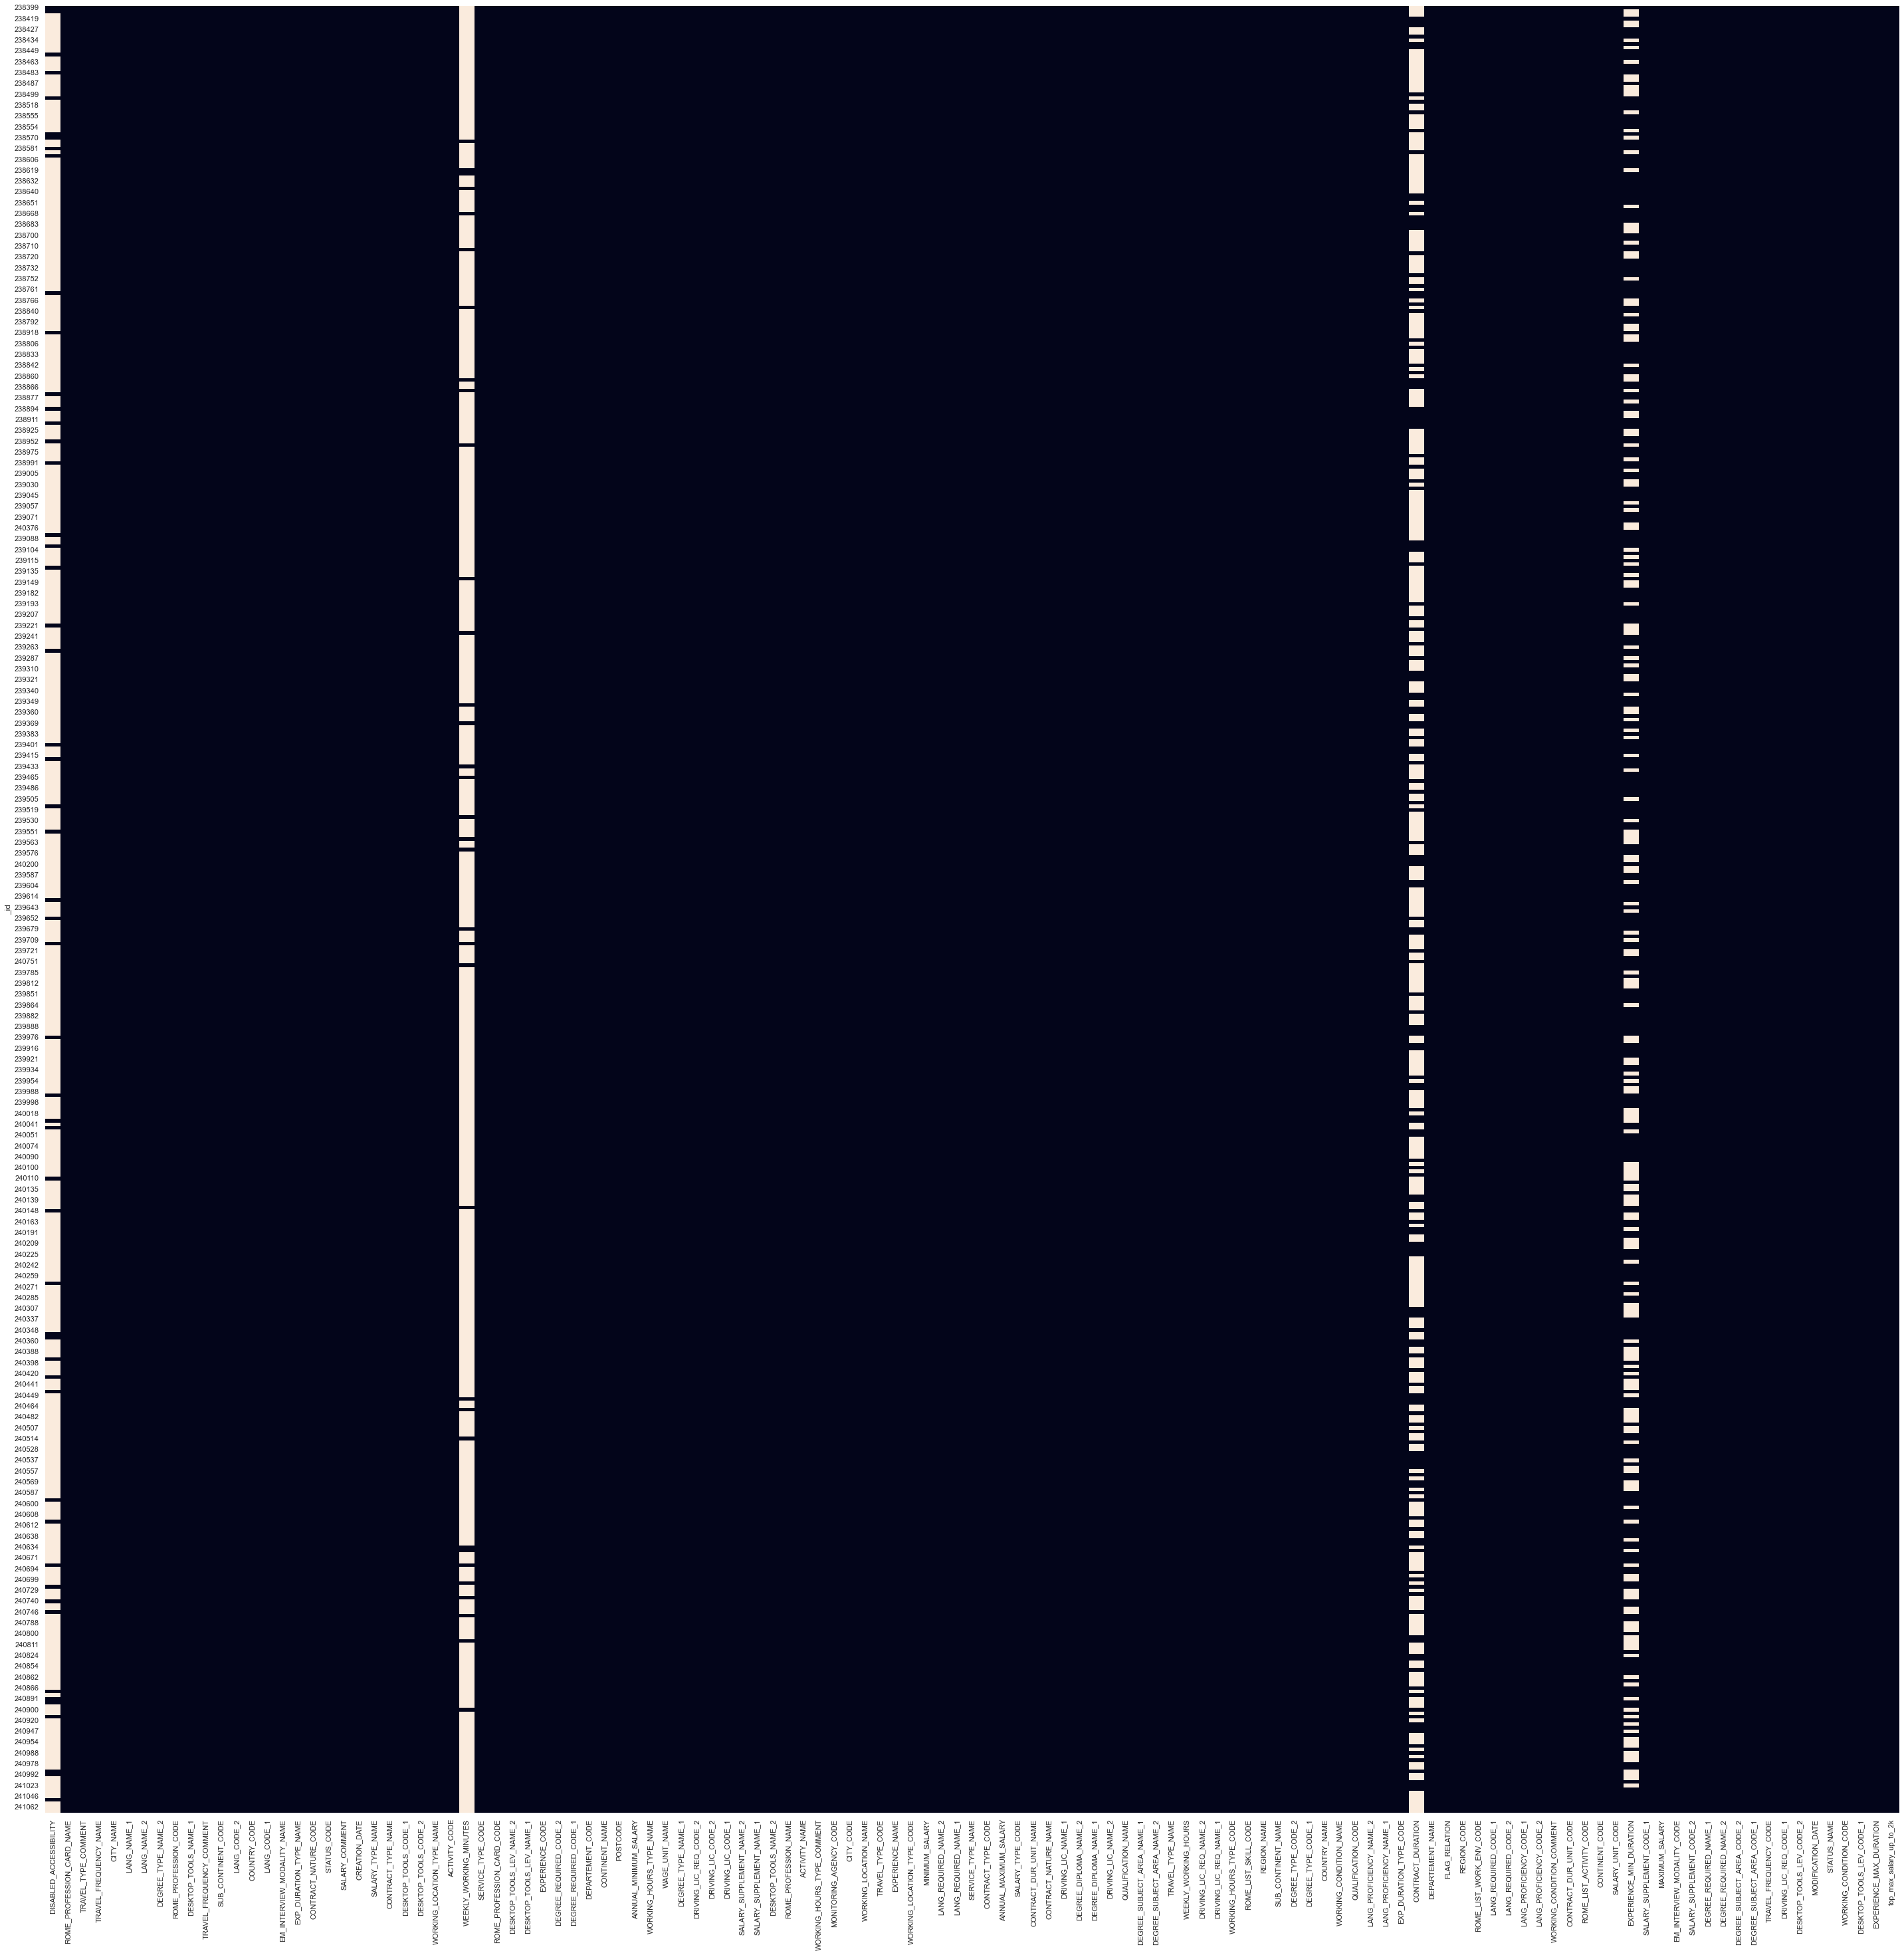

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(50,50))
sns.heatmap(df.isna(),cbar=False)

<AxesSubplot:ylabel='_id'>

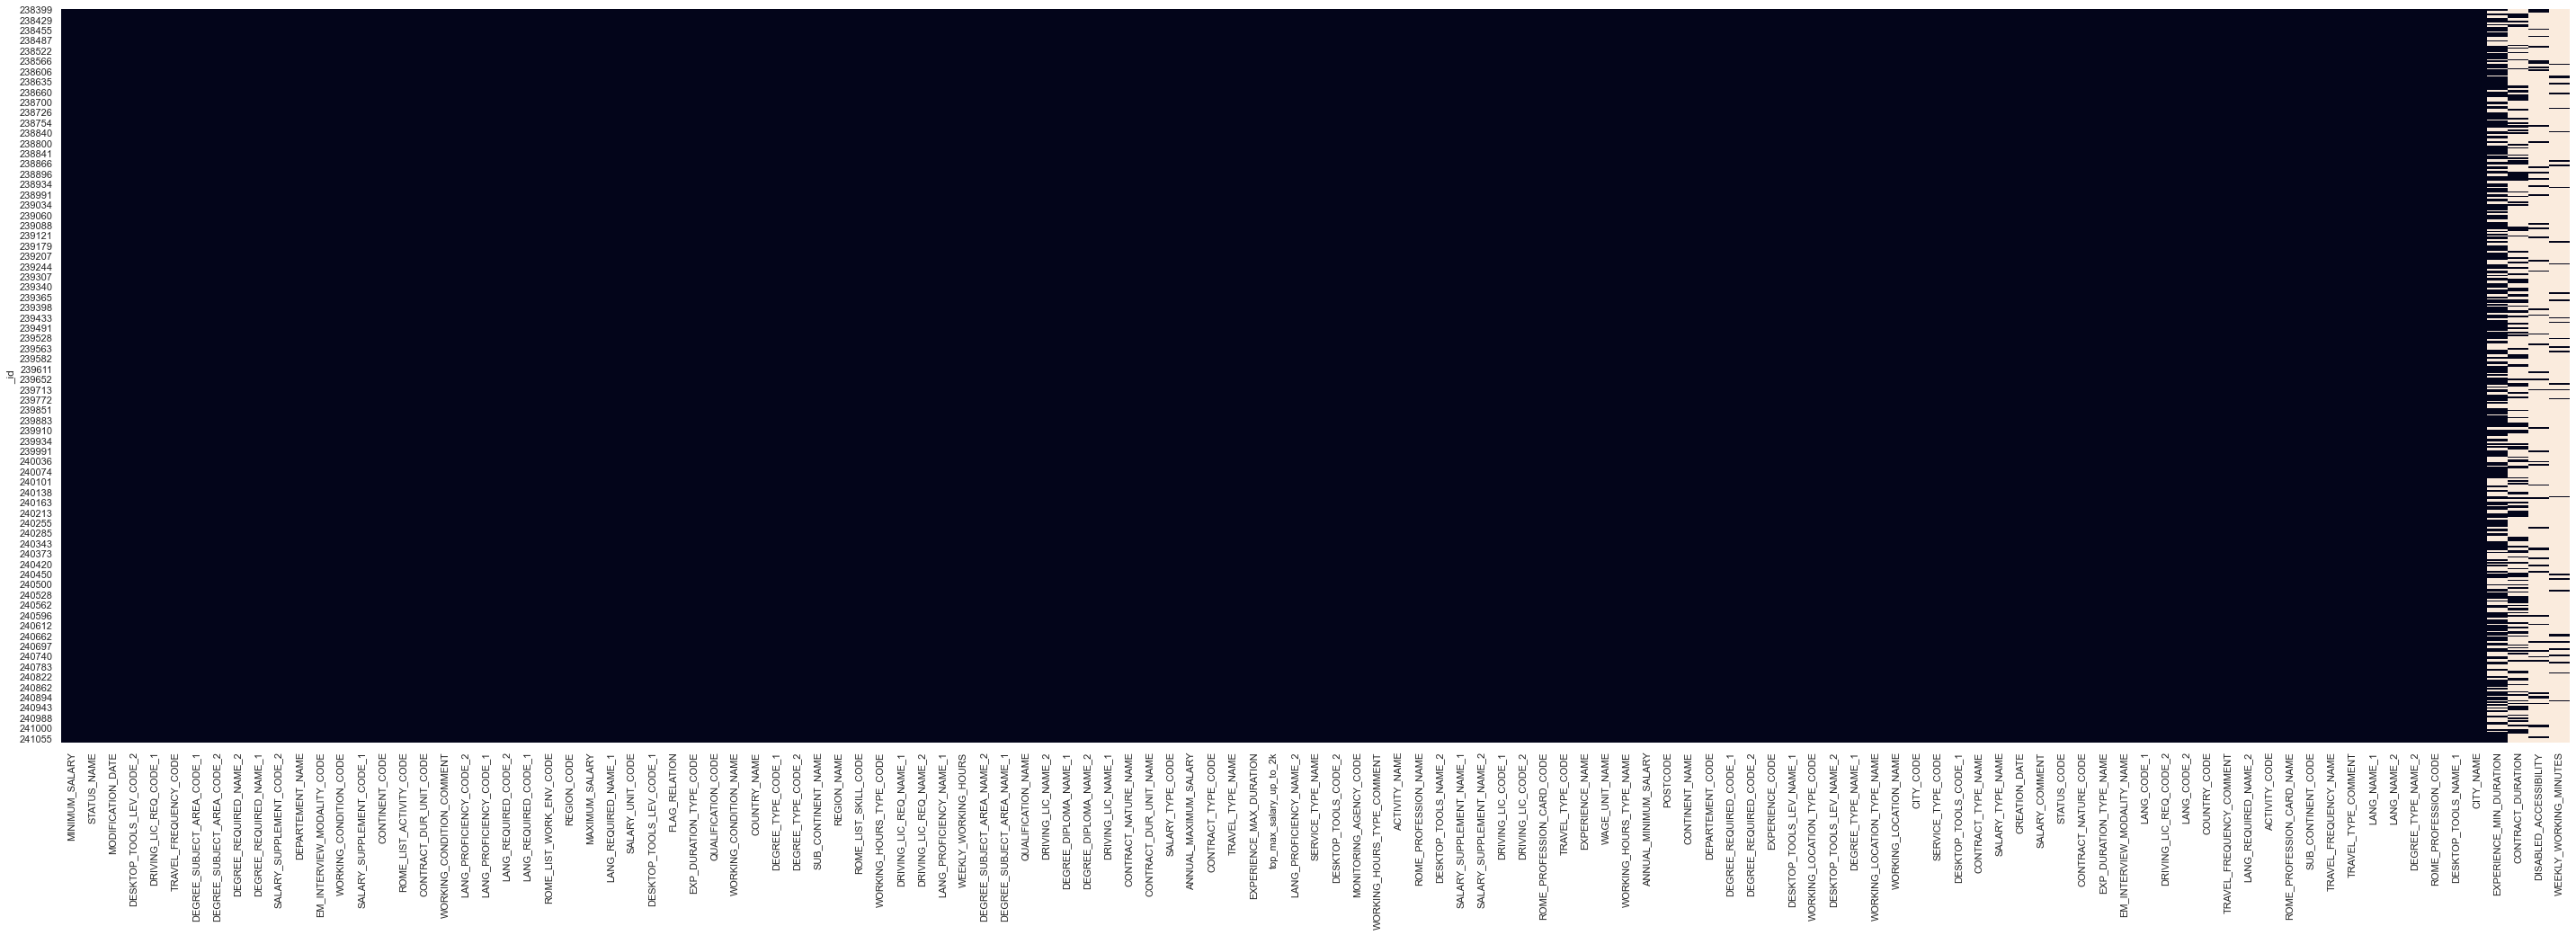

In [71]:
missing_rate = (df.isna().sum()/df.shape[0]).sort_values(ascending=False)
plt.figure(figsize=(50,15))
sns.heatmap(df[missing_rate.sort_values().index.tolist()].isna(),cbar=False)

<AxesSubplot:ylabel='_id'>

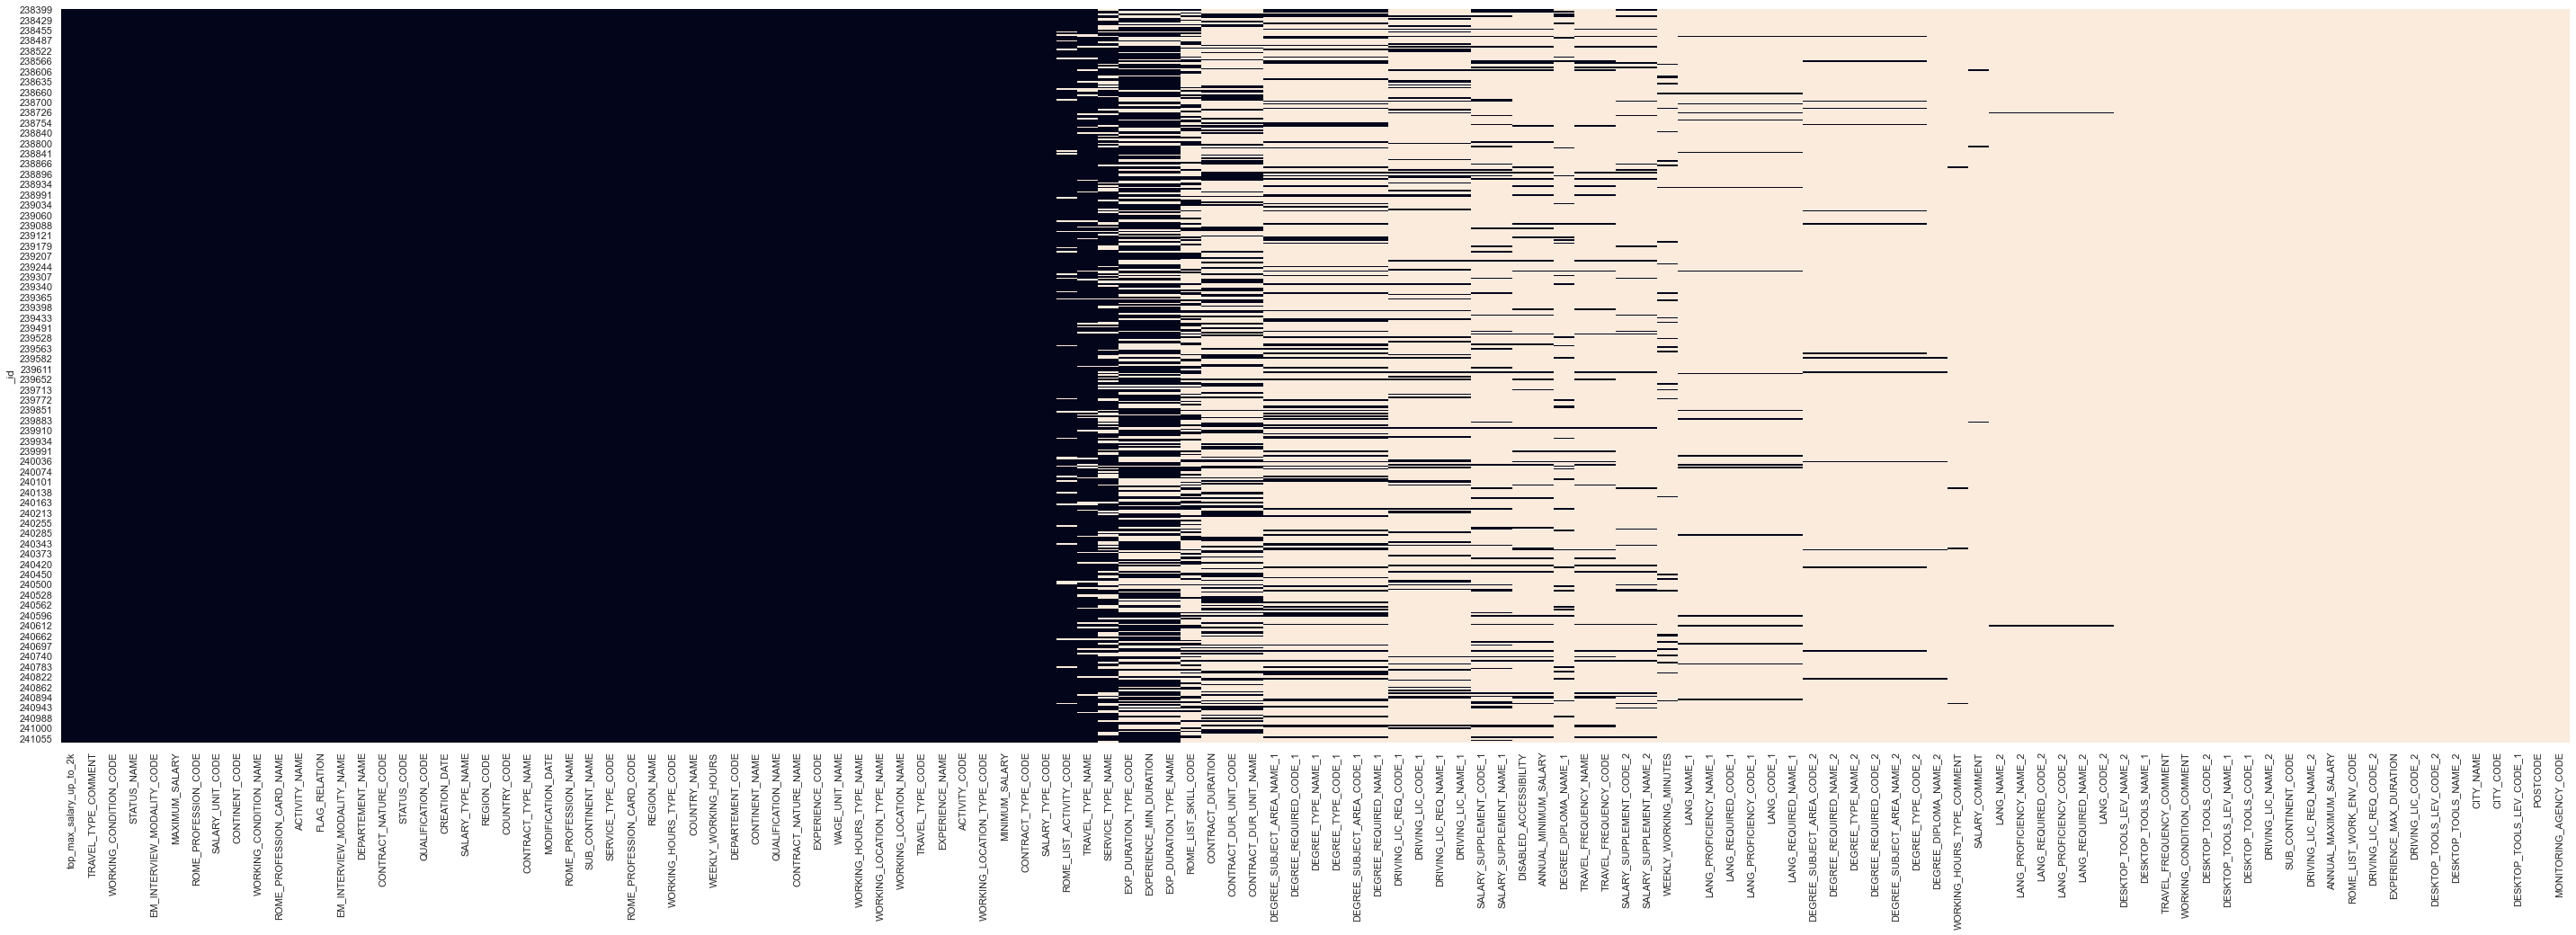

In [73]:
df = df.replace(r'^\s*$', np.nan, regex=True)
new_missing_rate = (df.isna().sum()/df.shape[0]).sort_values(ascending=False)
plt.figure(figsize=(50,15))
sns.heatmap(df[new_missing_rate.sort_values().index.tolist()].isna(),cbar=False)

In [74]:
for col in df.select_dtypes('object'):
    if df[col].nunique() < 100: 
        print(f'\n{col :-<20} {df[col].unique()}')
    else:
        print(f"Nombre de modalités : {str(df[col].nunique())}")

Nombre de modalités : 169

TRAVEL_TYPE_COMMENT- ['APP' 'ACP' 'ACC']

TRAVEL_FREQUENCY_NAME [nan 'Régional' 'Départemental' 'National' 'Autre']

LANG_NAME_1--------- [nan 'Anglais' 'Espagnol']

LANG_NAME_2--------- [nan 'Espagnol']

DEGREE_TYPE_NAME_2-- [nan 'Bac+3, Bac+4 ou équivalent' 'Bac+5 et plus ou équivalent'
 'CAP, BEP ou équivalent' 'Bac+2 ou équivalent' 'Bac ou équivalent'
 'Aucune formation scolaire']
Nombre de modalités : 335

LANG_CODE_2--------- [nan 'ES']

COUNTRY_CODE-------- ['01']

LANG_CODE_1--------- [nan 'AN' 'ES']

EM_INTERVIEW_MODALITY_NAME ['0' '1']

EXP_DURATION_TYPE_NAME ['An(s)' nan 'Mois']

CONTRACT_NATURE_CODE ['E1' 'FS' 'CU' 'E2' 'CC']

STATUS_CODE--------- ['EC']

SALARY_COMMENT------ [nan 'Selon profil et expérience' 'Selon expérience' 'selon profil']

CREATION_DATE------- ['16/11/21' '19/10/21' '18/10/21' '04/11/21' '12/11/21' '10/11/21'
 '05/11/21' '26/08/21' '21/10/21' '15/11/21' '08/11/21' '15/10/21'
 '03/11/21' '25/10/21' '09/11/21' '29/10/21' '20/10


Colonne : ROME_PROFESSION_CARD_NAME


nb_ROME_PROFESSION_CARD_NAME  \
Études et développement informatique                              21   
Personnel de cuisine                                              17   
Assistance auprès d'adultes                                       14   
Nettoyage de locaux                                               13   
Ingénierie et études du BTP                                       12   
...                                                              ...   
Secrétariat comptable                                              1   
Études géologiques                                                 1   
Ajustement et montage de fabrication                               1   
Montage audiovisuel et post-production                             1   
Peinture en bâtiment                                               1   

                                        pct_ROME_PROFESSION_CARD_NAME  
Études et développement informatique                              4.2  
Personnel de cuisine                                              3.4  
Assistance auprès d'adultes                                       2.8  
Nettoyage de locaux                                               2.6  
Ingénierie et études du BTP                                       2.4  
...                                                               ...  
Secrétariat comptable                                             0.2  
Études géologiques                                                0.2  
Ajustement et montage de fabrication                              0.2  
Montage audiovisuel et post-production                            0.2  
Peinture en bâtiment                                              0.2  

[169 rows x 2 columns]

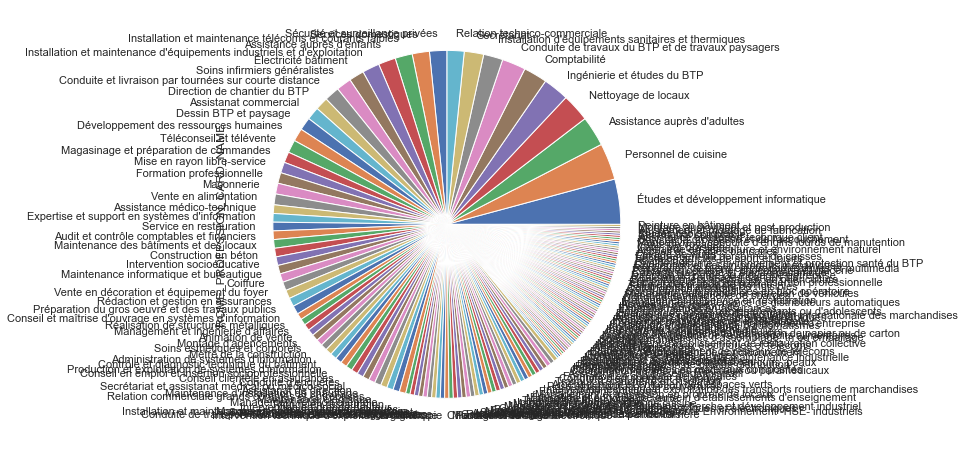


Colonne : TRAVEL_TYPE_COMMENT


nb_TRAVEL_TYPE_COMMENT  pct_TRAVEL_TYPE_COMMENT
APP                     472                     94.4
ACP                      25                      5.0
ACC                       3                      0.6

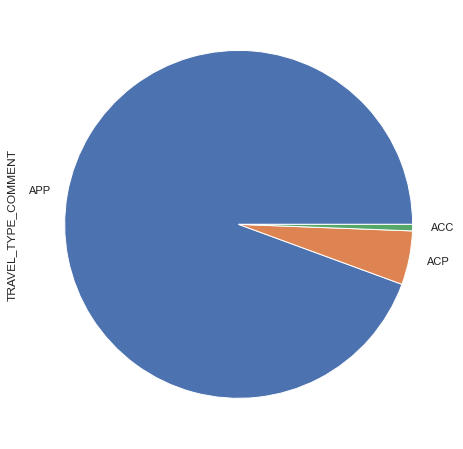


Colonne : TRAVEL_FREQUENCY_NAME


nb_TRAVEL_FREQUENCY_NAME  pct_TRAVEL_FREQUENCY_NAME
Régional                             18                  47.368421
Départemental                        17                  44.736842
National                              2                   5.263158
Autre                                 1                   2.631579

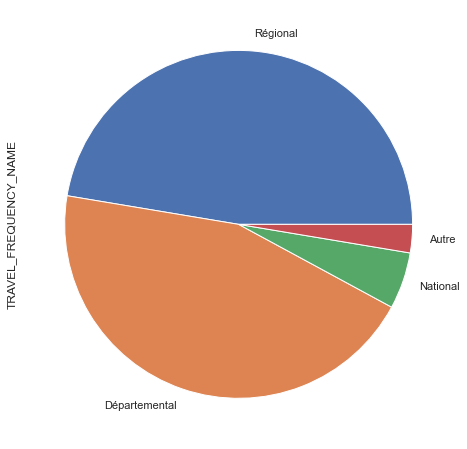


Colonne : LANG_NAME_1


nb_LANG_NAME_1  pct_LANG_NAME_1
Anglais               19             95.0
Espagnol               1              5.0

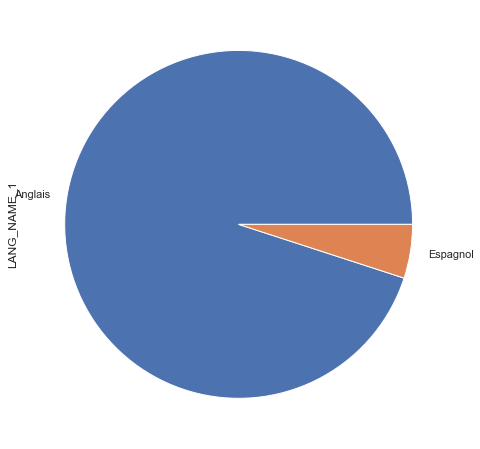


Colonne : LANG_NAME_2


nb_LANG_NAME_2  pct_LANG_NAME_2
Espagnol               2            100.0

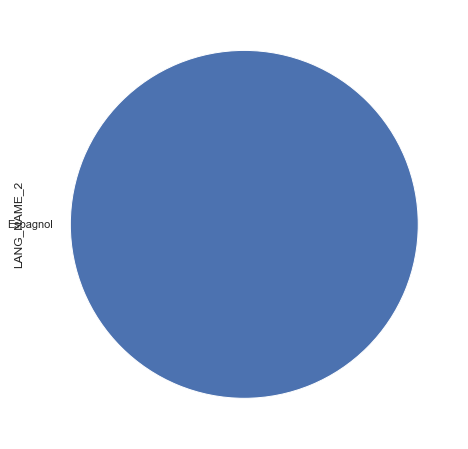


Colonne : DEGREE_TYPE_NAME_2


nb_DEGREE_TYPE_NAME_2  pct_DEGREE_TYPE_NAME_2
Bac+2 ou équivalent                              4               26.666667
Bac+5 et plus ou équivalent                      3               20.000000
Bac+3, Bac+4 ou équivalent                       3               20.000000
CAP, BEP ou équivalent                           2               13.333333
Bac ou équivalent                                2               13.333333
Aucune formation scolaire                        1                6.666667

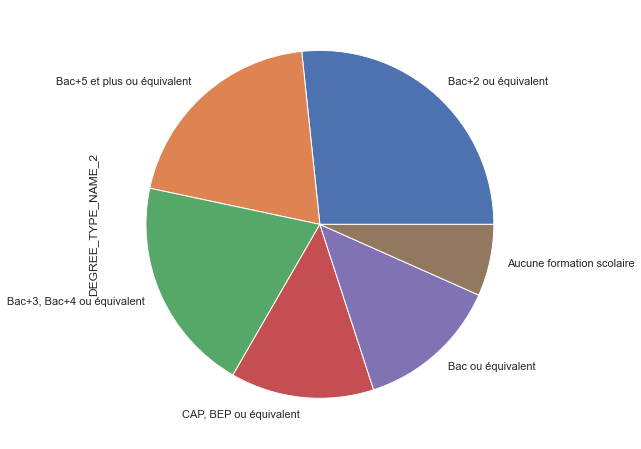


Colonne : ROME_PROFESSION_CODE


nb_ROME_PROFESSION_CODE  pct_ROME_PROFESSION_CODE
11453                        8                       1.6
13861                        7                       1.4
15545                        7                       1.4
10857                        7                       1.4
20291                        6                       1.2
...                        ...                       ...
19533                        1                       0.2
10891                        1                       0.2
19374                        1                       0.2
16652                        1                       0.2
10339                        1                       0.2

[335 rows x 2 columns]

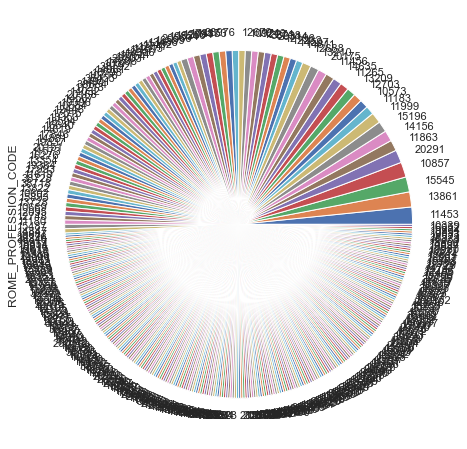


Colonne : LANG_CODE_2


nb_LANG_CODE_2  pct_LANG_CODE_2
ES               2            100.0

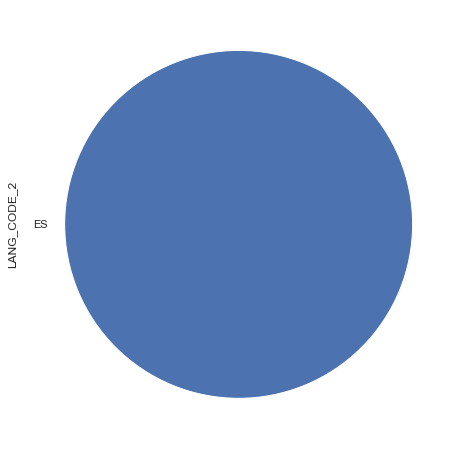


Colonne : COUNTRY_CODE


nb_COUNTRY_CODE  pct_COUNTRY_CODE
01              500             100.0

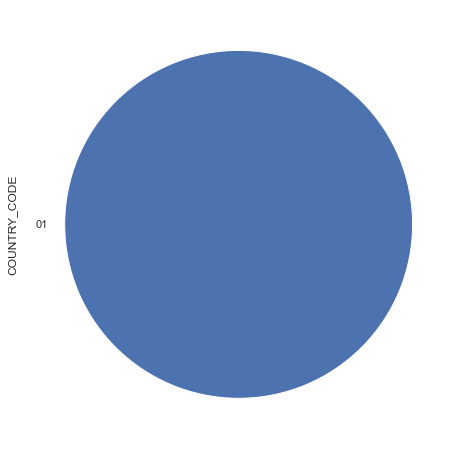


Colonne : LANG_CODE_1


nb_LANG_CODE_1  pct_LANG_CODE_1
AN              19             95.0
ES               1              5.0

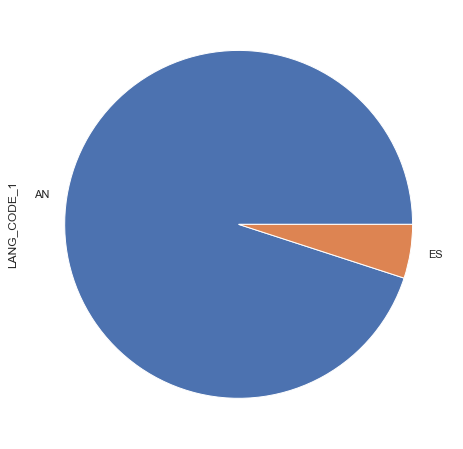


Colonne : EM_INTERVIEW_MODALITY_NAME


nb_EM_INTERVIEW_MODALITY_NAME  pct_EM_INTERVIEW_MODALITY_NAME
0                            464                            92.8
1                             36                             7.2

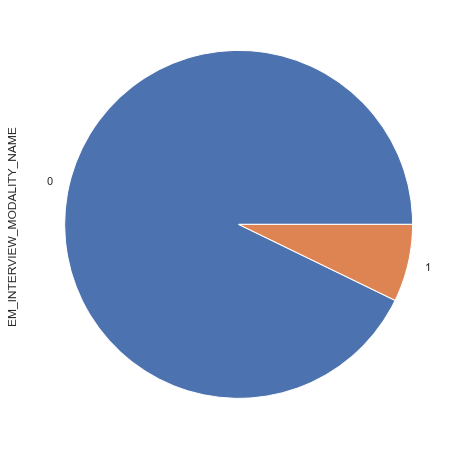


Colonne : EXP_DURATION_TYPE_NAME


nb_EXP_DURATION_TYPE_NAME  pct_EXP_DURATION_TYPE_NAME
An(s)                        284                   92.207792
Mois                          24                    7.792208

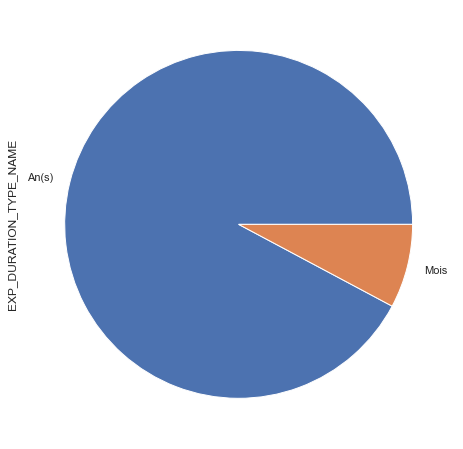


Colonne : CONTRACT_NATURE_CODE


nb_CONTRACT_NATURE_CODE  pct_CONTRACT_NATURE_CODE
E1                      479                      95.8
FS                        8                       1.6
E2                        7                       1.4
CC                        4                       0.8
CU                        2                       0.4

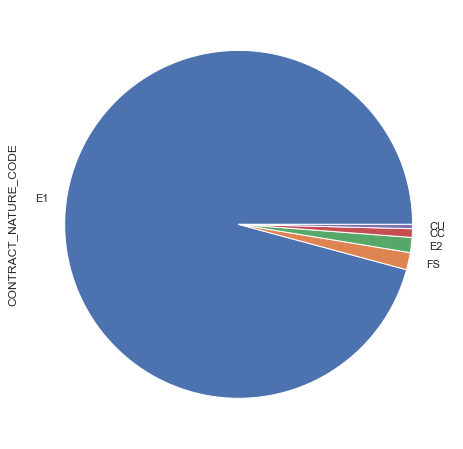


Colonne : STATUS_CODE


nb_STATUS_CODE  pct_STATUS_CODE
EC             500            100.0

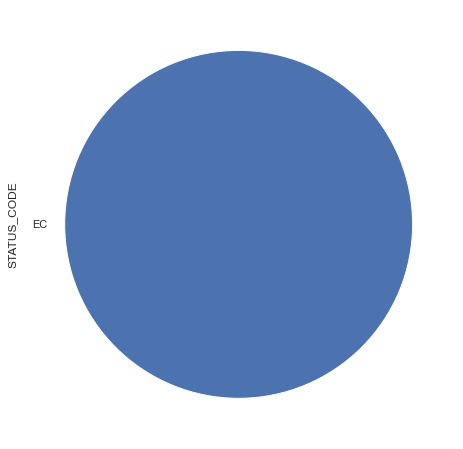


Colonne : SALARY_COMMENT


nb_SALARY_COMMENT  pct_SALARY_COMMENT
Selon profil et expérience                  1           33.333333
Selon expérience                            1           33.333333
selon profil                                1           33.333333

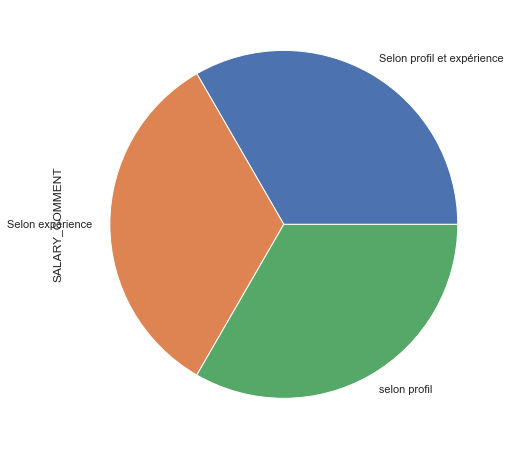


Colonne : CREATION_DATE


nb_CREATION_DATE  pct_CREATION_DATE
03/11/21                49                9.8
08/11/21                33                6.6
15/11/21                31                6.2
04/11/21                31                6.2
09/11/21                30                6.0
25/10/21                25                5.0
16/11/21                25                5.0
22/10/21                23                4.6
28/10/21                22                4.4
10/11/21                22                4.4
05/11/21                21                4.2
12/11/21                21                4.2
26/10/21                18                3.6
27/10/21                15                3.0
19/10/21                13                2.6
21/10/21                12                2.4
29/10/21                11                2.2
18/10/21                11                2.2
20/10/21                10                2.0
15/10/21                 8                1.6
04/10/21                 6                1.2
15/09/21                 6                1.2
12/10/21                 5                1.0
06/11/21                 3                0.6
14/10/21                 3                0.6
13/11/21                 3                0.6
13/10/21                 3                0.6
02/09/21                 3                0.6
24/09/21                 3                0.6
29/09/21                 2                0.4
01/10/21                 2                0.4
27/09/21                 2                0.4
26/08/21                 2                0.4
13/09/21                 2                0.4
14/11/21                 2                0.4
28/09/21                 2                0.4
13/07/21                 2                0.4
02/11/21                 2                0.4
20/09/21                 2                0.4
11/10/21                 1                0.2
08/10/21                 1                0.2
18/06/21                 1                0.2
30/09/21                 1                0.2
18/09/21                 1                0.2
11/08/21                 1                0.2
11/11/21                 1                0.2
30/08/21                 1                0.2
21/09/21                 1                0.2
23/10/21                 1                0.2
17/09/21                 1                0.2
07/09/21                 1                0.2
16/10/21                 1                0.2
31/08/21                 1                0.2

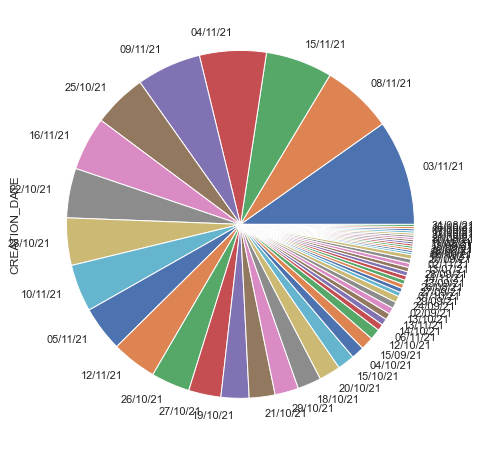


Colonne : SALARY_TYPE_NAME


nb_SALARY_TYPE_NAME  pct_SALARY_TYPE_NAME
Mensuel                  222                  44.4
Horaire                  149                  29.8
Annuel                   129                  25.8

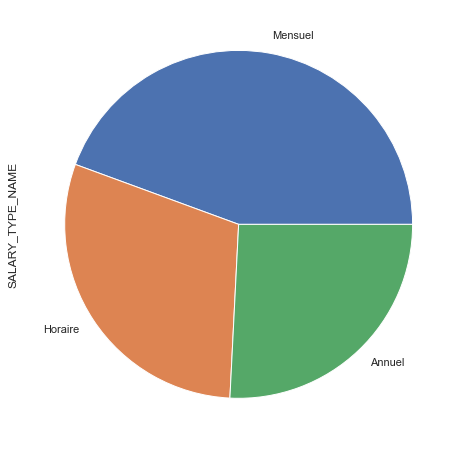


Colonne : CONTRACT_TYPE_NAME


nb_CONTRACT_TYPE_NAME  pct_CONTRACT_TYPE_NAME
CDI                                336                    67.2
CDD                                 89                    17.8
Interim                             74                    14.8
CDI Intérimaire                      1                     0.2

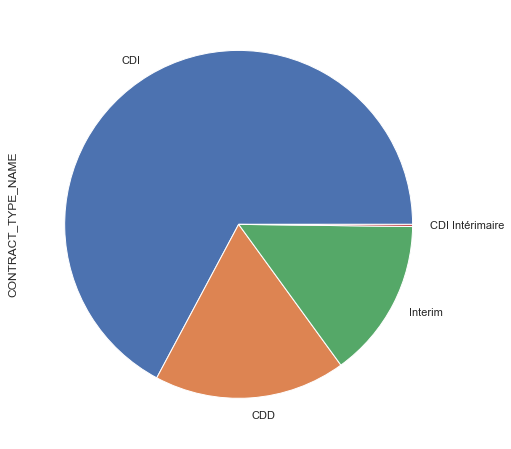


Colonne : WORKING_LOCATION_TYPE_NAME


nb_WORKING_LOCATION_TYPE_NAME  pct_WORKING_LOCATION_TYPE_NAME
Une commune                            500                           100.0

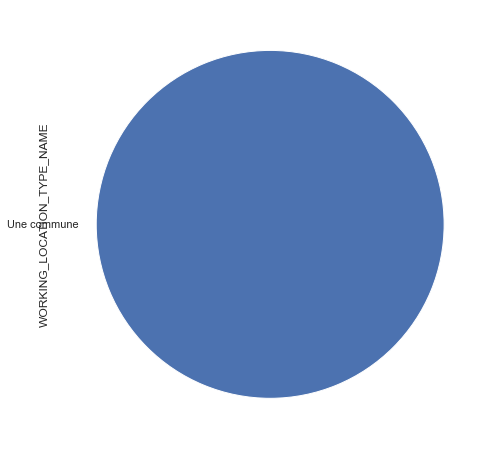


Colonne : ACTIVITY_CODE


nb_ACTIVITY_CODE  pct_ACTIVITY_CODE
7820Z               139               27.8
7022Z                41                8.2
5610A                22                4.4
6201Z                18                3.6
8810A                18                3.6
...                 ...                ...
2599B                 1                0.2
8810B                 1                0.2
1072Z                 1                0.2
3832Z                 1                0.2
3320A                 1                0.2

[100 rows x 2 columns]

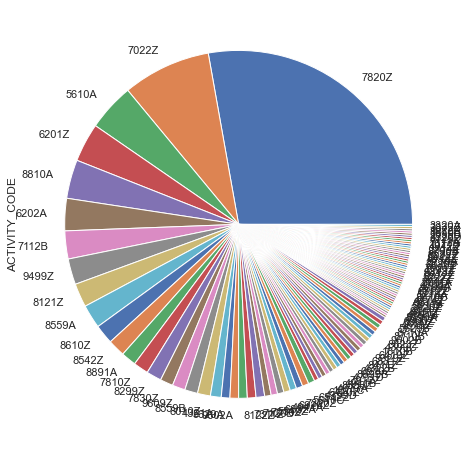


Colonne : SERVICE_TYPE_CODE


nb_SERVICE_TYPE_CODE  pct_SERVICE_TYPE_CODE
N                   500                  100.0

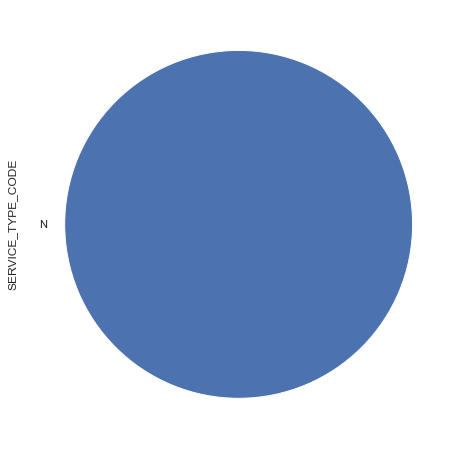


Colonne : ROME_PROFESSION_CARD_CODE


nb_ROME_PROFESSION_CARD_CODE  pct_ROME_PROFESSION_CARD_CODE
M1805                            21                            4.2
G1602                            17                            3.4
K1302                            14                            2.8
K2204                            13                            2.6
F1106                            12                            2.4
...                             ...                            ...
F1105                             1                            0.2
K2301                             1                            0.2
J1507                             1                            0.2
H3203                             1                            0.2
N1104                             1                            0.2

[169 rows x 2 columns]

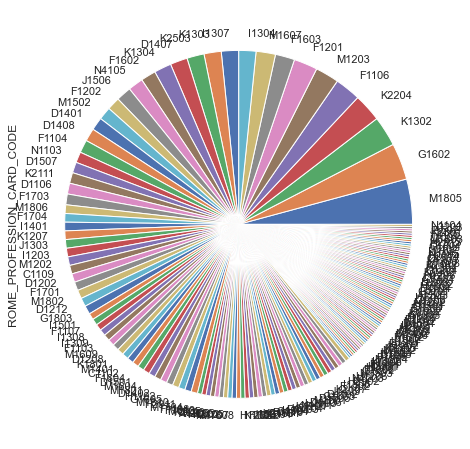


Colonne : EXPERIENCE_CODE


nb_EXPERIENCE_CODE  pct_EXPERIENCE_CODE
E                 284                 56.8
D                 192                 38.4
S                  24                  4.8

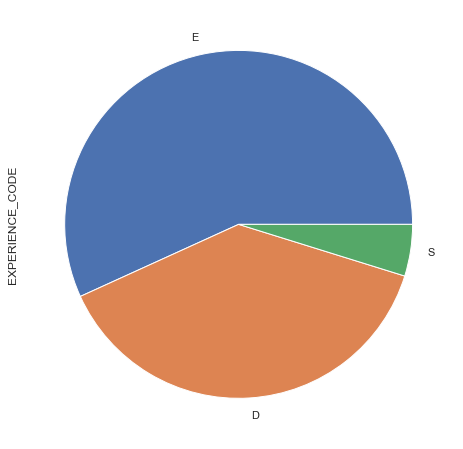


Colonne : DEGREE_REQUIRED_CODE_2


nb_DEGREE_REQUIRED_CODE_2  pct_DEGREE_REQUIRED_CODE_2
S                          8                   53.333333
E                          7                   46.666667

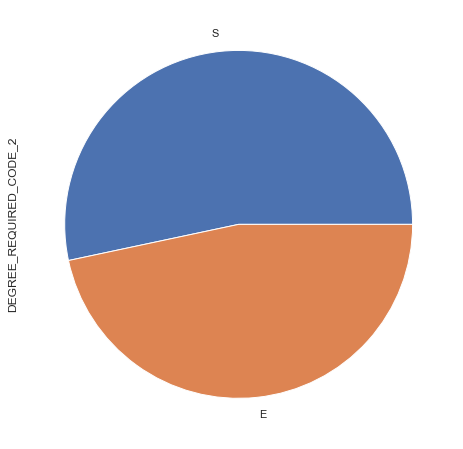


Colonne : DEGREE_REQUIRED_CODE_1


nb_DEGREE_REQUIRED_CODE_1  pct_DEGREE_REQUIRED_CODE_1
E                         56                   51.376147
S                         53                   48.623853

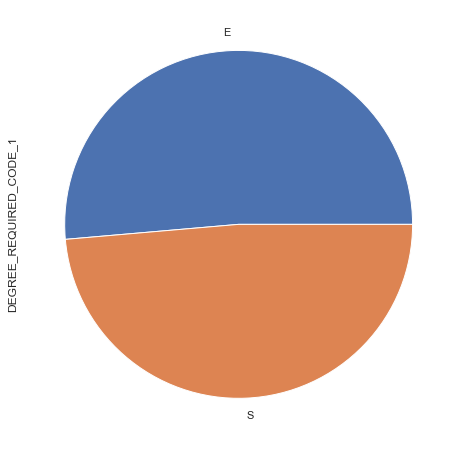


Colonne : DEPARTEMENT_CODE


nb_DEPARTEMENT_CODE  pct_DEPARTEMENT_CODE
44                  500                 100.0

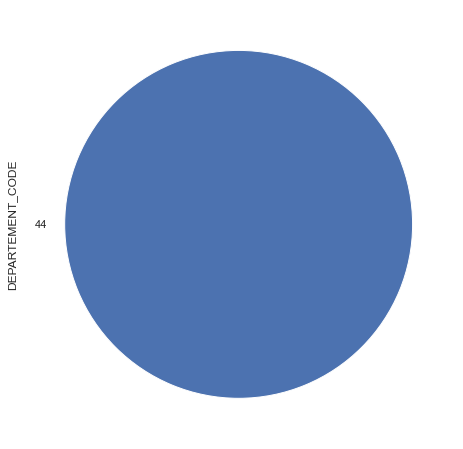


Colonne : CONTINENT_NAME


nb_CONTINENT_NAME  pct_CONTINENT_NAME
30000                   36                 7.2
24000                   20                 4.0
45000                   16                 3.2
40000                   13                 2.6
27000                   13                 2.6
...                    ...                 ...
21118.5                  1                 0.2
26676                    1                 0.2
19500                    1                 0.2
4004                     1                 0.2
28992                    1                 0.2

[192 rows x 2 columns]

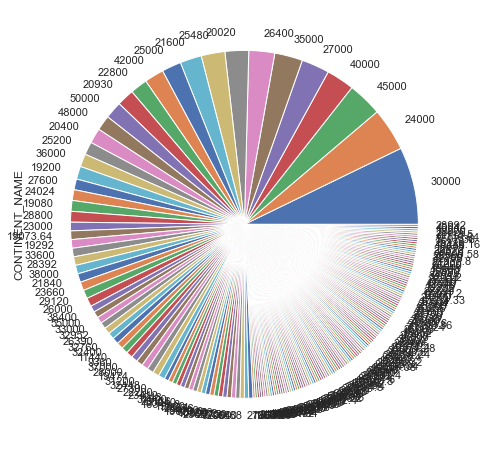


Colonne : ANNUAL_MINIMUM_SALARY


nb_ANNUAL_MINIMUM_SALARY  pct_ANNUAL_MINIMUM_SALARY
Jamais                            15                  28.301887
Fréquents                         13                  24.528302
Ponctuels                         13                  24.528302
Quotidiens                        12                  22.641509

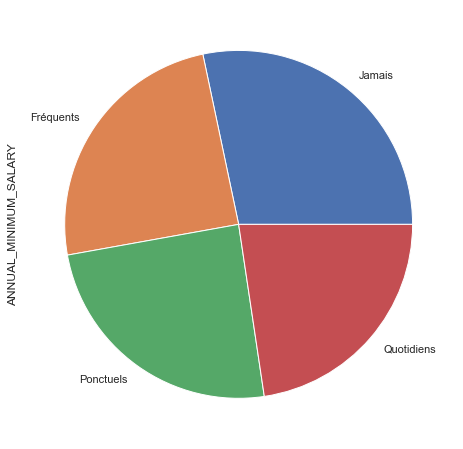


Colonne : WORKING_HOURS_TYPE_NAME


nb_WORKING_HOURS_TYPE_NAME  \
Horaires normaux                                   493   
Horaires variables                                   4   
Travail le samedi                                    2   
Travail samedi et dimanche                           1   

                            pct_WORKING_HOURS_TYPE_NAME  
Horaires normaux                                   98.6  
Horaires variables                                  0.8  
Travail le samedi                                   0.4  
Travail samedi et dimanche                          0.2

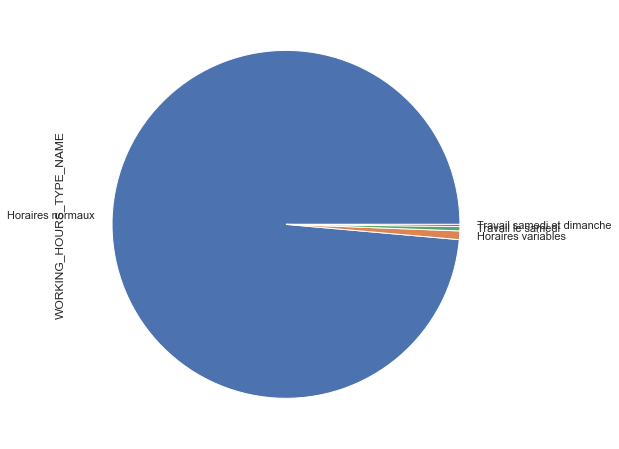


Colonne : WAGE_UNIT_NAME


nb_WAGE_UNIT_NAME  pct_WAGE_UNIT_NAME
Euros                500               100.0

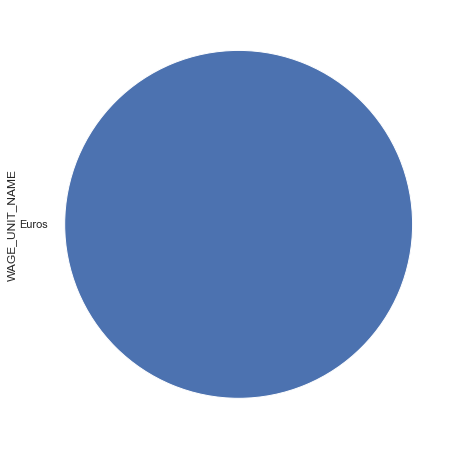


Colonne : DEGREE_TYPE_NAME_1


nb_DEGREE_TYPE_NAME_1  pct_DEGREE_TYPE_NAME_1
Bac+2 ou équivalent                             38               34.862385
Bac ou équivalent                               23               21.100917
CAP, BEP ou équivalent                          20               18.348624
Bac+3, Bac+4 ou équivalent                      16               14.678899
Bac+5 et plus ou équivalent                     11               10.091743
Aucune formation scolaire                        1                0.917431

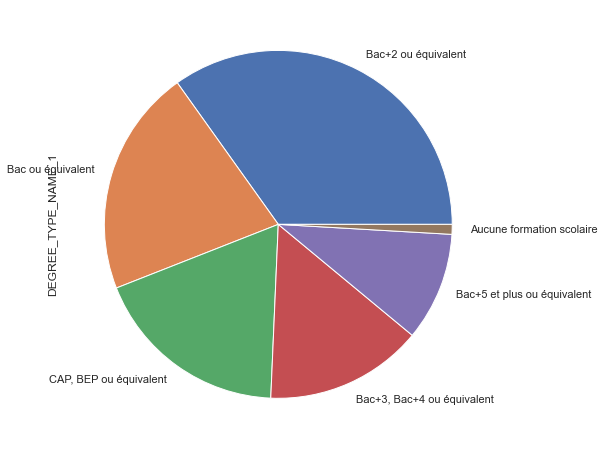


Colonne : DRIVING_LIC_CODE_1


nb_DRIVING_LIC_CODE_1  pct_DRIVING_LIC_CODE_1
B                       75               94.936709
C                        3                3.797468
B79                      1                1.265823

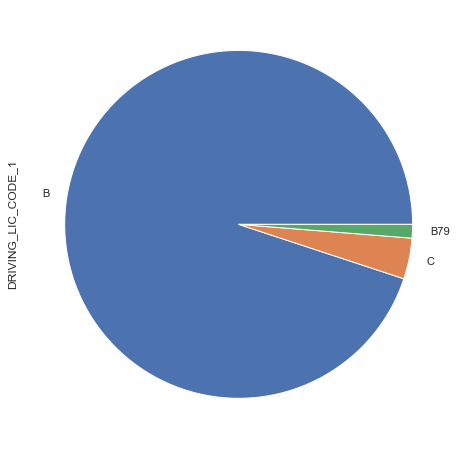


Colonne : SALARY_SUPPLEMENT_NAME_2


nb_SALARY_SUPPLEMENT_NAME_2  \
Mutuelle                                       16   
Chèque repas                                    6   
Participation/action                            5   
Véhicule                                        4   
Mobile                                          2   
CE                                              2   
Pc portable                                     1   
Restauration                                    1   

                      pct_SALARY_SUPPLEMENT_NAME_2  
Mutuelle                                 43.243243  
Chèque repas                             16.216216  
Participation/action                     13.513514  
Véhicule                                 10.810811  
Mobile                                    5.405405  
CE                                        5.405405  
Pc portable                               2.702703  
Restauration                              2.702703

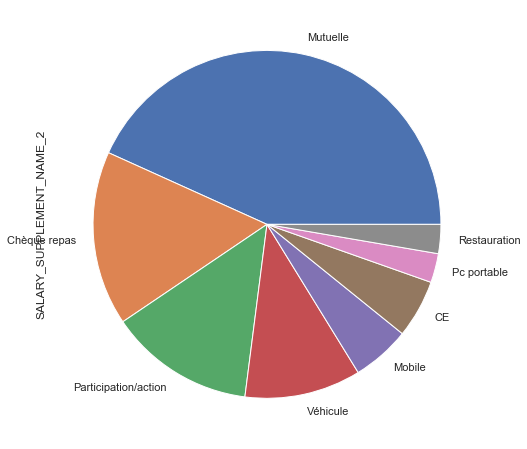


Colonne : SALARY_SUPPLEMENT_NAME_1


nb_SALARY_SUPPLEMENT_NAME_1  \
Primes                                         23   
Chèque repas                                   17   
Mutuelle                                       10   
Véhicule                                       10   
Autre                                           3   
Mobile                                          2   
Participation/action                            1   
Hébergement                                     1   
CE                                              1   

                      pct_SALARY_SUPPLEMENT_NAME_1  
Primes                                   33.823529  
Chèque repas                             25.000000  
Mutuelle                                 14.705882  
Véhicule                                 14.705882  
Autre                                     4.411765  
Mobile                                    2.941176  
Participation/action                      1.470588  
Hébergement                               1.470588  
CE                                        1.470588

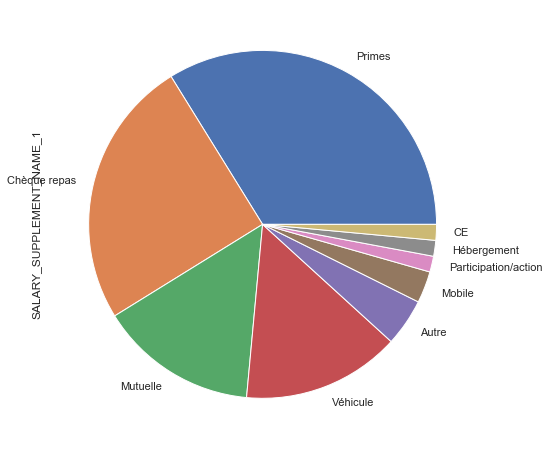


Colonne : ROME_PROFESSION_NAME


nb_ROME_PROFESSION_NAME  \
Auxiliaire de vie                                                         8   
Infirmier / Infirmière de soins généraux                                  7   
Aide ménager / ménagère à domicile                                        7   
Cuisinier / Cuisinière                                                    7   
Technico-commercial / Technico-commerciale                                6   
...                                                                     ...   
Technicien / Technicienne de maintenance en équ...                        1   
Chef de bureau d'études en BTP                                            1   
Assistant / Assistante de vie                                             1   
Employé / Employée de maison                                              1   
Électricien monteur / Électricienne monteuse ré...                        1   

                                                    pct_ROME_PROFESSION_NAME  
Auxiliaire de vie                                                        1.6  
Infirmier / Infirmière de soins généraux                                 1.4  
Aide ménager / ménagère à domicile                                       1.4  
Cuisinier / Cuisinière                                                   1.4  
Technico-commercial / Technico-commerciale                               1.2  
...                                                                      ...  
Technicien / Technicienne de maintenance en équ...                       0.2  
Chef de bureau d'études en BTP                                           0.2  
Assistant / Assistante de vie                                            0.2  
Employé / Employée de maison                                             0.2  
Électricien monteur / Électricienne monteuse ré...                       0.2  

[335 rows x 2 columns]

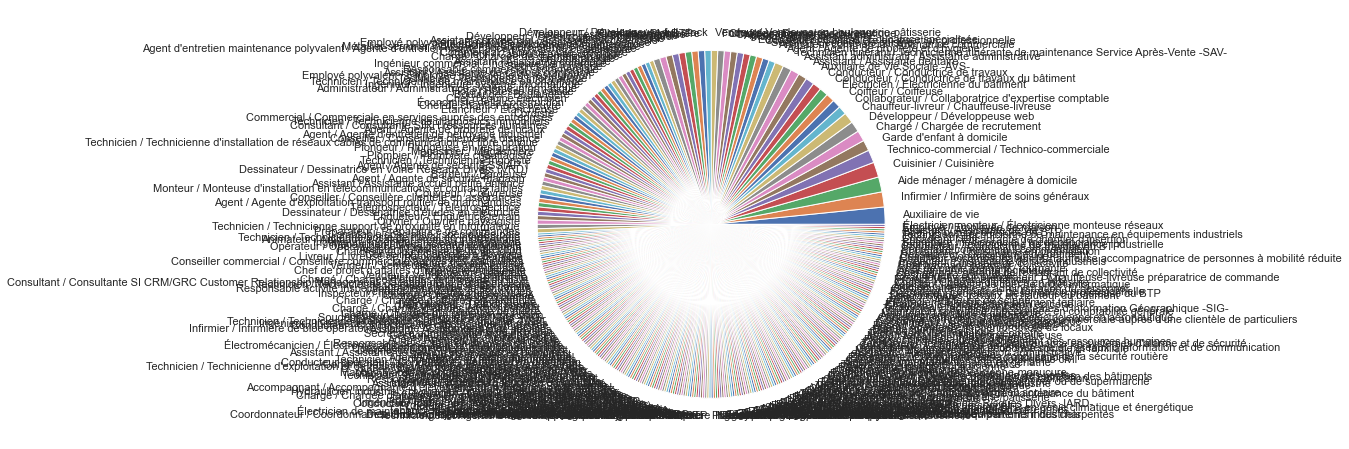


Colonne : ACTIVITY_NAME


nb_ACTIVITY_NAME  \
Activités des agences de travail temporaire                      139   
Conseil pour les affaires et autres conseils de...                41   
Restauration traditionnelle                                       22   
Programmation informatique                                        18   
Aide à domicile                                                   18   
...                                                              ...   
Réparation d'équipements électriques                               1   
Activités de clubs de sports                                       1   
Entreposage et stockage frigorifique                               1   
Commerce de gros (commerce interentreprises) d'...                 1   
Transports maritimes et côtiers de fret                            1   

                                                    pct_ACTIVITY_NAME  
Activités des agences de travail temporaire                      27.8  
Conseil pour les affaires et autres conseils de...                8.2  
Restauration traditionnelle                                       4.4  
Programmation informatique                                        3.6  
Aide à domicile                                                   3.6  
...                                                               ...  
Réparation d'équipements électriques                              0.2  
Activités de clubs de sports                                      0.2  
Entreposage et stockage frigorifique                              0.2  
Commerce de gros (commerce interentreprises) d'...                0.2  
Transports maritimes et côtiers de fret                           0.2  

[100 rows x 2 columns]

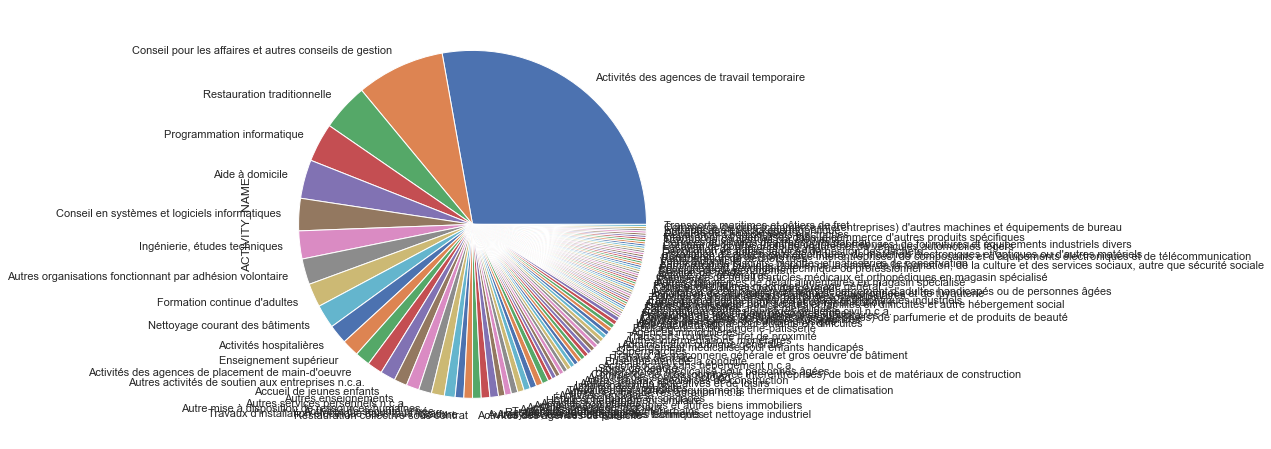


Colonne : WORKING_HOURS_TYPE_COMMENT


nb_WORKING_HOURS_TYPE_COMMENT  \
+2h supplémentaires                              2   
+ INTERESSEMENT                                  1   
travail en 5x8                                   1   

                     pct_WORKING_HOURS_TYPE_COMMENT  
+2h supplémentaires                            50.0  
+ INTERESSEMENT                                25.0  
travail en 5x8                                 25.0

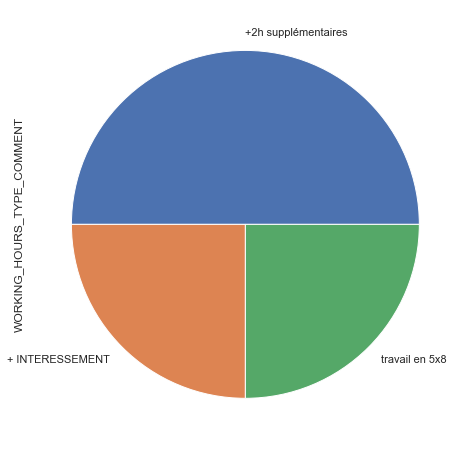


Colonne : WORKING_LOCATION_NAME


nb_WORKING_LOCATION_NAME  pct_WORKING_LOCATION_NAME
NANTES                                        493                       98.6
AGGLOMERATION NANTAISE                          3                        0.6
PUCEUL                                          2                        0.4
NANTES ou Saint-Nazaire                         1                        0.2
AIGREFEUILLE SUR MAINE                          1                        0.2

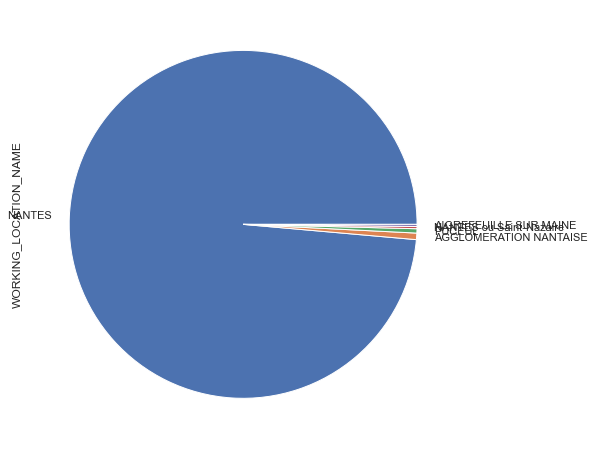


Colonne : TRAVEL_TYPE_CODE


nb_TRAVEL_TYPE_CODE  pct_TRAVEL_TYPE_CODE
MEL                  432                  86.4
URL                   49                   9.8
TEL                   12                   2.4
SLE                    4                   0.8
ECV                    3                   0.6

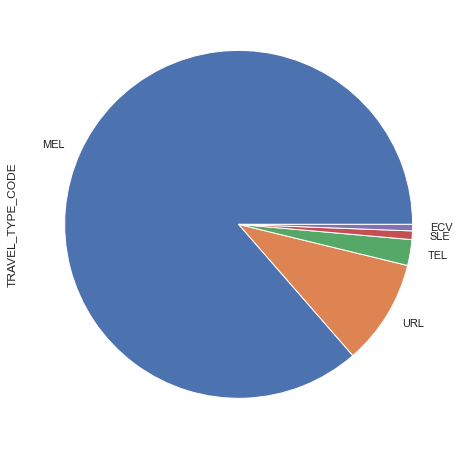


Colonne : EXPERIENCE_NAME


nb_EXPERIENCE_NAME  pct_EXPERIENCE_NAME
Expérience exigée                    284                 56.8
Débutant accepté                     192                 38.4
Expérience souhaitée                  24                  4.8

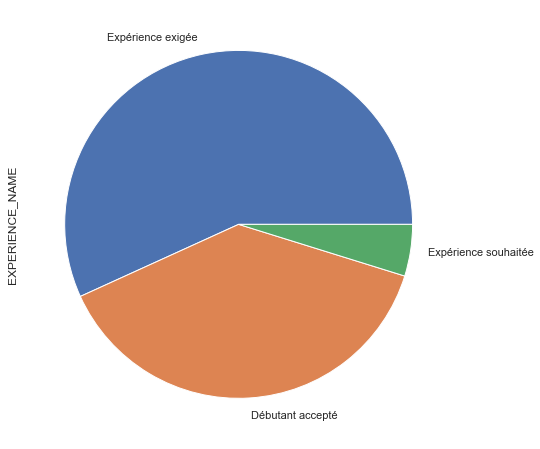


Colonne : WORKING_LOCATION_TYPE_CODE


nb_WORKING_LOCATION_TYPE_CODE  pct_WORKING_LOCATION_TYPE_CODE
CO                            500                           100.0

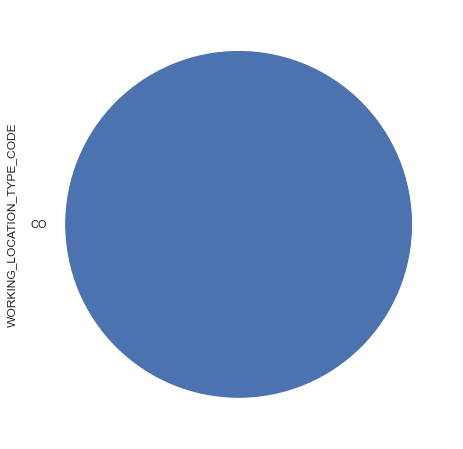


Colonne : LANG_REQUIRED_NAME_2


nb_LANG_REQUIRED_NAME_2  pct_LANG_REQUIRED_NAME_2
exigé                           1                      50.0
souhaité                        1                      50.0

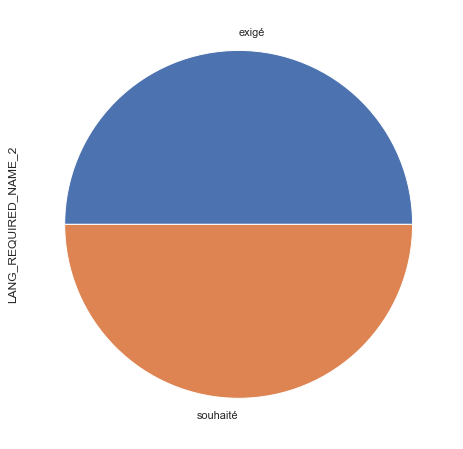


Colonne : LANG_REQUIRED_NAME_1


nb_LANG_REQUIRED_NAME_1  pct_LANG_REQUIRED_NAME_1
souhaité                       11                      55.0
exigé                           9                      45.0

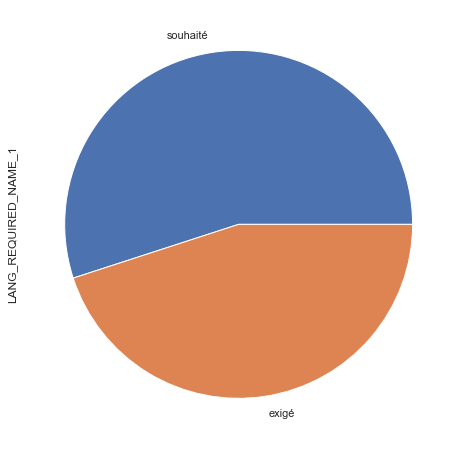


Colonne : SERVICE_TYPE_NAME


nb_SERVICE_TYPE_NAME  pct_SERVICE_TYPE_NAME
1                    100              28.248588
2                     60              16.949153
3                     37              10.451977
4                     36              10.169492
5                     22               6.214689
6                     20               5.649718
9                     11               3.107345
8                     11               3.107345
7                     10               2.824859
13                     6               1.694915
18                     6               1.694915
10                     5               1.412429
12                     4               1.129944
11                     4               1.129944
19                     3               0.847458
17                     3               0.847458
22                     2               0.564972
16                     2               0.564972
15                     2               0.564972
30                     1               0.282486
14                     1               0.282486
20                     1               0.282486
35                     1               0.282486
21                     1               0.282486
27                     1               0.282486
50                     1               0.282486
28                     1               0.282486
59                     1               0.282486
34                     1               0.282486

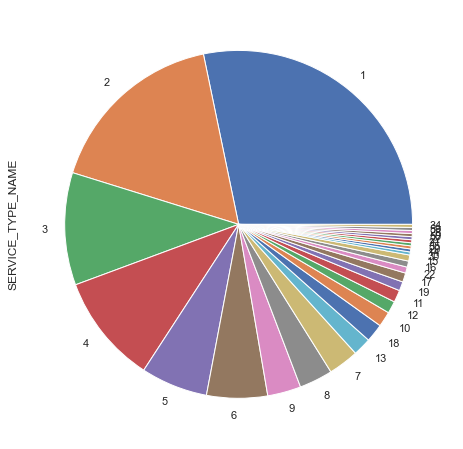


Colonne : CONTRACT_TYPE_CODE


nb_CONTRACT_TYPE_CODE  pct_CONTRACT_TYPE_CODE
CDI                    336                    67.2
CDD                     89                    17.8
MIS                     74                    14.8
DIN                      1                     0.2

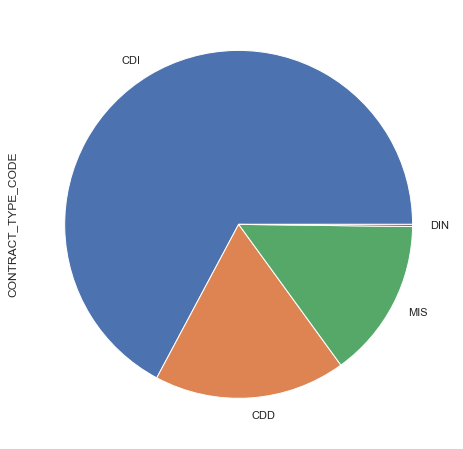


Colonne : SALARY_TYPE_CODE


nb_SALARY_TYPE_CODE  pct_SALARY_TYPE_CODE
M                  222                  44.4
H                  149                  29.8
A                  129                  25.8

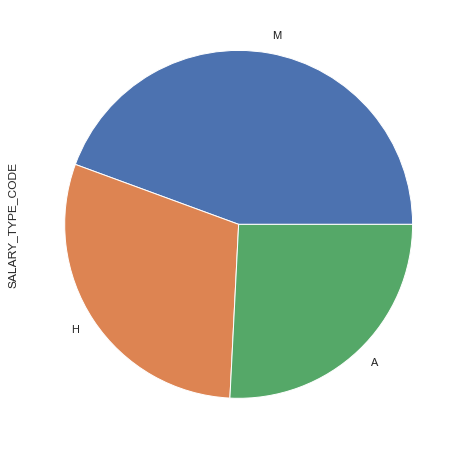


Colonne : CONTRACT_DUR_UNIT_NAME


nb_CONTRACT_DUR_UNIT_NAME  pct_CONTRACT_DUR_UNIT_NAME
Mois                           152                   93.251534
Jour(s)                         11                    6.748466

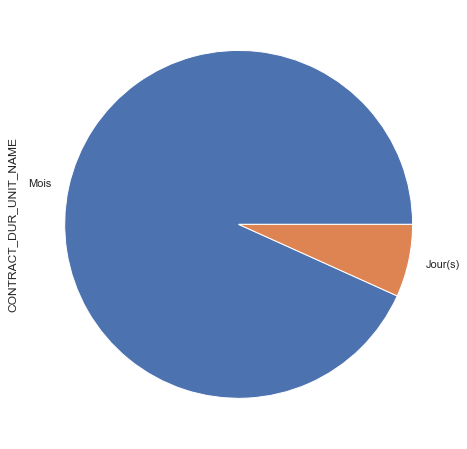


Colonne : CONTRACT_NATURE_NAME


nb_CONTRACT_NATURE_NAME  \
Contrat tout public                                  479   
Contrat de professionnalisation                        8   
Contrat d'apprentissage                                7   
CDI de chantier ou d'opération                         4   
Contrat d'usage                                        2   

                                 pct_CONTRACT_NATURE_NAME  
Contrat tout public                                  95.8  
Contrat de professionnalisation                       1.6  
Contrat d'apprentissage                               1.4  
CDI de chantier ou d'opération                        0.8  
Contrat d'usage                                       0.4

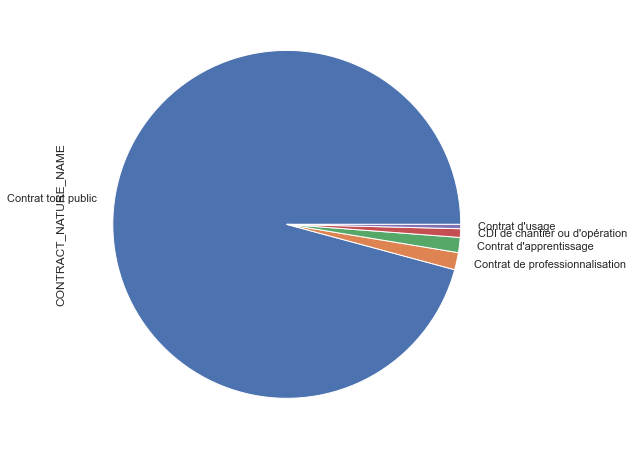


Colonne : DRIVING_LIC_NAME_1


nb_DRIVING_LIC_NAME_1  pct_DRIVING_LIC_NAME_1
B - Véhicule léger                         75               94.936709
C - Poids lourd                             3                3.797468
B mention 79.06 (= EB)                      1                1.265823

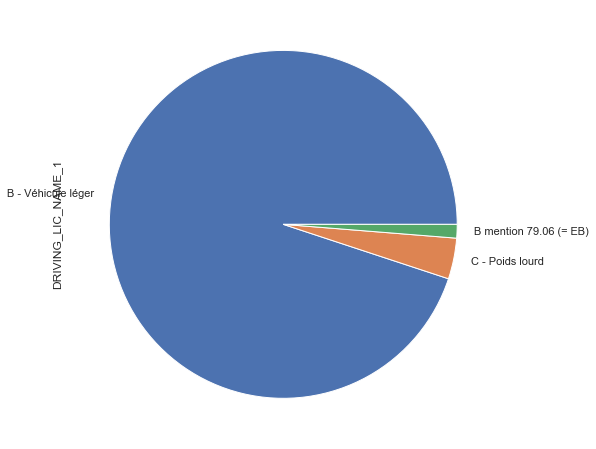


Colonne : DEGREE_DIPLOMA_NAME_2


nb_DEGREE_DIPLOMA_NAME_2  \
BAC - BTS - DUT AUDIOVISUEL                              1   
MONITEUR EDUCATEUR                                       1   
LICENCE PRO GENIE CLIMATIQUE                             1   
BNSSA                                                    1   
DE économie sociale et familiale                         1   

                                  pct_DEGREE_DIPLOMA_NAME_2  
BAC - BTS - DUT AUDIOVISUEL                            20.0  
MONITEUR EDUCATEUR                                     20.0  
LICENCE PRO GENIE CLIMATIQUE                           20.0  
BNSSA                                                  20.0  
DE économie sociale et familiale                       20.0

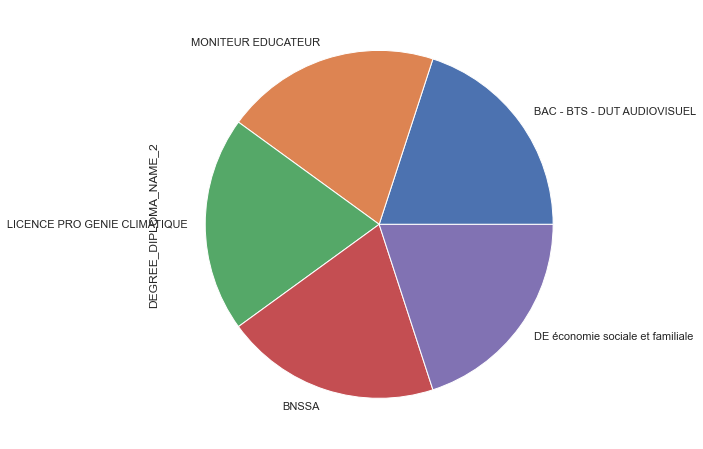


Colonne : DEGREE_DIPLOMA_NAME_1


nb_DEGREE_DIPLOMA_NAME_1  \
BP coiffure                                                 3   
Diplôme d'Etat d'Infirmier                                  3   
Infirmier Diplômé d'Etat                                    2   
BTS/DUT GENIE CLIMATIQUE                                    2   
CERTIFICAT D ASSISTANT DENTAIRE                             2   
CQP Agent Prévention Sécutité                               2   
Frigoriste                                                  1   
DE Educateur ou AS                                          1   
Bac Pro cuisine                                             1   
BTS SP3S                                                    1   
formation en lien avec le batiment                          1   
DEES                                                        1   
DEAES (ex. DEAVS ou AMP)                                    1   
élec/électrotech, automatisme, aéro                         1   
CAP Esthétique demandé                                      1   
Psychologue                                                 1   
BTS / DUT en ELECTROTECHNIQUE                               1   
Développeur d'Applications mobiles                          1   
Ingénieur ou Ecole de Commerce                              1   
diététique                                                  1   
TISF / BTS ESF / Moniteur éducateur                         1   
ingénieur génie électrique                                  1   
Titre de secrétaire médical                                 1   
BTS / DUT en GENIE CLIMATIQUE                               1   
Bejeps                                                      1   
DE educateur spécialisé                                     1   
DE AS OU AES OU AMP                                         1   
Diplôme d'Etat Masseur-kinésithérap                         1   
EDUCATEUR SPECIALISE                                        1   
BTS comptabilité                                            1   
BAFA                                                        1   
conformité d'une école de commerce                          1   
TAI ou TSSR ou SIO ou autodidacte                           1   
BTS / DUT ELECTROTECHNIQUE                                  1   
Diplome d'état  assistante sociale                          1   
BAC + 5 en ELECTRICITE                                      1   

                                     pct_DEGREE_DIPLOMA_NAME_1  
BP coiffure                                           6.818182  
Diplôme d'Etat d'Infirmier                            6.818182  
Infirmier Diplômé d'Etat                              4.545455  
BTS/DUT GENIE CLIMATIQUE                              4.545455  
CERTIFICAT D ASSISTANT DENTAIRE                       4.545455  
CQP Agent Prévention Sécutité                         4.545455  
Frigoriste                                            2.272727  
DE Educateur ou AS                                    2.272727  
Bac Pro cuisine                                       2.272727  
BTS SP3S                                              2.272727  
formation en lien avec le batiment                    2.272727  
DEES                                                  2.272727  
DEAES (ex. DEAVS ou AMP)                              2.272727  
élec/électrotech, automatisme, aéro                   2.272727  
CAP Esthétique demandé                                2.272727  
Psychologue                                           2.272727  
BTS / DUT en ELECTROTECHNIQUE                         2.272727  
Développeur d'Applications mobiles                    2.272727  
Ingénieur ou Ecole de Commerce                        2.272727  
diététique                                            2.272727  
TISF / BTS ESF / Moniteur éducateur                   2.272727  
ingénieur génie électrique                            2.272727  
Titre de secrétaire médical                           2.272727  
BTS / DUT en GENIE CLIMATIQUE                         2.272727  
Bejeps

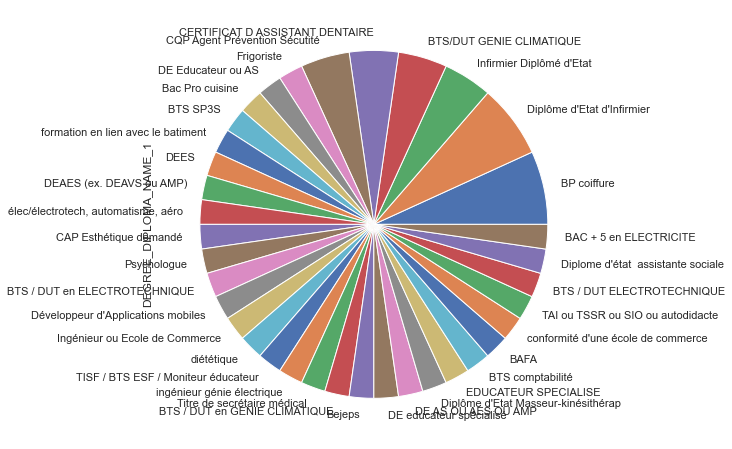


Colonne : QUALIFICATION_NAME


nb_QUALIFICATION_NAME  pct_QUALIFICATION_NAME
Employé qualifié                                151                    30.2
Employé non qualifié                             83                    16.6
Technicien                                       77                    15.4
Cadre                                            70                    14.0
Agent de maîtrise                                29                     5.8
Manoeuvre                                        27                     5.4
Ouvrier qualifié (P1,P2)                         23                     4.6
Ouvrier spécialisé                               21                     4.2
Ouvrier qualifié (P3,P4,OHQ)                     19                     3.8

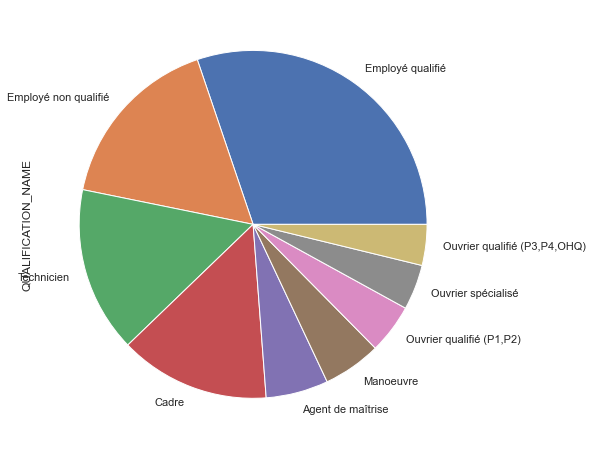


Colonne : DEGREE_SUBJECT_AREA_NAME_1


nb_DEGREE_SUBJECT_AREA_NAME_1  \
Pas de domaine                                                  23   
Santé secteur sanitaire                                         10   
Action sociale                                                   6   
Electrotechnique                                                 6   
Génie climatique                                                 6   
Coiffure                                                         4   
Comptabilité                                                     4   
Travail social                                                   3   
Hôtellerie restauration                                          3   
Commerce                                                         3   
Bâtiment second oeuvre                                           3   
Cuisine                                                          2   
Banque assurance                                                 2   
Informatique                                                     2   
Ergothérapie                                                     2   
Secrétariat assistanat                                           2   
Travaux paysagers                                                2   
Ressources humaines                                              2   
Esthétique soin corporel                                         2   
Défense prévention sécurité                                      2   
Langage informatique                                             2   
Energie                                                          2   
Comptabilité charges personnel                                   1   
Droit fiscal                                                     1   
Psychologie                                                      1   
Installation électrique                                          1   
Transport                                                        1   
Tourisme                                                         1   
Immobilier                                                       1   
Electronique                                                     1   
Vente distribution                                               1   
Animation socioculturelle                                        1   
Secrétariat assistanat direction                                 1   
Petite enfance                                                   1   
Maintenance installation électrique                              1   
Audiovisuel multimédia                                           1   
Educateur spécialisé                                             1   
Auxiliaire vie sociale                                           1   

                                     pct_DEGREE_SUBJECT_AREA_NAME_1  
Pas de domaine                                            21.100917  
Santé secteur sanitaire                                    9.174312  
Action sociale                                             5.504587  
Electrotechnique                                           5.504587  
Génie climatique                                           5.504587  
Coiffure                                                   3.669725  
Comptabilité                                               3.669725  
Travail social                                             2.752294  
Hôtellerie restauration                                    2.752294  
Commerce                                                   2.752294  
Bâtiment second oeuvre                                     2.752294  
Cuisine                                                    1.834862  
Banque assurance                                           1.834862  
Informatique                                               1.834862  
Ergothérapie                                               1.834862  
Secrétariat assistanat                                     1.834862  
Travaux paysagers                                          1.834862  
Ressources humaines                           

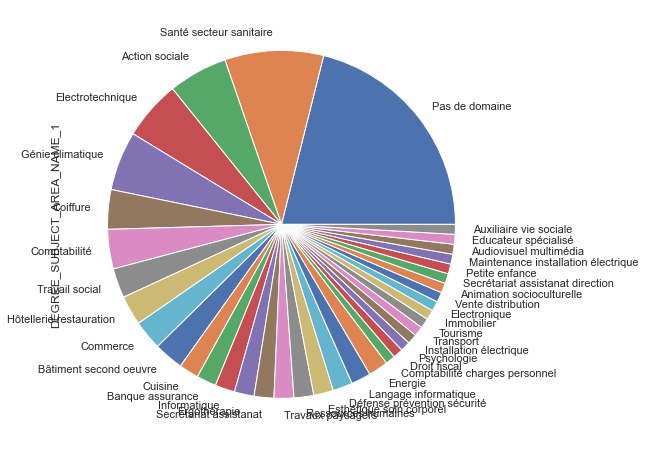


Colonne : DEGREE_SUBJECT_AREA_NAME_2


nb_DEGREE_SUBJECT_AREA_NAME_2  \
Pas de domaine                                          5   
Génie climatique                                        2   
Gestion commerciale                                     1   
Audiovisuel multimédia                                  1   
Montage câblage électrique                              1   
Plomberie                                               1   
Educateur jeune enfant                                  1   
Ressources humaines                                     1   
Commerce                                                1   
Electronique                                            1   

                            pct_DEGREE_SUBJECT_AREA_NAME_2  
Pas de domaine                                   33.333333  
Génie climatique                                 13.333333  
Gestion commerciale                               6.666667  
Audiovisuel multimédia                            6.666667  
Montage câblage électrique                        6.666667  
Plomberie                                         6.666667  
Educateur jeune enfant                            6.666667  
Ressources humaines                               6.666667  
Commerce                                          6.666667  
Electronique                                      6.666667

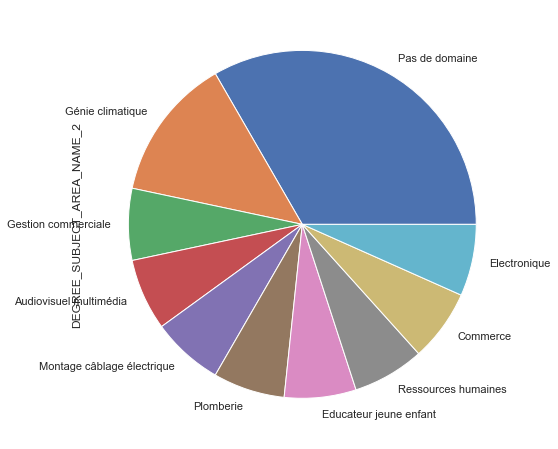


Colonne : TRAVEL_TYPE_NAME


nb_TRAVEL_TYPE_NAME  pct_TRAVEL_TYPE_NAME
Envoyer votre CV par mail                  432             96.644295
Téléphoner                                  12              2.684564
Envoyer votre CV                             3              0.671141

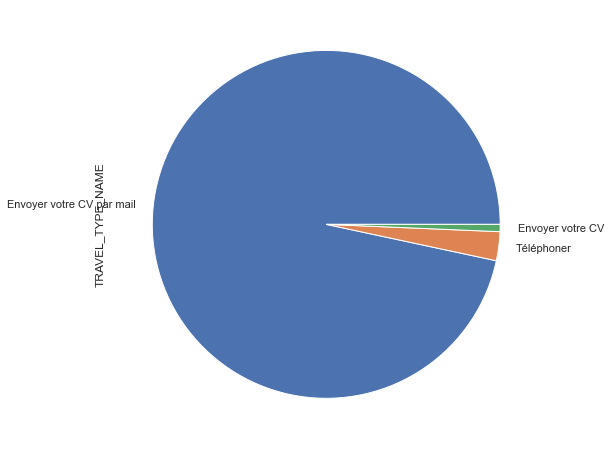


Colonne : DRIVING_LIC_REQ_NAME_1


nb_DRIVING_LIC_REQ_NAME_1  pct_DRIVING_LIC_REQ_NAME_1
exigé                            46                   58.227848
souhaité                         33                   41.772152

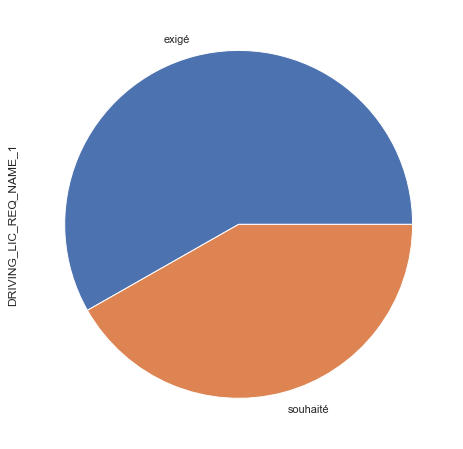


Colonne : WORKING_HOURS_TYPE_CODE


nb_WORKING_HOURS_TYPE_CODE  pct_WORKING_HOURS_TYPE_CODE
NOR                         493                         98.6
VAR                           4                          0.8
TLS                           2                          0.4
TSD                           1                          0.2

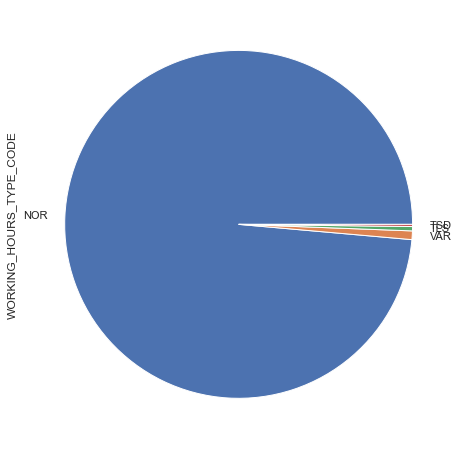


Colonne : ROME_LIST_SKILL_CODE


nb_ROME_LIST_SKILL_CODE  \
104167                                                          11   
102096                                                           9   
121418                                                           6   
100906                                                           6   
100038                                                           5   
...                                                            ...   
101343;118385                                                    1   
102226;115734;118975;120299;126093;140955                        1   
100286;100596                                                    1   
102096;103885;104167;107374;107939                               1   
100341;104171;104172                                             1   

                                           pct_ROME_LIST_SKILL_CODE  
104167                                                     6.111111  
102096                                                     5.000000  
121418                                                     3.333333  
100906                                                     3.333333  
100038                                                     2.777778  
...                                                             ...  
101343;118385                                              0.555556  
102226;115734;118975;120299;126093;140955                  0.555556  
100286;100596                                              0.555556  
102096;103885;104167;107374;107939                         0.555556  
100341;104171;104172                                       0.555556  

[108 rows x 2 columns]

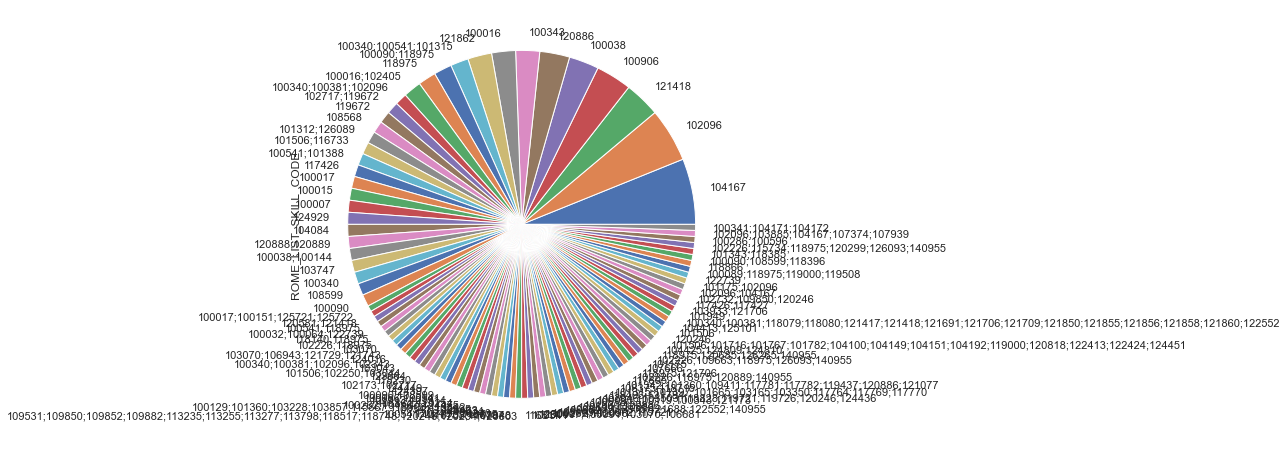


Colonne : REGION_NAME


nb_REGION_NAME  pct_REGION_NAME
Pays de la Loire             500            100.0

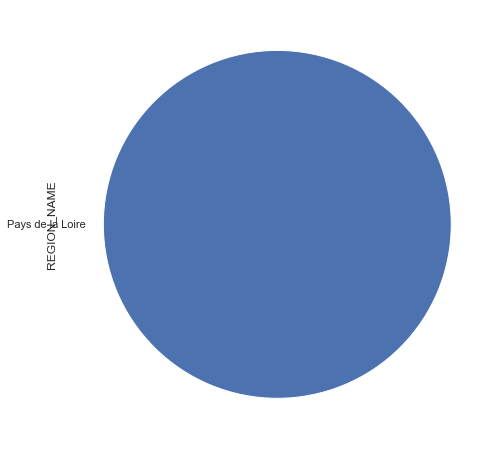


Colonne : SUB_CONTINENT_NAME


nb_SUB_CONTINENT_NAME  pct_SUB_CONTINENT_NAME
N                    499                    99.8
O                      1                     0.2

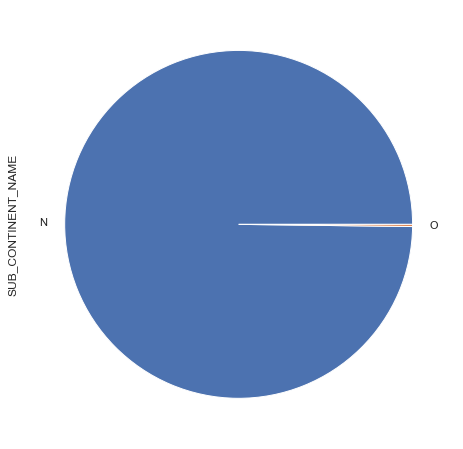


Colonne : DEGREE_TYPE_CODE_2


nb_DEGREE_TYPE_CODE_2  pct_DEGREE_TYPE_CODE_2
NV3                      4               26.666667
NV1                      3               20.000000
NV2                      3               20.000000
NV4                      2               13.333333
NV5                      2               13.333333
AFS                      1                6.666667

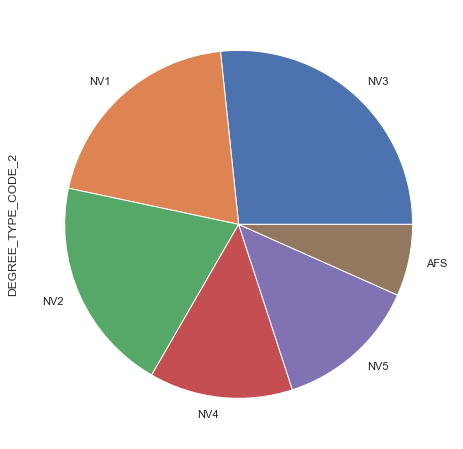


Colonne : DEGREE_TYPE_CODE_1


nb_DEGREE_TYPE_CODE_1  pct_DEGREE_TYPE_CODE_1
NV3                     38               34.862385
NV4                     23               21.100917
NV5                     20               18.348624
NV2                     16               14.678899
NV1                     11               10.091743
AFS                      1                0.917431

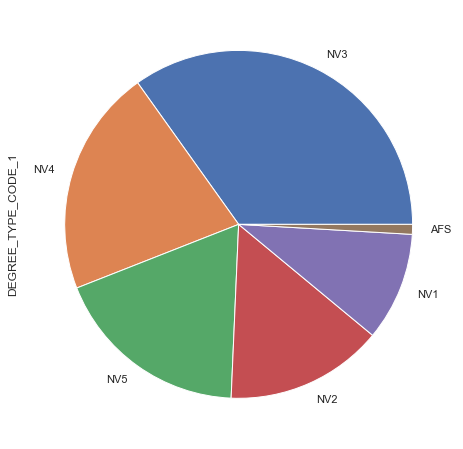


Colonne : COUNTRY_NAME


nb_COUNTRY_NAME  pct_COUNTRY_NAME
FRANCE              500             100.0

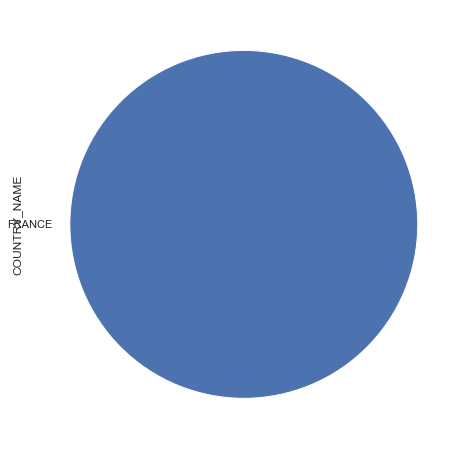


Colonne : WORKING_CONDITION_NAME


nb_WORKING_CONDITION_NAME  pct_WORKING_CONDITION_NAME
Autre                        500                       100.0

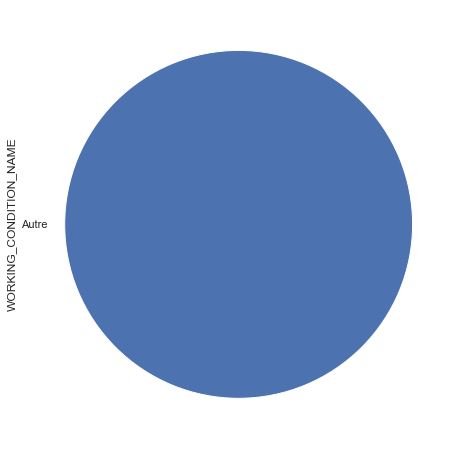


Colonne : QUALIFICATION_CODE


nb_QUALIFICATION_CODE  pct_QUALIFICATION_CODE
6                    151                    30.2
5                     83                    16.6
7                     77                    15.4
9                     70                    14.0
8                     29                     5.8
1                     27                     5.4
3                     23                     4.6
2                     21                     4.2
4                     19                     3.8

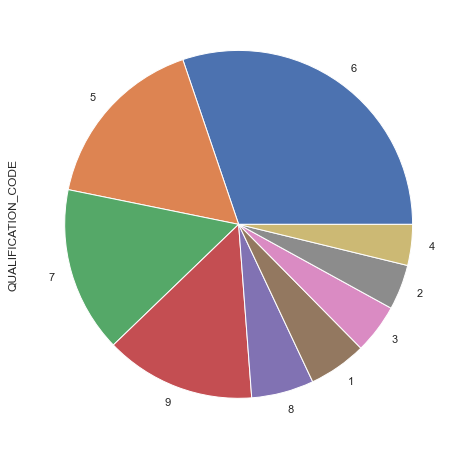


Colonne : LANG_PROFICIENCY_NAME_2


nb_LANG_PROFICIENCY_NAME_2  pct_LANG_PROFICIENCY_NAME_2
Courant                           1                         50.0
Bon                               1                         50.0

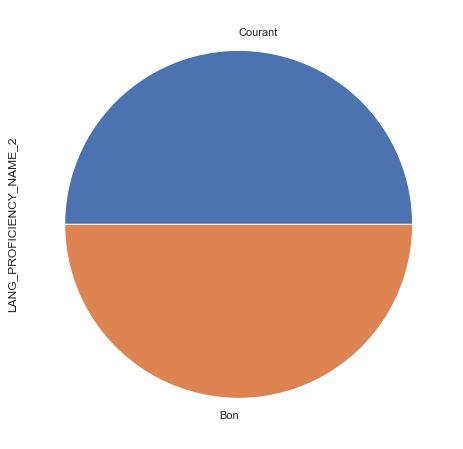


Colonne : LANG_PROFICIENCY_NAME_1


nb_LANG_PROFICIENCY_NAME_1  pct_LANG_PROFICIENCY_NAME_1
Bon                                9                         45.0
Très bon                           6                         30.0
Courant                            4                         20.0
Notions                            1                          5.0

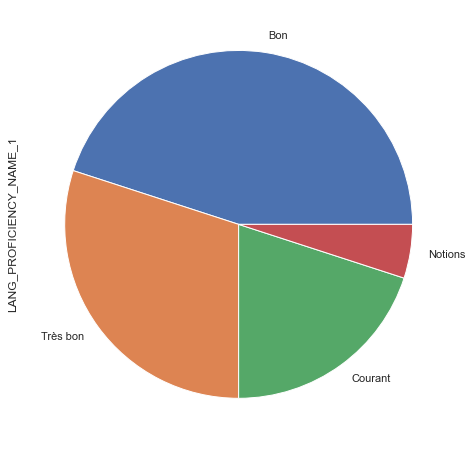


Colonne : EXP_DURATION_TYPE_CODE


nb_EXP_DURATION_TYPE_CODE  pct_EXP_DURATION_TYPE_CODE
AN                        284                   92.207792
MO                         24                    7.792208

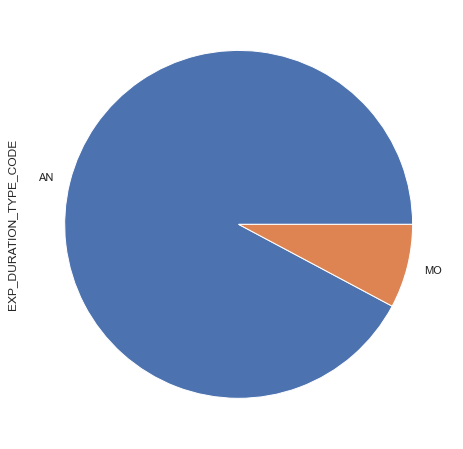


Colonne : DEPARTEMENT_NAME


nb_DEPARTEMENT_NAME  pct_DEPARTEMENT_NAME
LOIRE-ATLANTIQUE                  500                 100.0

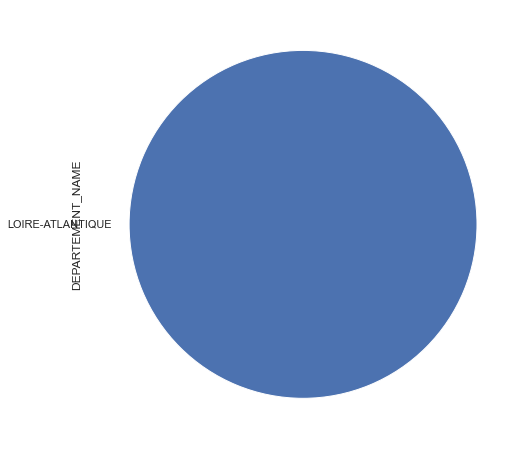


Colonne : REGION_CODE


nb_REGION_CODE  pct_REGION_CODE
52             500            100.0

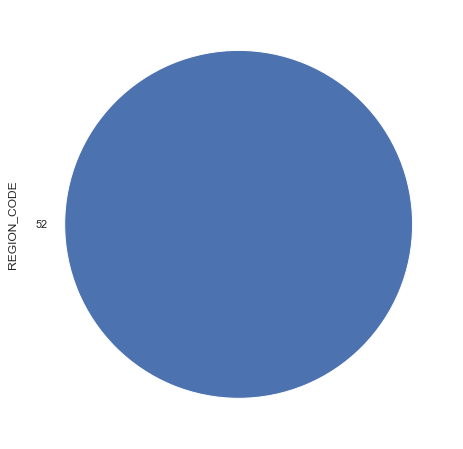


Colonne : LANG_REQUIRED_CODE_1


nb_LANG_REQUIRED_CODE_1  pct_LANG_REQUIRED_CODE_1
S                       11                      55.0
E                        9                      45.0

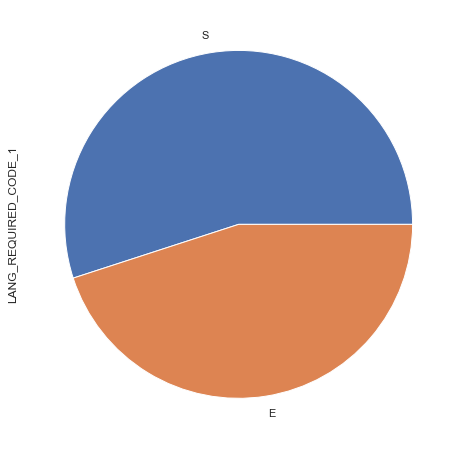


Colonne : LANG_REQUIRED_CODE_2


nb_LANG_REQUIRED_CODE_2  pct_LANG_REQUIRED_CODE_2
S                        1                      50.0
E                        1                      50.0

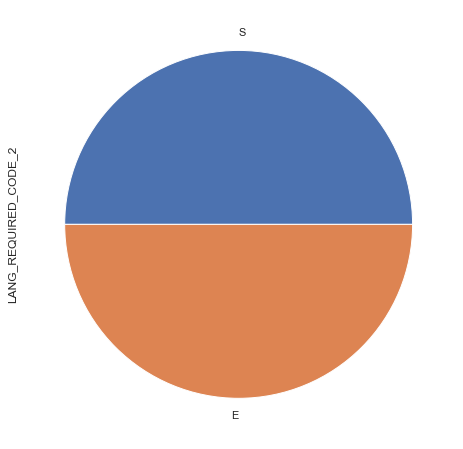


Colonne : LANG_PROFICIENCY_CODE_1


nb_LANG_PROFICIENCY_CODE_1  pct_LANG_PROFICIENCY_CODE_1
3                           9                         45.0
2                           6                         30.0
1                           4                         20.0
5                           1                          5.0

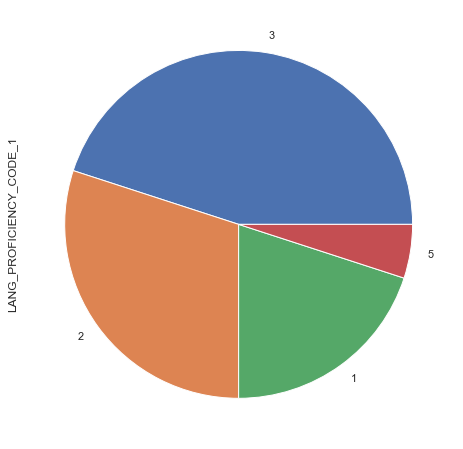


Colonne : LANG_PROFICIENCY_CODE_2


nb_LANG_PROFICIENCY_CODE_2  pct_LANG_PROFICIENCY_CODE_2
1                           1                         50.0
3                           1                         50.0

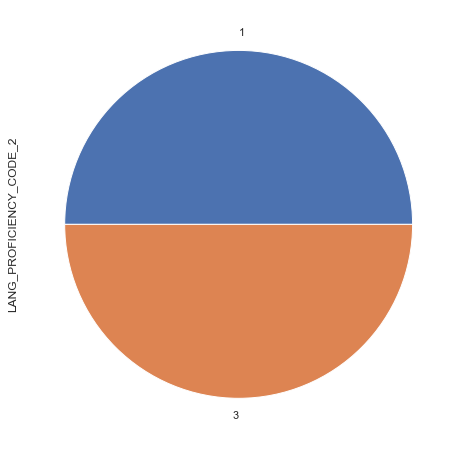


Colonne : CONTRACT_DUR_UNIT_CODE


nb_CONTRACT_DUR_UNIT_CODE  pct_CONTRACT_DUR_UNIT_CODE
MO                        152                   93.251534
JO                         11                    6.748466

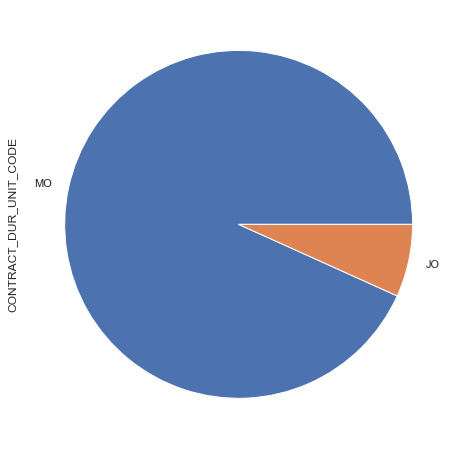


Colonne : ROME_LIST_ACTIVITY_CODE


nb_ROME_LIST_ACTIVITY_CODE  \
117146;117520;117521;119109;126360                          11   
107661;107662;107920;107923                                 11   
109846;117309;118637;121055;124517                          10   
108689;122706;124543;126141                                 10   
104376;113547;118637;118639;122764                           8   
...                                                        ...   
119320;119324;122252                                         1   
103686;122155;122156;125386;125977                           1   
113547;119880;120325;123182                                  1   
105730;123271;123272;123273;123621                           1   
119320;119324;122252;124607                                  1   

                                    pct_ROME_LIST_ACTIVITY_CODE  
117146;117520;117521;119109;126360                     2.370690  
107661;107662;107920;107923                            2.370690  
109846;117309;118637;121055;124517                     2.155172  
108689;122706;124543;126141                            2.155172  
104376;113547;118637;118639;122764                     1.724138  
...                                                         ...  
119320;119324;122252                                   0.215517  
103686;122155;122156;125386;125977                     0.215517  
113547;119880;120325;123182                            0.215517  
105730;123271;123272;123273;123621                     0.215517  
119320;119324;122252;124607                            0.215517  

[271 rows x 2 columns]

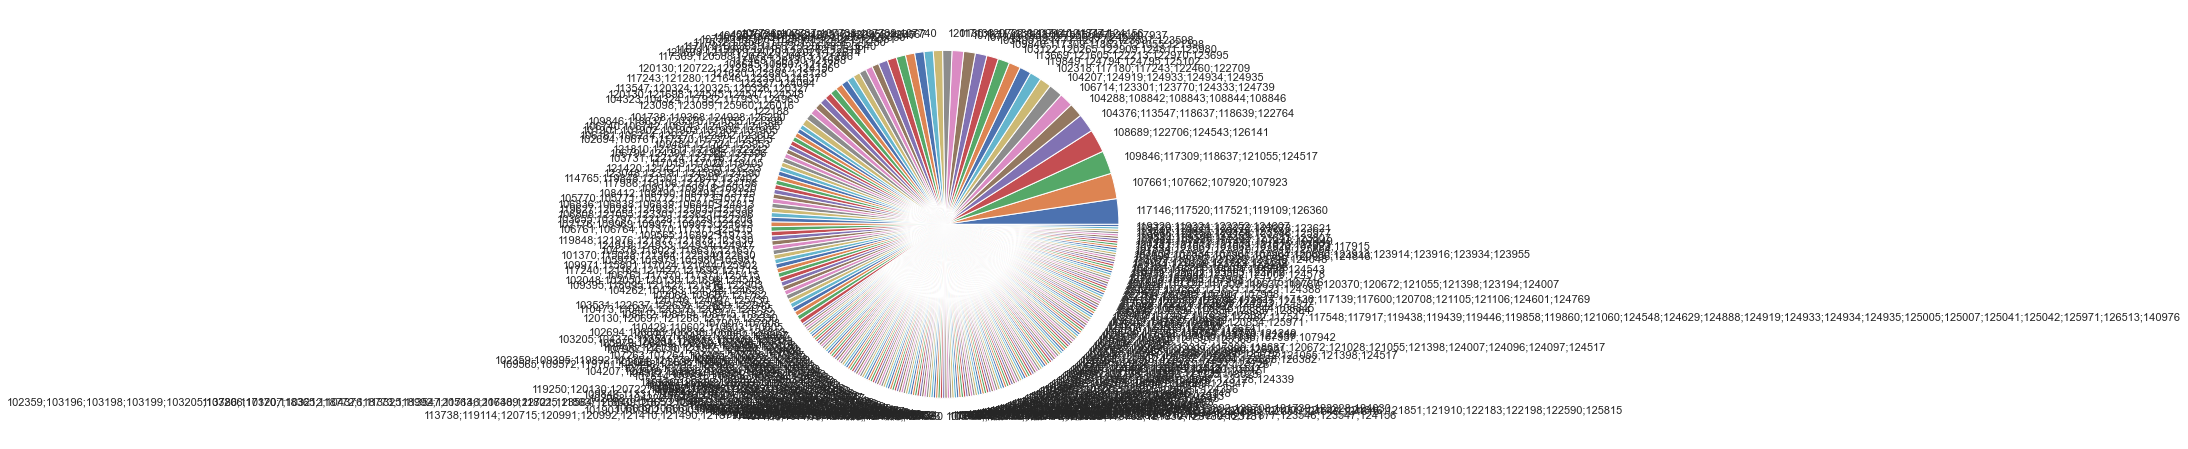


Colonne : CONTINENT_CODE


nb_CONTINENT_CODE  pct_CONTINENT_CODE
21600                    33                 6.6
19073.6                  26                 5.2
24000                    24                 4.8
30000                    17                 3.4
22800                    15                 3.0
...                     ...                 ...
23400                     1                 0.2
7596                      1                 0.2
39520                     1                 0.2
9840                      1                 0.2
19181.64                  1                 0.2

[169 rows x 2 columns]

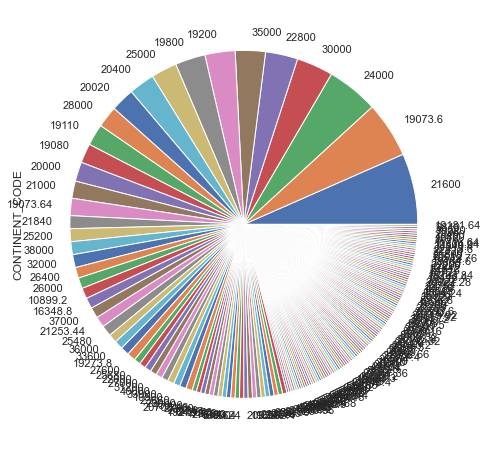


Colonne : SALARY_UNIT_CODE


nb_SALARY_UNIT_CODE  pct_SALARY_UNIT_CODE
EU                  500                 100.0

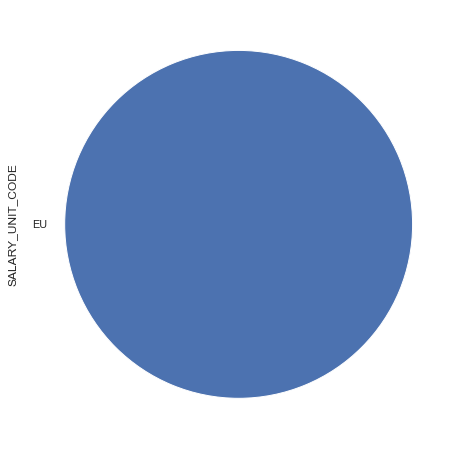


Colonne : SALARY_SUPPLEMENT_CODE_1


nb_SALARY_SUPPLEMENT_CODE_1  pct_SALARY_SUPPLEMENT_CODE_1
1                            23                     33.823529
6                            17                     25.000000
7                            10                     14.705882
2                            10                     14.705882
0                             3                      4.411765
3                             2                      2.941176
5                             1                      1.470588
9                             1                      1.470588
10                            1                      1.470588

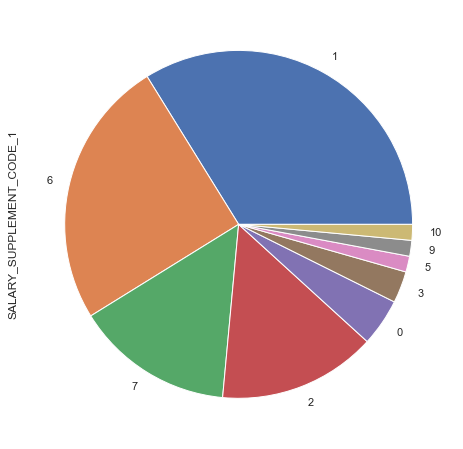


Colonne : EM_INTERVIEW_MODALITY_CODE


nb_EM_INTERVIEW_MODALITY_CODE  \
En appui                                                         472   
En accompagnement sans prÃ©sÃ©lection                             25   
En accompagnement avec prÃ©sÃ©lection                              3   

                                       pct_EM_INTERVIEW_MODALITY_CODE  
En appui                                                         94.4  
En accompagnement sans prÃ©sÃ©lection                             5.0  
En accompagnement avec prÃ©sÃ©lection                             0.6

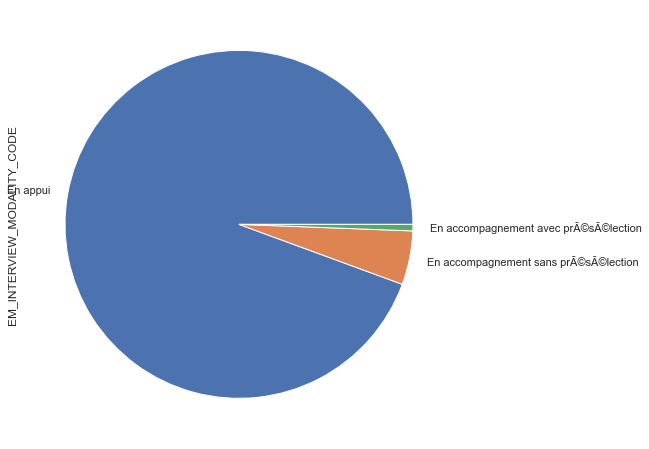


Colonne : SALARY_SUPPLEMENT_CODE_2


nb_SALARY_SUPPLEMENT_CODE_2  pct_SALARY_SUPPLEMENT_CODE_2
7                            16                     43.243243
6                             6                     16.216216
10                            5                     13.513514
2                             4                     10.810811
9                             2                      5.405405
3                             2                      5.405405
8                             1                      2.702703
4                             1                      2.702703

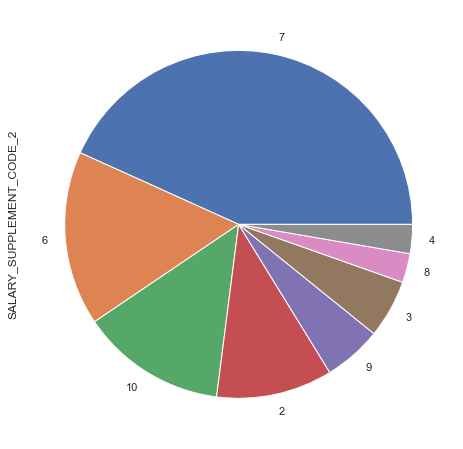


Colonne : DEGREE_REQUIRED_NAME_1


nb_DEGREE_REQUIRED_NAME_1  pct_DEGREE_REQUIRED_NAME_1
exigé                            56                   51.376147
souhaité                         53                   48.623853

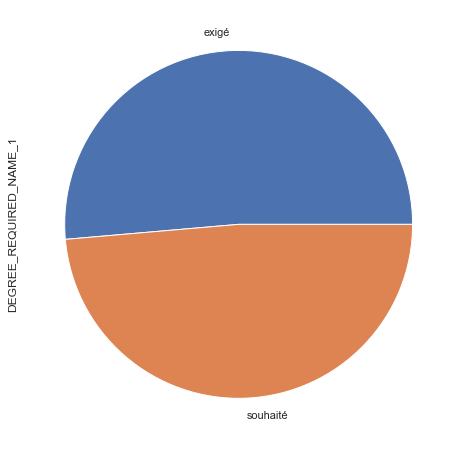


Colonne : DEGREE_REQUIRED_NAME_2


nb_DEGREE_REQUIRED_NAME_2  pct_DEGREE_REQUIRED_NAME_2
souhaité                          8                   53.333333
exigé                             7                   46.666667

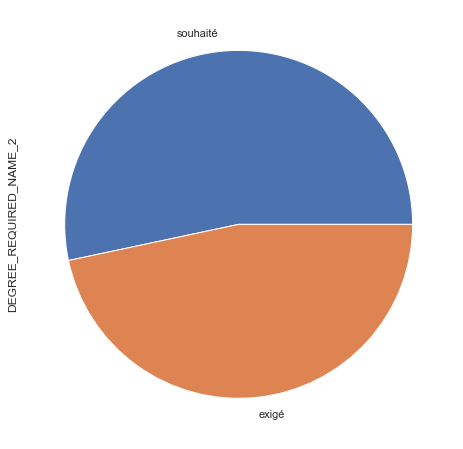


Colonne : DEGREE_SUBJECT_AREA_CODE_2


nb_DEGREE_SUBJECT_AREA_CODE_2  pct_DEGREE_SUBJECT_AREA_CODE_2
0                                  5                       33.333333
22654                              2                       13.333333
33054                              1                        6.666667
34054                              1                        6.666667
34554                              1                        6.666667
22677                              1                        6.666667
24016                              1                        6.666667
46254                              1                        6.666667
44050                              1                        6.666667
24354                              1                        6.666667

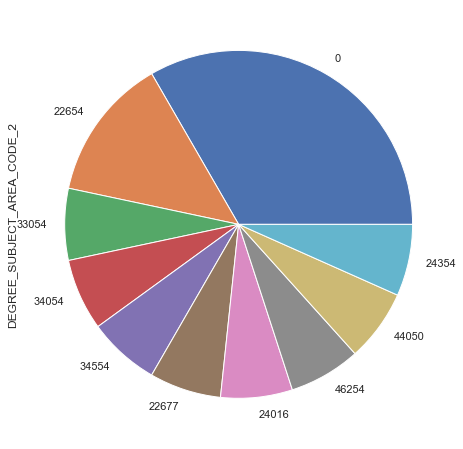


Colonne : DEGREE_SUBJECT_AREA_CODE_1


nb_DEGREE_SUBJECT_AREA_CODE_1  pct_DEGREE_SUBJECT_AREA_CODE_1
0                                 23                       21.100917
43454                             10                        9.174312
22654                              6                        5.504587
44054                              6                        5.504587
24054                              6                        5.504587
42050                              4                        3.669725
32663                              4                        3.669725
42754                              3                        2.752294
44072                              3                        2.752294
34554                              3                        2.752294
22454                              3                        2.752294
35054                              2                        1.834862
41054                              2                        1.834862
31054                              2                        1.834862
42752                              2                        1.834862
42854                              2                        1.834862
43491                              2                        1.834862
21046                              2                        1.834862
33054                              2                        1.834862
42032                              2                        1.834862
30854                              2                        1.834862
24154                              2                        1.834862
13354                              1                        0.917431
31854                              1                        0.917431
44041                              1                        0.917431
24066                              1                        0.917431
24354                              1                        0.917431
42654                              1                        0.917431
44028                              1                        0.917431
42154                              1                        0.917431
44067                              1                        0.917431
14454                              1                        0.917431
32688                              1                        0.917431
34566                              1                        0.917431
46254                              1                        0.917431
24069                              1                        0.917431
35047                              1                        0.917431
44092                              1                        0.917431

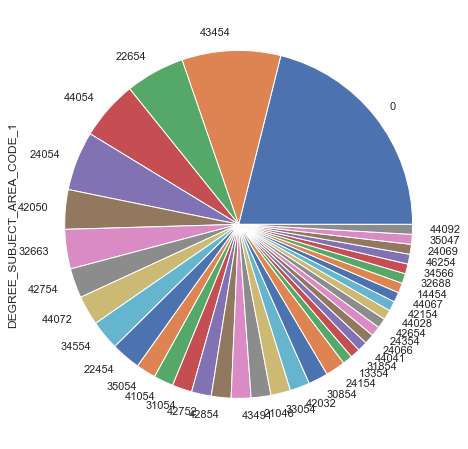


Colonne : TRAVEL_FREQUENCY_CODE


nb_TRAVEL_FREQUENCY_CODE  pct_TRAVEL_FREQUENCY_CODE
2                        18                  47.368421
1                        17                  44.736842
3                         2                   5.263158
0                         1                   2.631579

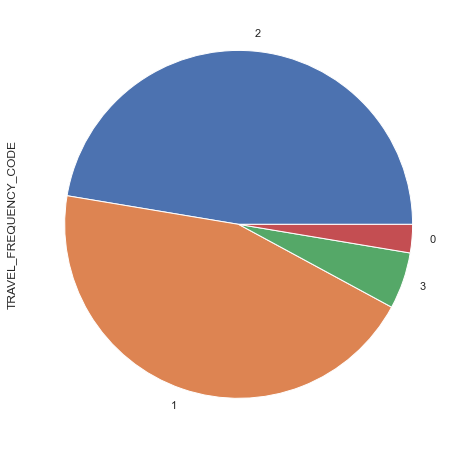


Colonne : DRIVING_LIC_REQ_CODE_1


nb_DRIVING_LIC_REQ_CODE_1  pct_DRIVING_LIC_REQ_CODE_1
E                         46                   58.227848
S                         33                   41.772152

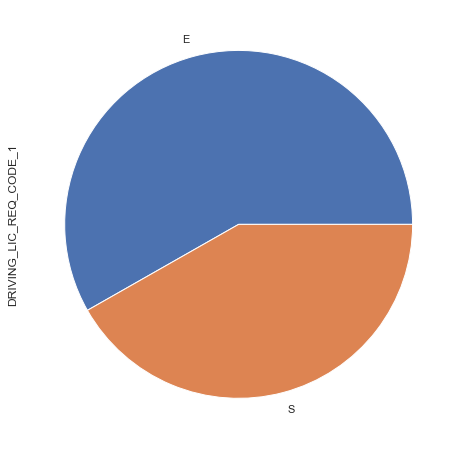


Colonne : MODIFICATION_DATE


nb_MODIFICATION_DATE  pct_MODIFICATION_DATE
15/11/21                    74                   14.8
16/11/21                    58                   11.6
03/11/21                    39                    7.8
04/11/21                    39                    7.8
09/11/21                    36                    7.2
05/11/21                    34                    6.8
08/11/21                    34                    6.8
10/11/21                    31                    6.2
25/10/21                    23                    4.6
28/10/21                    21                    4.2
26/10/21                    18                    3.6
12/11/21                    16                    3.2
22/10/21                    13                    2.6
02/11/21                    12                    2.4
27/10/21                    11                    2.2
29/10/21                    11                    2.2
21/10/21                     7                    1.4
20/10/21                     5                    1.0
06/11/21                     4                    0.8
18/10/21                     4                    0.8
19/10/21                     4                    0.8
13/11/21                     3                    0.6
23/10/21                     1                    0.2
14/11/21                     1                    0.2
11/11/21                     1                    0.2

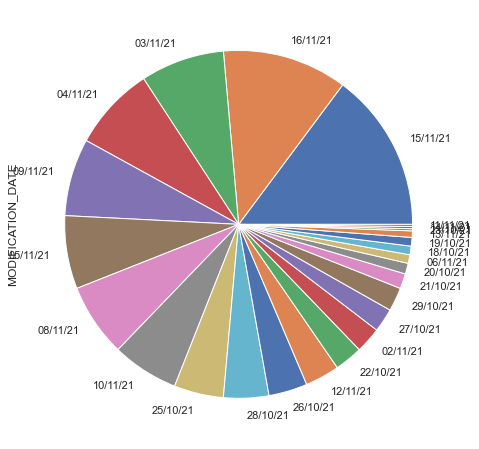


Colonne : STATUS_NAME


nb_STATUS_NAME  pct_STATUS_NAME
Publiée             500            100.0

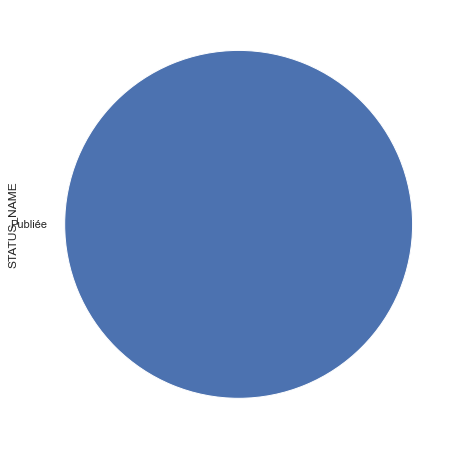


Colonne : WORKING_CONDITION_CODE


nb_WORKING_CONDITION_CODE  pct_WORKING_CONDITION_CODE
AUT                        500                       100.0

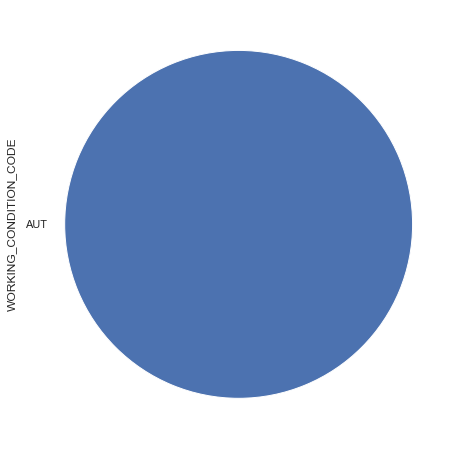


Colonne : top_max_salary_up_to_2k


nb_top_max_salary_up_to_2k  pct_top_max_salary_up_to_2k
0                         290                         58.0
1                         210                         42.0

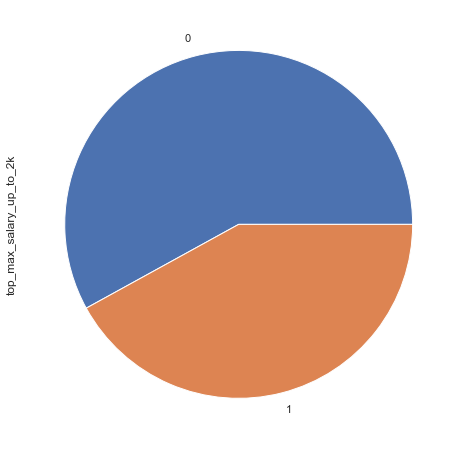

In [75]:
for col in df.select_dtypes('object'):
    plt.figure()
    print(f'\nColonne : {col}')
    df[col].value_counts().plot.pie()
    display(pd.concat([pd.DataFrame(df[col].value_counts().rename(f"nb_{col}")),
                           pd.DataFrame((df[col].value_counts(normalize=True)*100).rename(f"pct_{col}"))],
                          axis=1))
    plt.show()

c:\users\clem0\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\clem0\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\clem0\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

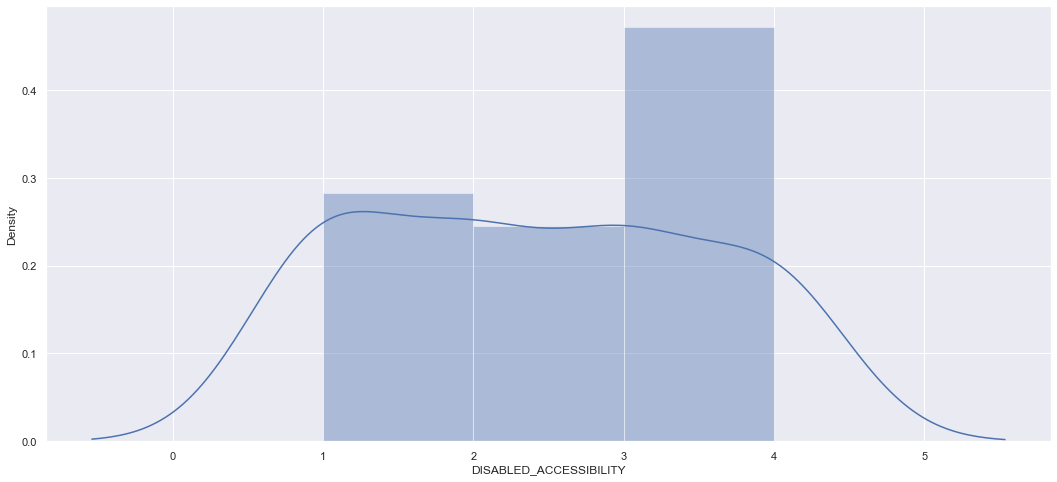

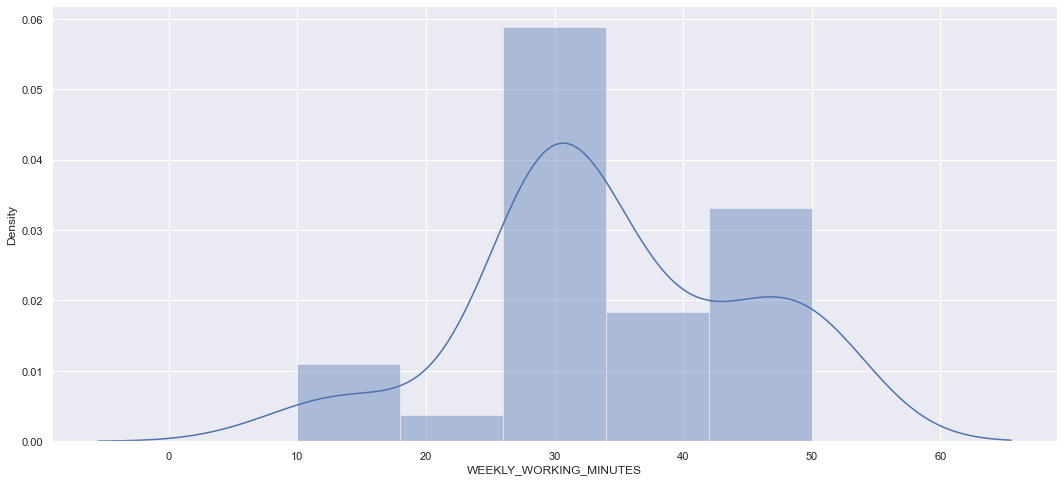

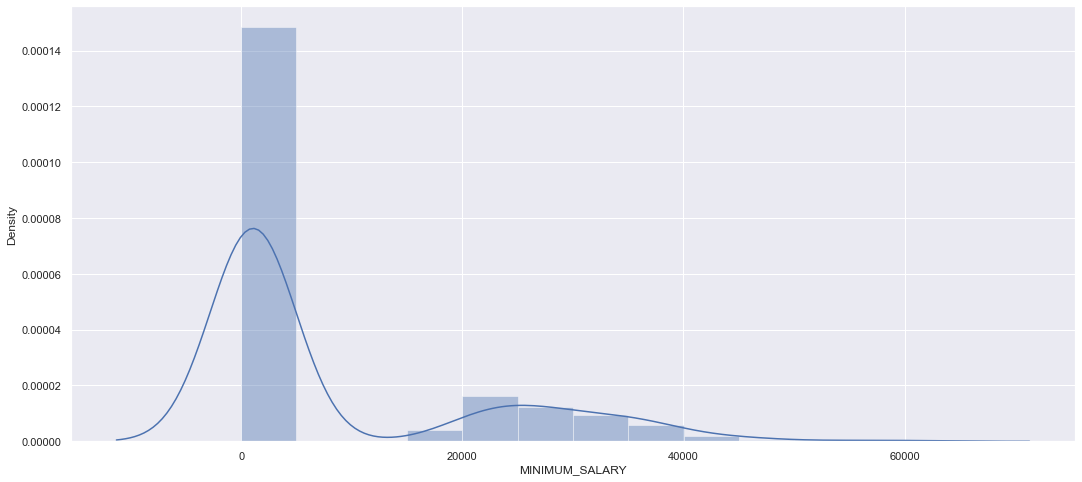

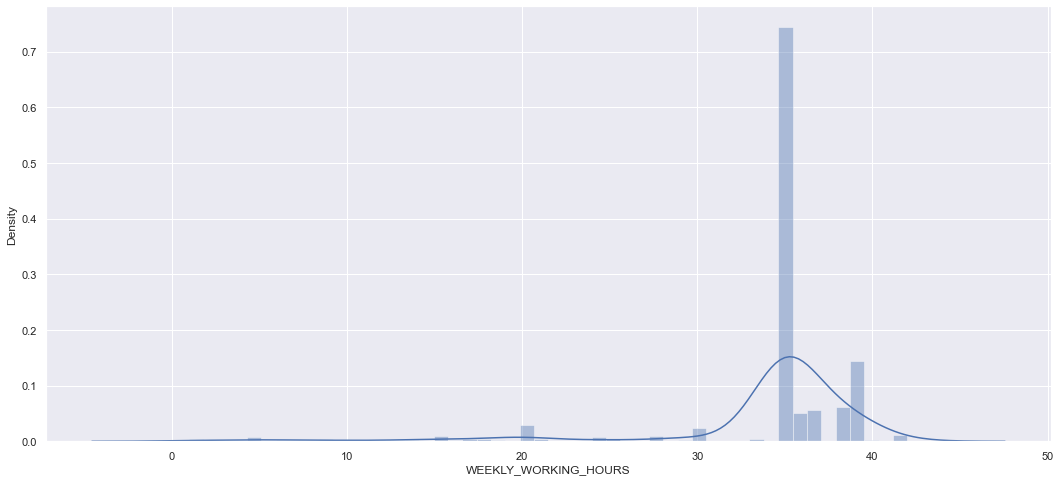

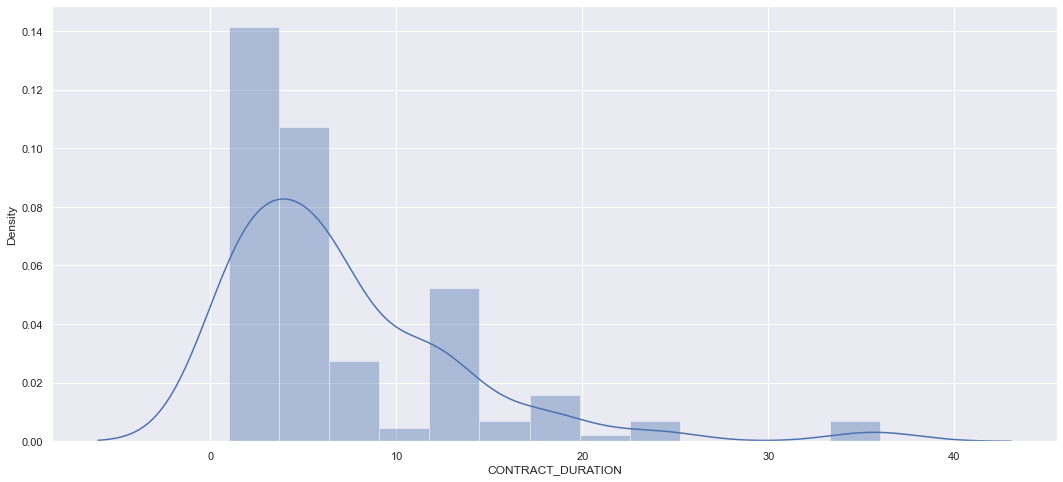

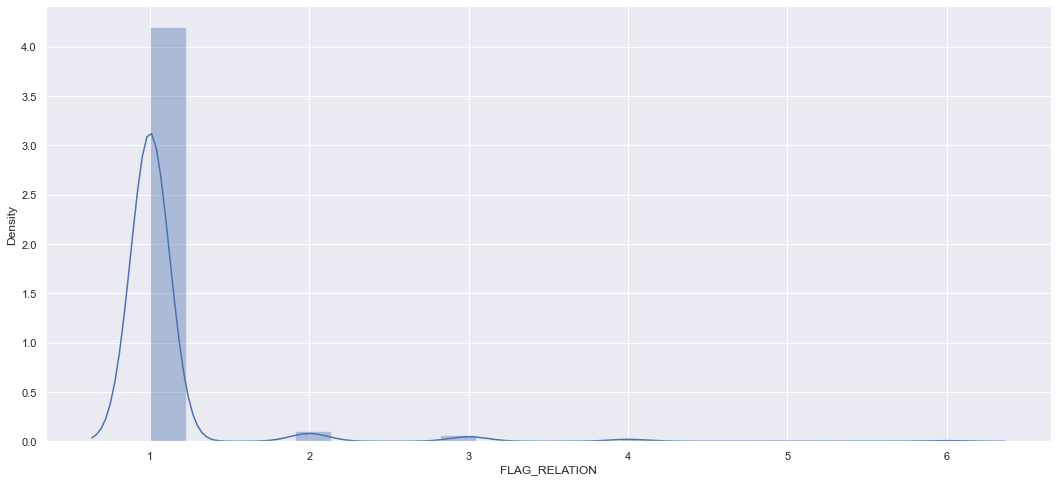

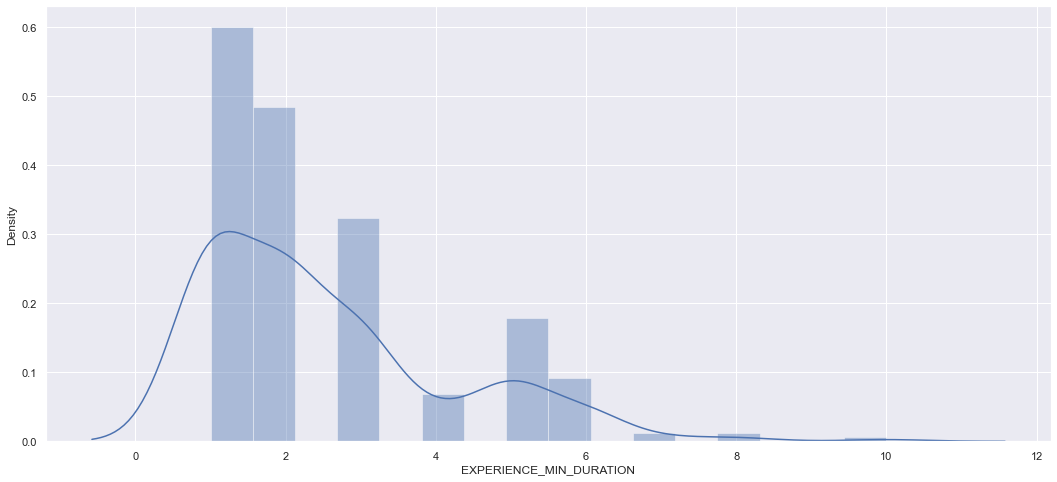

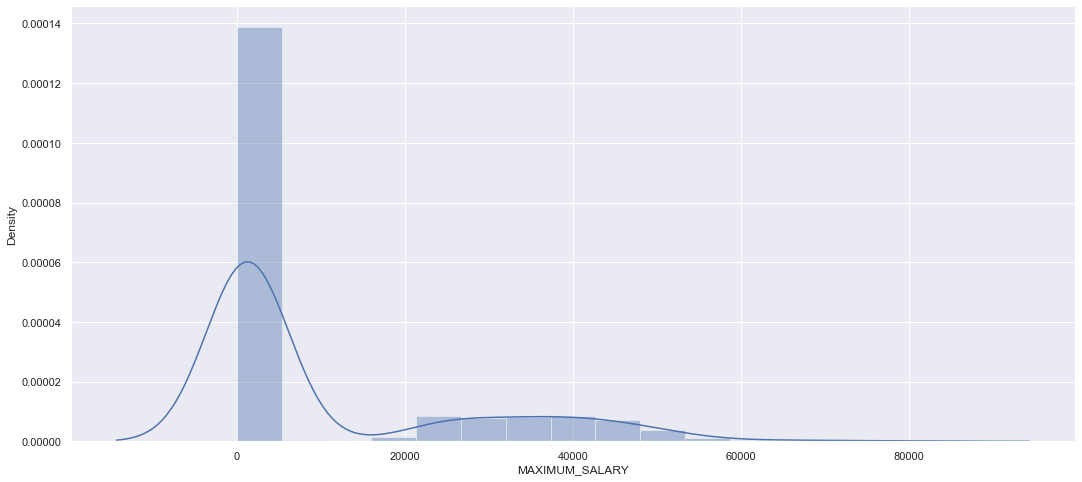

In [78]:
for col in df.dropna(axis=1, how='all').select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

#  Construction VAE


Variables relatives au salaire : 

SALARY_COMMENT
SALARY_TYPE_NAME
ANNUAL_MINIMUM_SALARY
SALARY_SUPPLEMENT_NAME_2
SALARY_SUPPLEMENT_NAME_1
MINIMUM_SALARY
ANNUAL_MAXIMUM_SALARY
SALARY_TYPE_CODE
SALARY_UNIT_CODE
SALARY_SUPPLEMENT_CODE_1
MAXIMUM_SALARY
SALARY_SUPPLEMENT_CODE_2
top_max_salary_up_to_2k

Répartition avant modification : 


 count      500.000000
mean     10482.601640
std      16531.563276
min         10.480000
25%         15.310000
50%       2000.000000
75%      21350.250000
max      80000.000000
Name: MAXIMUM_SALARY, dtype: float64 



c:\users\clem0\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\clem0\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\clem0\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarnin

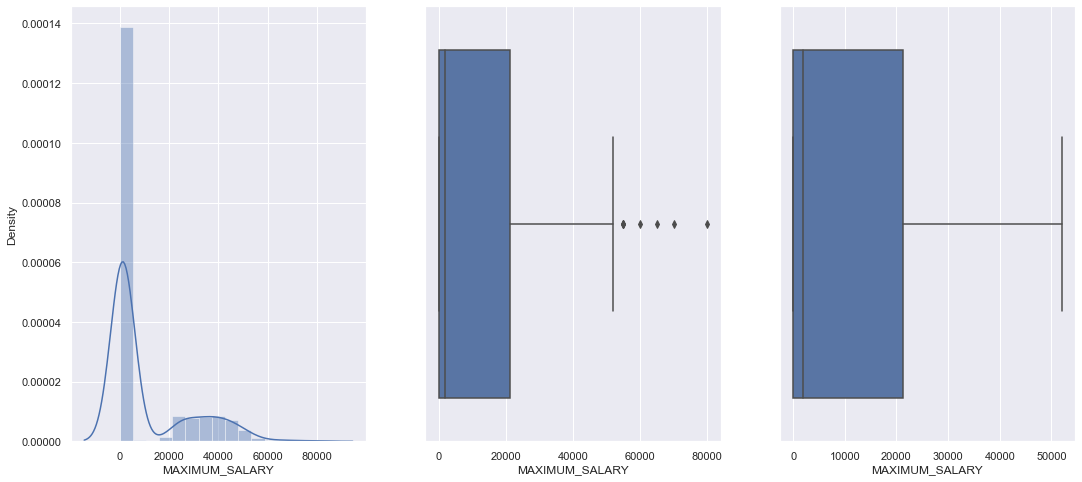

<Figure size 1296x576 with 0 Axes>


Répartition après modification : 


 count     500.000000
mean     2237.819660
std       931.496816
min        96.000000
25%      1686.000000
50%      2083.333333
75%      2583.333333
max      8000.000000
Name: MAXIMUM_SALARY_mens, dtype: float64 



c:\users\clem0\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\clem0\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\clem0\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarnin

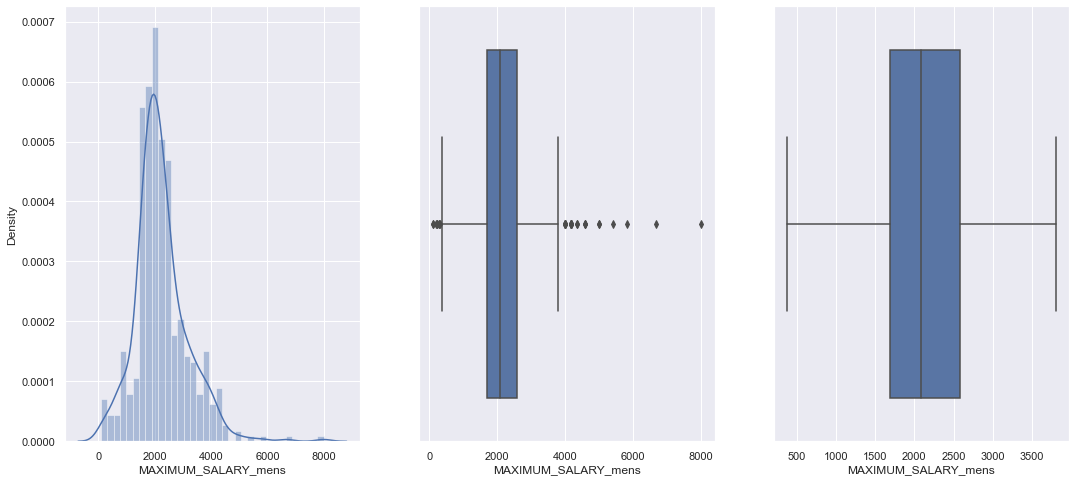

<Figure size 1296x576 with 0 Axes>


Répartition de la VAE créée : 
 0    290
1    210
Name: top_max_salary_up_to_2k, dtype: int64



In [60]:
from sklearn.preprocessing import Binarizer, KBinsDiscretizer
import pandas as pd
import seaborn as sns

print("\nVariables relatives au salaire : \n")
[print(col) for col in df.columns if "salar" in col.lower()]

    
def redress_max_salary_columns(val_max_salary, val_weekly_work_hour):
    if val_max_salary < 100:
        value=val_max_salary * val_weekly_work_hour * 4
    elif val_max_salary > 10000:
        value = val_max_salary/12
    else:
        value=val_max_salary
    return(value)

def compute_vae_salary(df, threshold_salary, graph=False, drop_quanti_var=True):
    if graph==True:
        print("\n\nRépartition avant modification : \n")
        sns.set(rc = {'figure.figsize':(18, 8)})
        for col in df[["MAXIMUM_SALARY"]] : #ANNUAL_MINIMUM_SALARY MAXIMUM_SALARY
            print(f"\n {df[col].describe()} \n")
            fig, ax =plt.subplots(1,3)
            plt.figure()
            sns.distplot(df[col], ax=ax[0])
            sns.boxplot(df[col], ax=ax[1])
            sns.boxplot(df[col], showfliers = False, ax=ax[2])
            plt.show()
            
    df["MAXIMUM_SALARY_mens"] = df[["WEEKLY_WORKING_HOURS", "MAXIMUM_SALARY"]].apply(lambda row : redress_max_salary_columns(row["MAXIMUM_SALARY"], 
                                                                                             row["WEEKLY_WORKING_HOURS"]),
                                                                                     axis = 1)
    df["top_max_salary_up_to_2k"] = Binarizer(threshold=threshold_salary).fit_transform(df[["MAXIMUM_SALARY_mens"]])
    df["top_max_salary_up_to_2k"] = df["top_max_salary_up_to_2k"].astype(int).astype(str)
    
    if graph==True:
        print("\nRépartition après modification : \n")
        sns.set(rc = {'figure.figsize':(18, 8)})
        for col in df[["MAXIMUM_SALARY_mens"]] : #ANNUAL_MINIMUM_SALARY MAXIMUM_SALARY
            print(f"\n {df[col].describe()} \n")
            fig, ax =plt.subplots(1,3)
            plt.figure()
            sns.distplot(df[col], ax=ax[0])
            sns.boxplot(df[col], ax=ax[1])
            sns.boxplot(df[col], showfliers = False, ax=ax[2])
            plt.show()
            
    if drop_quanti_var == True:
        df.drop(["MAXIMUM_SALARY_mens"], axis=1, inplace=True)
        
    print(f"\nRépartition de la VAE créée : \n {df.top_max_salary_up_to_2k.value_counts()}\n")
    return(df)


df = compute_vae_salary(df, threshold_salary = 2200, graph=True, drop_quanti_var=True)

In [45]:
display(df.head(5))
print(df.shape)

DISABLED_ACCESSIBILITY  \
_id                              
225834                     NaN   
225889                     NaN   
225895                     NaN   
225896                     NaN   
225915                     NaN   

                                ROME_PROFESSION_CARD_NAME TRAVEL_TYPE_COMMENT  \
_id                                                                             
225834                              Dessin BTP et paysage                 APP   
225889                  Assistanat en ressources humaines                 APP   
225895  Installation et maintenance en froid, conditio...                 APP   
225896                        Assistance auprès d'enfants                 APP   
225915            Maintenance informatique et bureautique                 APP   

       TRAVEL_FREQUENCY_NAME CITY_NAME LANG_NAME_1 LANG_NAME_2  \
_id                                                              
225834                                                           
225889                                                           
225895                                                           
225896                                                           
225915                                                           

         DEGREE_TYPE_NAME_2 ROME_PROFESSION_CODE DESKTOP_TOOLS_NAME_1  \
_id                                                                     
225834                                     14105                        
225889                                     11329                        
225895                                     10758                        
225896                                     15196                        
225915  Bac+2 ou équivalent                19841                        

       TRAVEL_FREQUENCY_COMMENT SUB_CONTINENT_CODE LANG_CODE_2 COUNTRY_CODE  \
_id                                                                           
225834                                                                   01   
225889                                                                   01   
225895                                                                   01   
225896                                                                   01   
225915                                                                   01   

       LANG_CODE_1 EM_INTERVIEW_MODALITY_NAME EXP_DURATION_TYPE_NAME  \
_id                                                                    
225834                                      0                  An(s)   
225889                                      0                  An(s)   
225895                                      0                          
225896                                      0                          
225915                                      0                  An(s)   

       CONTRACT_NATURE_CODE STATUS_CODE SALARY_COMMENT CREATION_DATE  \
_id                                                                    
225834                   E1          EC                     04/11/21   
225889                   E1          EC                     14/11/21   
225895                   E1          EC                     08/11/21   
225896                   E1          EC                     14/11/21   
225915                   E1          EC                     08/11/21   

       SALARY_TYPE_NAME CONTRACT_TYPE_NAME DESKTOP_TOOLS_CODE_1  \
_id                                                               
225834           Annuel                CDI                        
225889          Mensuel                CDI                        
225895           Annuel            Interim                        
225896          Horaire                CDI                        
225915           Annuel                CDI                        

       DESKTOP_TOOLS_CODE_2 WORKING_LOCATION_TYPE_NAME ACTIVITY_CODE  \
_id                                                                    
225834                                     Une c

(500, 121)


# Split 

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
import seaborn as sns

y = df['top_max_salary_up_to_2k']
X = df.drop('top_max_salary_up_to_2k', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(f"X_train : {str(X_train.shape)}")
print(f"X_test : {str(X_test.shape)}")
print(f"y_train : {str(y_train.shape)}")
print(f"y_test : {str(y_test.shape)}")

X_train : (375, 120)
X_test : (125, 120)
y_train : (375,)
y_test : (125,)


# Pipe Impute et normalisation

In [64]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV

# model = make_pipeline(KNNImputer(), SGDClassifier())
numerical_pipeline = make_pipeline(KNNImputer(), 
                                   RobustScaler())# StandardScaler()
categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), 
                                     OneHotEncoder(handle_unknown='ignore', sparse=False))

# impute_normal_transfo = make_column_transformer((numerical_pipeline, numerical_features),
#                                                 (categorical_pipeline, categorical_features))

impute_normal_ohe_pipeline = Pipeline([
#     ('preprocess_pipeline', preprocess_pipeline), 
    ('cat_pipeline', categorical_pipeline),
    ('numerical_pipeline',numerical_pipeline)])

model=make_pipeline(impute_normal_ohe_pipeline, 
                    SGDClassifier())
print(model)


# impute_normal_pipe = make_pipeline(impute_normal_transfo)
params = {
    'pipeline__numerical_pipeline__knnimputer__n_neighbors' : [1,2,3,4]
#   , sgdcclassifier_
}



grid_impute_num_knn = GridSearchCV(model, param_grid=params, cv=5)
grid_impute_num_knn.fit(X_train, y_train)
print(f"Best Params : {grid_impute_num_knn.best_params_}")
print(f"Best score : {grid_impute_num_knn.best_score_}")
# grid_impute_num_knn.best_params_["pipeline__numerical_pipeline__knnimputer__n_neighbors"]
# impute_normal_ohe_pipeline.named_steps['numerical_pipeline'].named_steps['knnimputer']

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('cat_pipeline',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('onehotencoder',
                                                   OneHotEncoder(handle_unknown='ignore',
                                                                 sparse=False))])),
                                 ('numerical_pipeline',
                                  Pipeline(steps=[('knnimputer', KNNImputer()),
                                                  ('robustscaler',
                                                   RobustScaler())]))])),
                ('sgdclassifier', SGDClassifier())])
Best Params : {'pipeline__numerical_pipeline__knnimputer__n_neighbors': 4}
Best score : 0.8986666666666666


# Test de plusieurs classifieurs

In [102]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve

classifiers = [
#     SVC(kernel="rbf", C=0.025, probability=True),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]

for classifier in classifiers:
    pipe = Pipeline(steps=[
        ('preprocessor', impute_normal_ohe_pipeline),
        ('classifier', classifier)
    ])
    pipe.set_params(preprocessor__numerical_pipeline__knnimputer__n_neighbors=
                    grid_impute_num_knn.best_params_["pipeline__numerical_pipeline__knnimputer__n_neighbors"])
    pipe.fit(X_train, y_train)   
    print(classifier)
    print(classifier.get_params())
    print("model score: %.3f \n" % pipe.score(X_test, y_test))


RandomForestClassifier()
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
model score: 0.888 

AdaBoostClassifier()
{'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}
model score: 0.832 

GradientBoostingClassifier()
{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001,

In [66]:
Pipeline(grid_impute_num_knn.best_estimator_.steps[0:1])

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('cat_pipeline',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('onehotencoder',
                                                   OneHotEncoder(handle_unknown='ignore',
                                                                 sparse=False))])),
                                 ('numerical_pipeline',
                                  Pipeline(steps=[('knnimputer',
                                                   KNNImputer(n_neighbors=4)),
                                                  ('robustscaler',
                                                   RobustScaler())]))]))])

In [79]:
from sklearn.model_selection import validation_curve
n_esti = np.arange(350, 400)

classifier_rf = Pipeline(steps=[
                         ('preprocessor', Pipeline(grid_impute_num_knn.best_estimator_.steps[0:1])),
                         ('rf_clf', RandomForestClassifier())
])


grid_params_model = { 
    'rf_clf__n_estimators': [500],
    'rf_clf__max_features': ['auto'], #, 'sqrt', 'log2'
    'rf_clf__max_depth' : [8],
    'rf_clf__criterion' :['gini']}

grid = GridSearchCV(classifier_rf, param_grid=grid_params_model, cv=2)
grid.fit(X_train, y_train)
print("RF best params: {}".format(grid.best_params_))
print("RF best score: {}".format(grid.best_score_))
print("RF best estimator {}".format(grid.best_estimator_))

# from sklearn.model_selection import cross_val_score
# cross_val_score(classifier_rf, X_train, y_train)

# train_score, val_score = validation_curve(grid.best_estimator_, X_train, y_train,
#                                           param_name='rf_clf__n_estimators', 
#                                           param_range = n_esti, 
#                                           cv=5)
# train_scores, test_scores = validation_curve(
#     estimator=rg_cv.best_estimator_, X=X_train, y=y_train, param_name="clf__C", param_range=param_range1,
#     cv=cv, scoring="f1", n_jobs=-1)

# print(train_score)
# print("Yo")
# print(val_score)
# plt.plot(n_esti, val_score.mean(axis=1), label='validation')
# plt.plot(n_esti, train_score.mean(axis=1), label='train')

# plt.ylabel('score')
# plt.xlabel('n_estimators')
# plt.legend()

RF best params: {'rf_clf__criterion': 'gini', 'rf_clf__max_depth': 8, 'rf_clf__max_features': 'auto', 'rf_clf__n_estimators': 500}
RF best score: 0.7866509272954829
RF best estimator Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('pipeline',
                                  Pipeline(steps=[('cat_pipeline',
                                                   Pipeline(steps=[('simpleimputer',
                                                                    SimpleImputer(strategy='most_frequent')),
                                                                   ('onehotencoder',
                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                  sparse=False))])),
                                                  ('numerical_pipeline',
                                                   Pipeline(steps=[('knnimputer',
                            

# Evaluation

In [82]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [103]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1'#,
                                               #train_sizes=np.linspace(0.1, 1, 10)
                                              )
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

[[64  0]
 [18 43]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        64
           1       1.00      0.70      0.83        61

    accuracy                           0.86       125
   macro avg       0.89      0.85      0.85       125
weighted avg       0.89      0.86      0.85       125



c:\users\clem0\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\clem0\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\clem0\miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "c:\users\clem0\miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\clem0\miniconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1131, in f1_score
    zero_division=zero_division,
  File "c:\users\clem0\miniconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1270, in fbeta_score
    zero_division=zero_divis

c:\users\clem0\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\clem0\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\clem0\miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "c:\users\clem0\miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\clem0\miniconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1131, in f1_score
    zero_division=zero_division,
  File "c:\users\clem0\miniconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1270, in fbeta_score
    zero_division=zero_divis

c:\users\clem0\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\clem0\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\clem0\miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "c:\users\clem0\miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\clem0\miniconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1131, in f1_score
    zero_division=zero_division,
  File "c:\users\clem0\miniconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1270, in fbeta_score
    zero_division=zero_divis

c:\users\clem0\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\clem0\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\clem0\miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "c:\users\clem0\miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\clem0\miniconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1131, in f1_score
    zero_division=zero_division,
  File "c:\users\clem0\miniconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1270, in fbeta_score
    zero_division=zero_divis

c:\users\clem0\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\clem0\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\clem0\miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "c:\users\clem0\miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\clem0\miniconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1131, in f1_score
    zero_division=zero_division,
  File "c:\users\clem0\miniconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1270, in fbeta_score
    zero_division=zero_divis

c:\users\clem0\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\clem0\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\clem0\miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "c:\users\clem0\miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\clem0\miniconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1131, in f1_score
    zero_division=zero_division,
  File "c:\users\clem0\miniconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1270, in fbeta_score
    zero_division=zero_divis

c:\users\clem0\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\clem0\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\clem0\miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "c:\users\clem0\miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\clem0\miniconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1131, in f1_score
    zero_division=zero_division,
  File "c:\users\clem0\miniconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1270, in fbeta_score
    zero_division=zero_divis

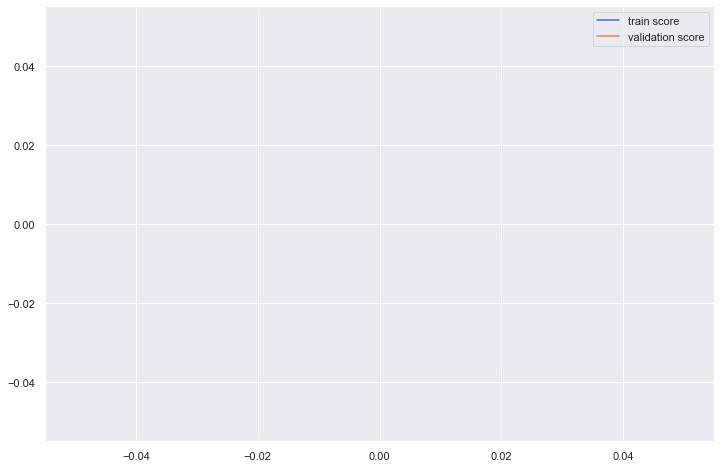

In [104]:
evaluation(grid.best_estimator_)

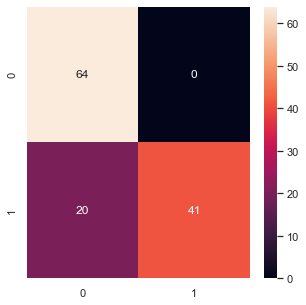

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        64
           1       1.00      0.67      0.80        61

    accuracy                           0.84       125
   macro avg       0.88      0.84      0.83       125
weighted avg       0.88      0.84      0.84       125



In [94]:
y_pred = grid.predict(X_test)

plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()


print(classification_report(y_test, y_pred))

In [116]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score, precision_score

y_pred_proba = grid.best_estimator_.predict_proba(X_test)
print()


# f1_score(y_test, y_pred)
metrics = dict()
metrics["auc"] = roc_auc_score(y_test, y_pred_proba[:,1]) 
metrics["recall"] = recall_score(y_test, y_pred, average="binary", pos_label="1")
metrics["precision"] = precision_score(y_test, y_pred, average="binary", pos_label="1")
metrics["f1_score"] = f1_score(y_test, y_pred, average="binary", pos_label="1")

metrics
# precision, recall, threshold = precision_recall_curve(y_pred_proba, grid.best_estimator_.decision_function(X_test))

{'auc': 0.9574795081967213,
 'recall': 0.6721311475409836,
 'precision': 1.0,
 'f1_score': 0.8039215686274509}

# Requirements

In [97]:
import joblib
# joblib.dump(grid.best_estimator_, 'my_model.pkl')

import types
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__
list(imports())


# !pip3 freeze > requirements.txt


['builtins',
 'builtins',
 'configparser',
 'pandas',
 'numpy',
 'requests',
 'json',
 'matplotlib.pyplot',
 'seaborn',
 'joblib',
 'types']

# Docker

In [ ]:
FROM python:3
ADD my_script.py /
RUN pip install requirements.txt
CMD [ "python", "./my_script.py" ]

In [ ]:
docker build -t python-model_api_pe .

In [ ]:
docker run python-model_api_pe